In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from utils import PkdbModel
from analysis import PlotCategory, create_plots




In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# filter out outliers probably from same clinical study 

In [16]:
def all_idx(data):
    return pd.Series(True, index=data.index)

def healthy_idx(data):
    return data[('healthy', 'choice')] == 'Y'
          
def rest_idx(data):
    return (~healthy_idx(data))

In [17]:
colors = sns.color_palette("colorblind",n_colors=5)

categories_all = [           
            PlotCategory(name="Healthy", color=colors[0], marker='o', data_idx=healthy_idx),
            PlotCategory(name="Unhealthy", color="darkgray", marker='o', data_idx=rest_idx),

             ]

* paracetamol glucuronide_clearance *
15.5
29.9
31.395
Healthy    I: 18  G: 29 TI: 272
Unhealthy  I: 11  G: 7  TI: 78 
15.5
16.3664
17.18472
Healthy    I: 18  G: 14 TI: 167
Unhealthy  I: 10  G: 7  TI: 77 
0.275
0.212
0.28875000000000006
Healthy    I: 34  G: 15 TI: 192
Unhealthy  I: 10  G: 8  TI: 87 
0.21600000000000005
0.217
0.22785
Healthy    I: 18  G: 15 TI: 173
Unhealthy  I: 10  G: 9  TI: 101
* paracetamol glucuronide_thalf *
12.0
30.5
32.025
Healthy    I: 0   G: 31 TI: 274
Unhealthy  I: 1   G: 9  TI: 87 
nan
30.5
32.025
Healthy    I: 0   G: 19 TI: 194
Unhealthy  I: 0   G: 11 TI: 110
nan
0.41216216216216217
0.4327702702702703
Healthy    I: 0   G: 18 TI: 188
Unhealthy  I: 0   G: 9  TI: 86 
nan
0.41216216216216217
0.4327702702702703
Healthy    I: 0   G: 18 TI: 188
Unhealthy  I: 0   G: 9  TI: 86 
* paracetamol glucuronide_tmax *
5.0
24.0
25.200000000000003
Healthy    I: 0   G: 30 TI: 259
Unhealthy  I: 1   G: 9  TI: 81 
nan
24.0
25.200000000000003
Healthy    I: 0   G: 17 TI: 174
Unhealt

/home/janekg/Dev/pkdb_analysis/analysis.py:72: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 30))


nan
8.26470588235294e-05
8.677941176470587e-05
Healthy    I: 0   G: 3  TI: 39 
Unhealthy  I: 0   G: 0  TI: 0  
* paracetamol mercapturate_clearance *
2.35
655.1800000000002
687.9390000000002
Healthy    I: 9   G: 5  TI: 65 
Unhealthy  I: 0   G: 0  TI: 0  
2.35
655.1800000000002
687.9390000000002
Healthy    I: 9   G: 2  TI: 39 
Unhealthy  I: 0   G: 0  TI: 0  
0.027011494252873563
7.99
8.3895
Healthy    I: 9   G: 2  TI: 39 
Unhealthy  I: 0   G: 0  TI: 0  
0.027011494252873563
7.99
8.3895
Healthy    I: 9   G: 2  TI: 39 
Unhealthy  I: 0   G: 0  TI: 0  
* paracetamol mercapturate_thalf *
nan
6.7
7.035
Healthy    I: 0   G: 3  TI: 37 
Unhealthy  I: 0   G: 0  TI: 0  
nan
6.7
7.035
Healthy    I: 0   G: 2  TI: 30 
Unhealthy  I: 0   G: 0  TI: 0  
nan
0.08170731707317072
0.08579268292682926
Healthy    I: 0   G: 2  TI: 30 
Unhealthy  I: 0   G: 0  TI: 0  
nan
0.08170731707317072
0.08579268292682926
Healthy    I: 0   G: 2  TI: 30 
Unhealthy  I: 0   G: 0  TI: 0  
* paracetamol mercapturate_tmax *
nan
4

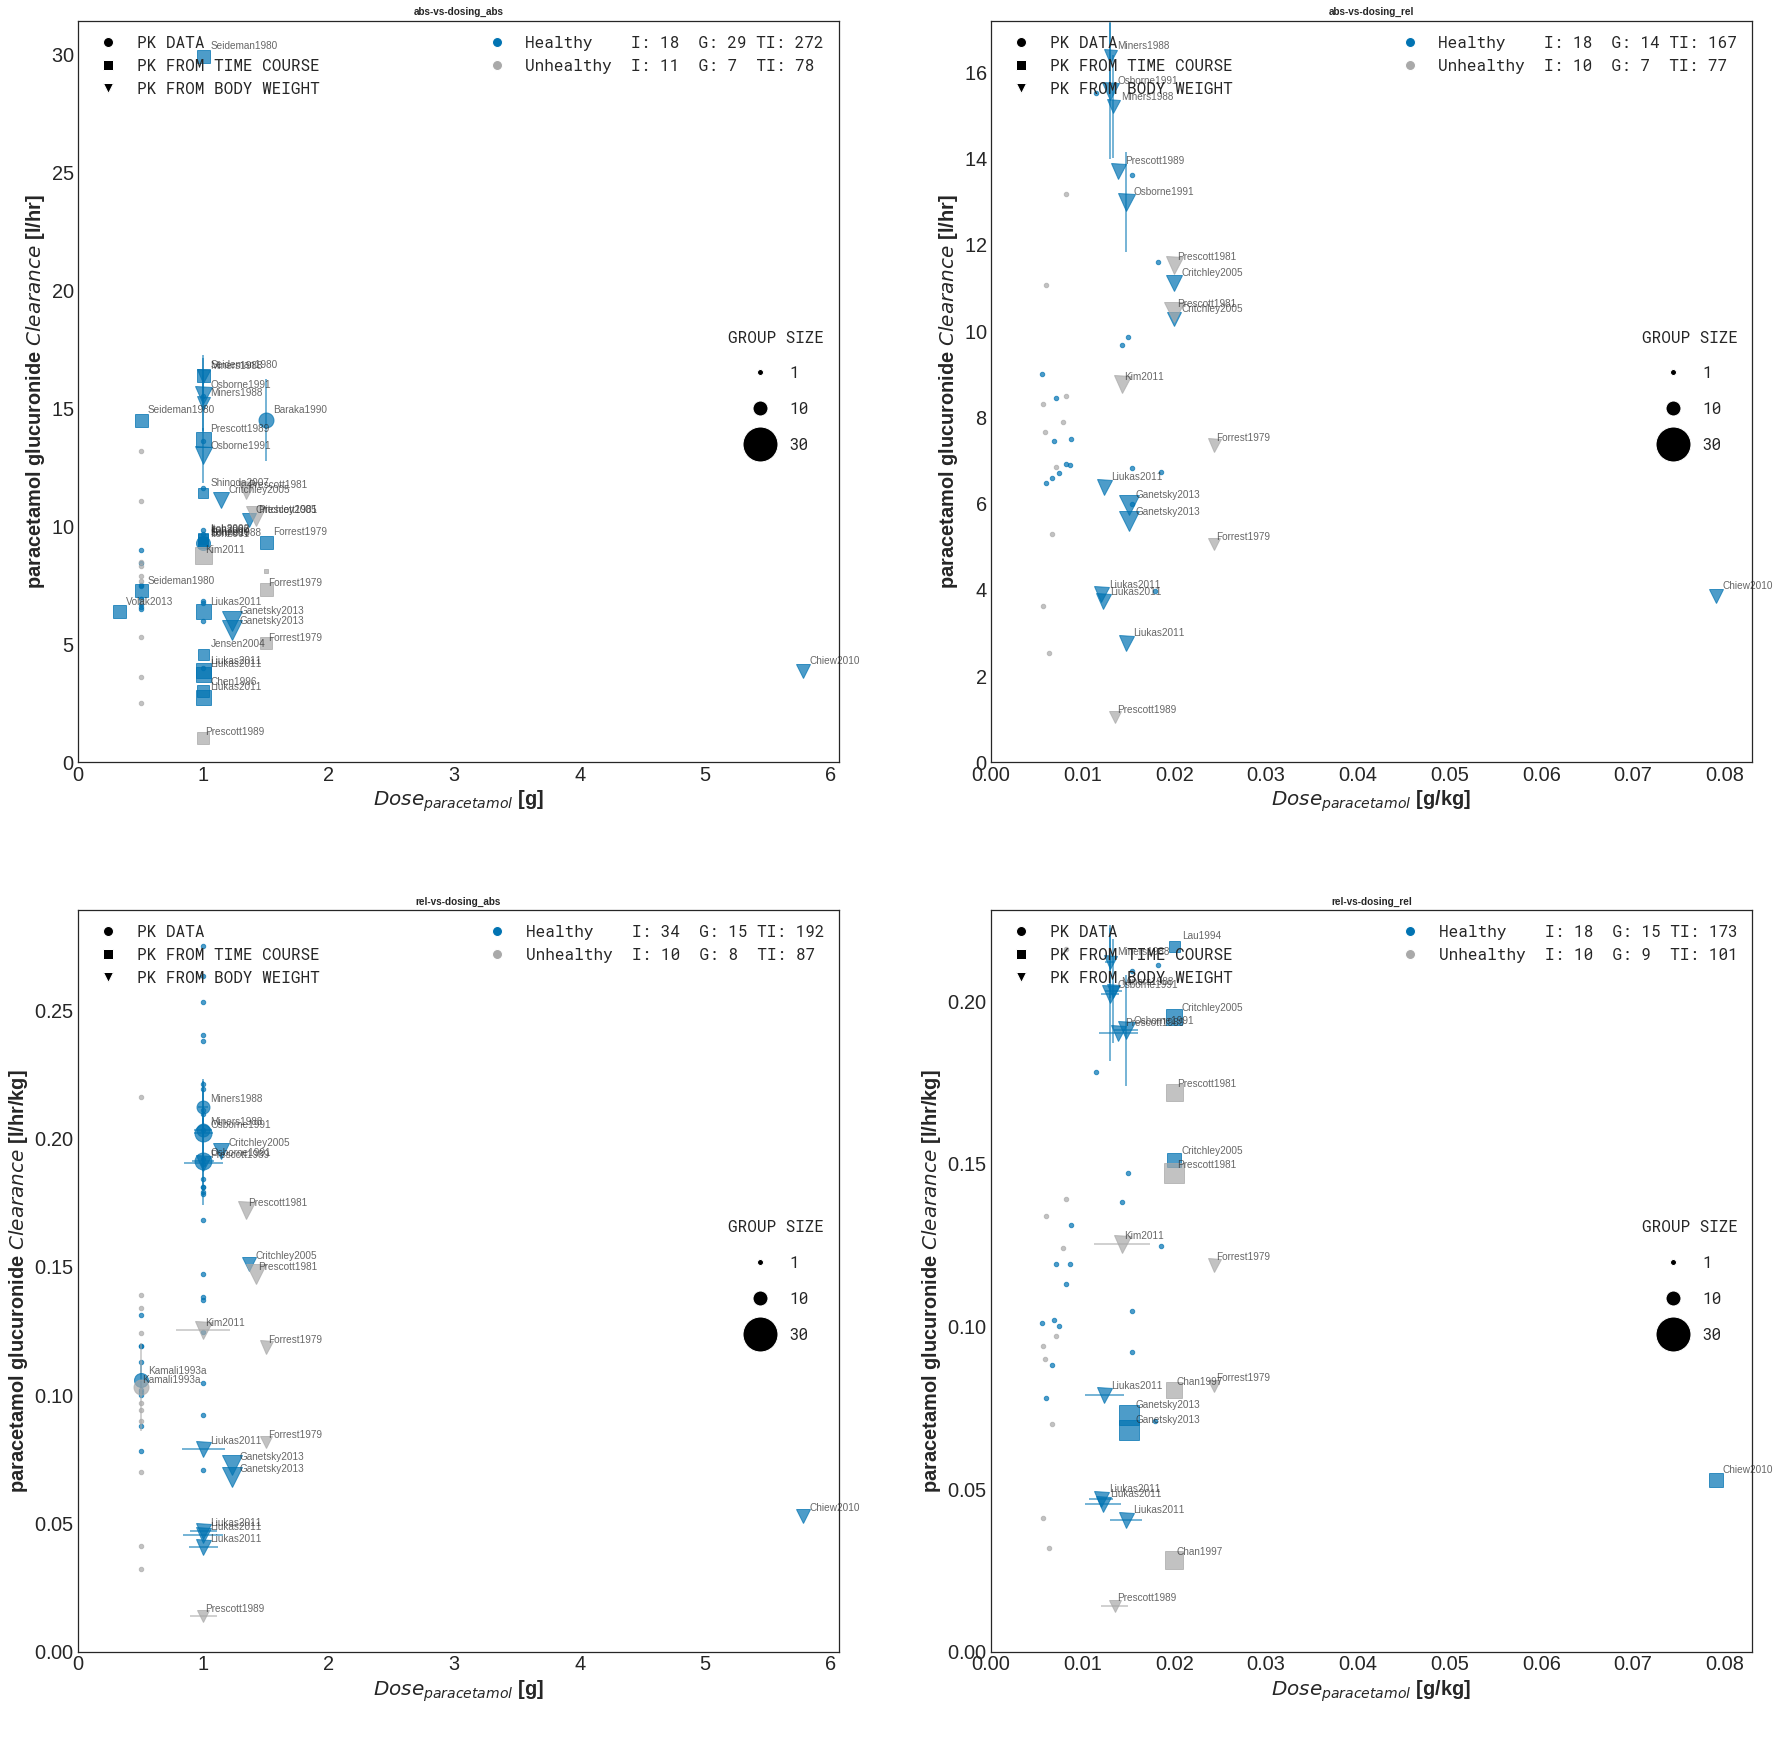

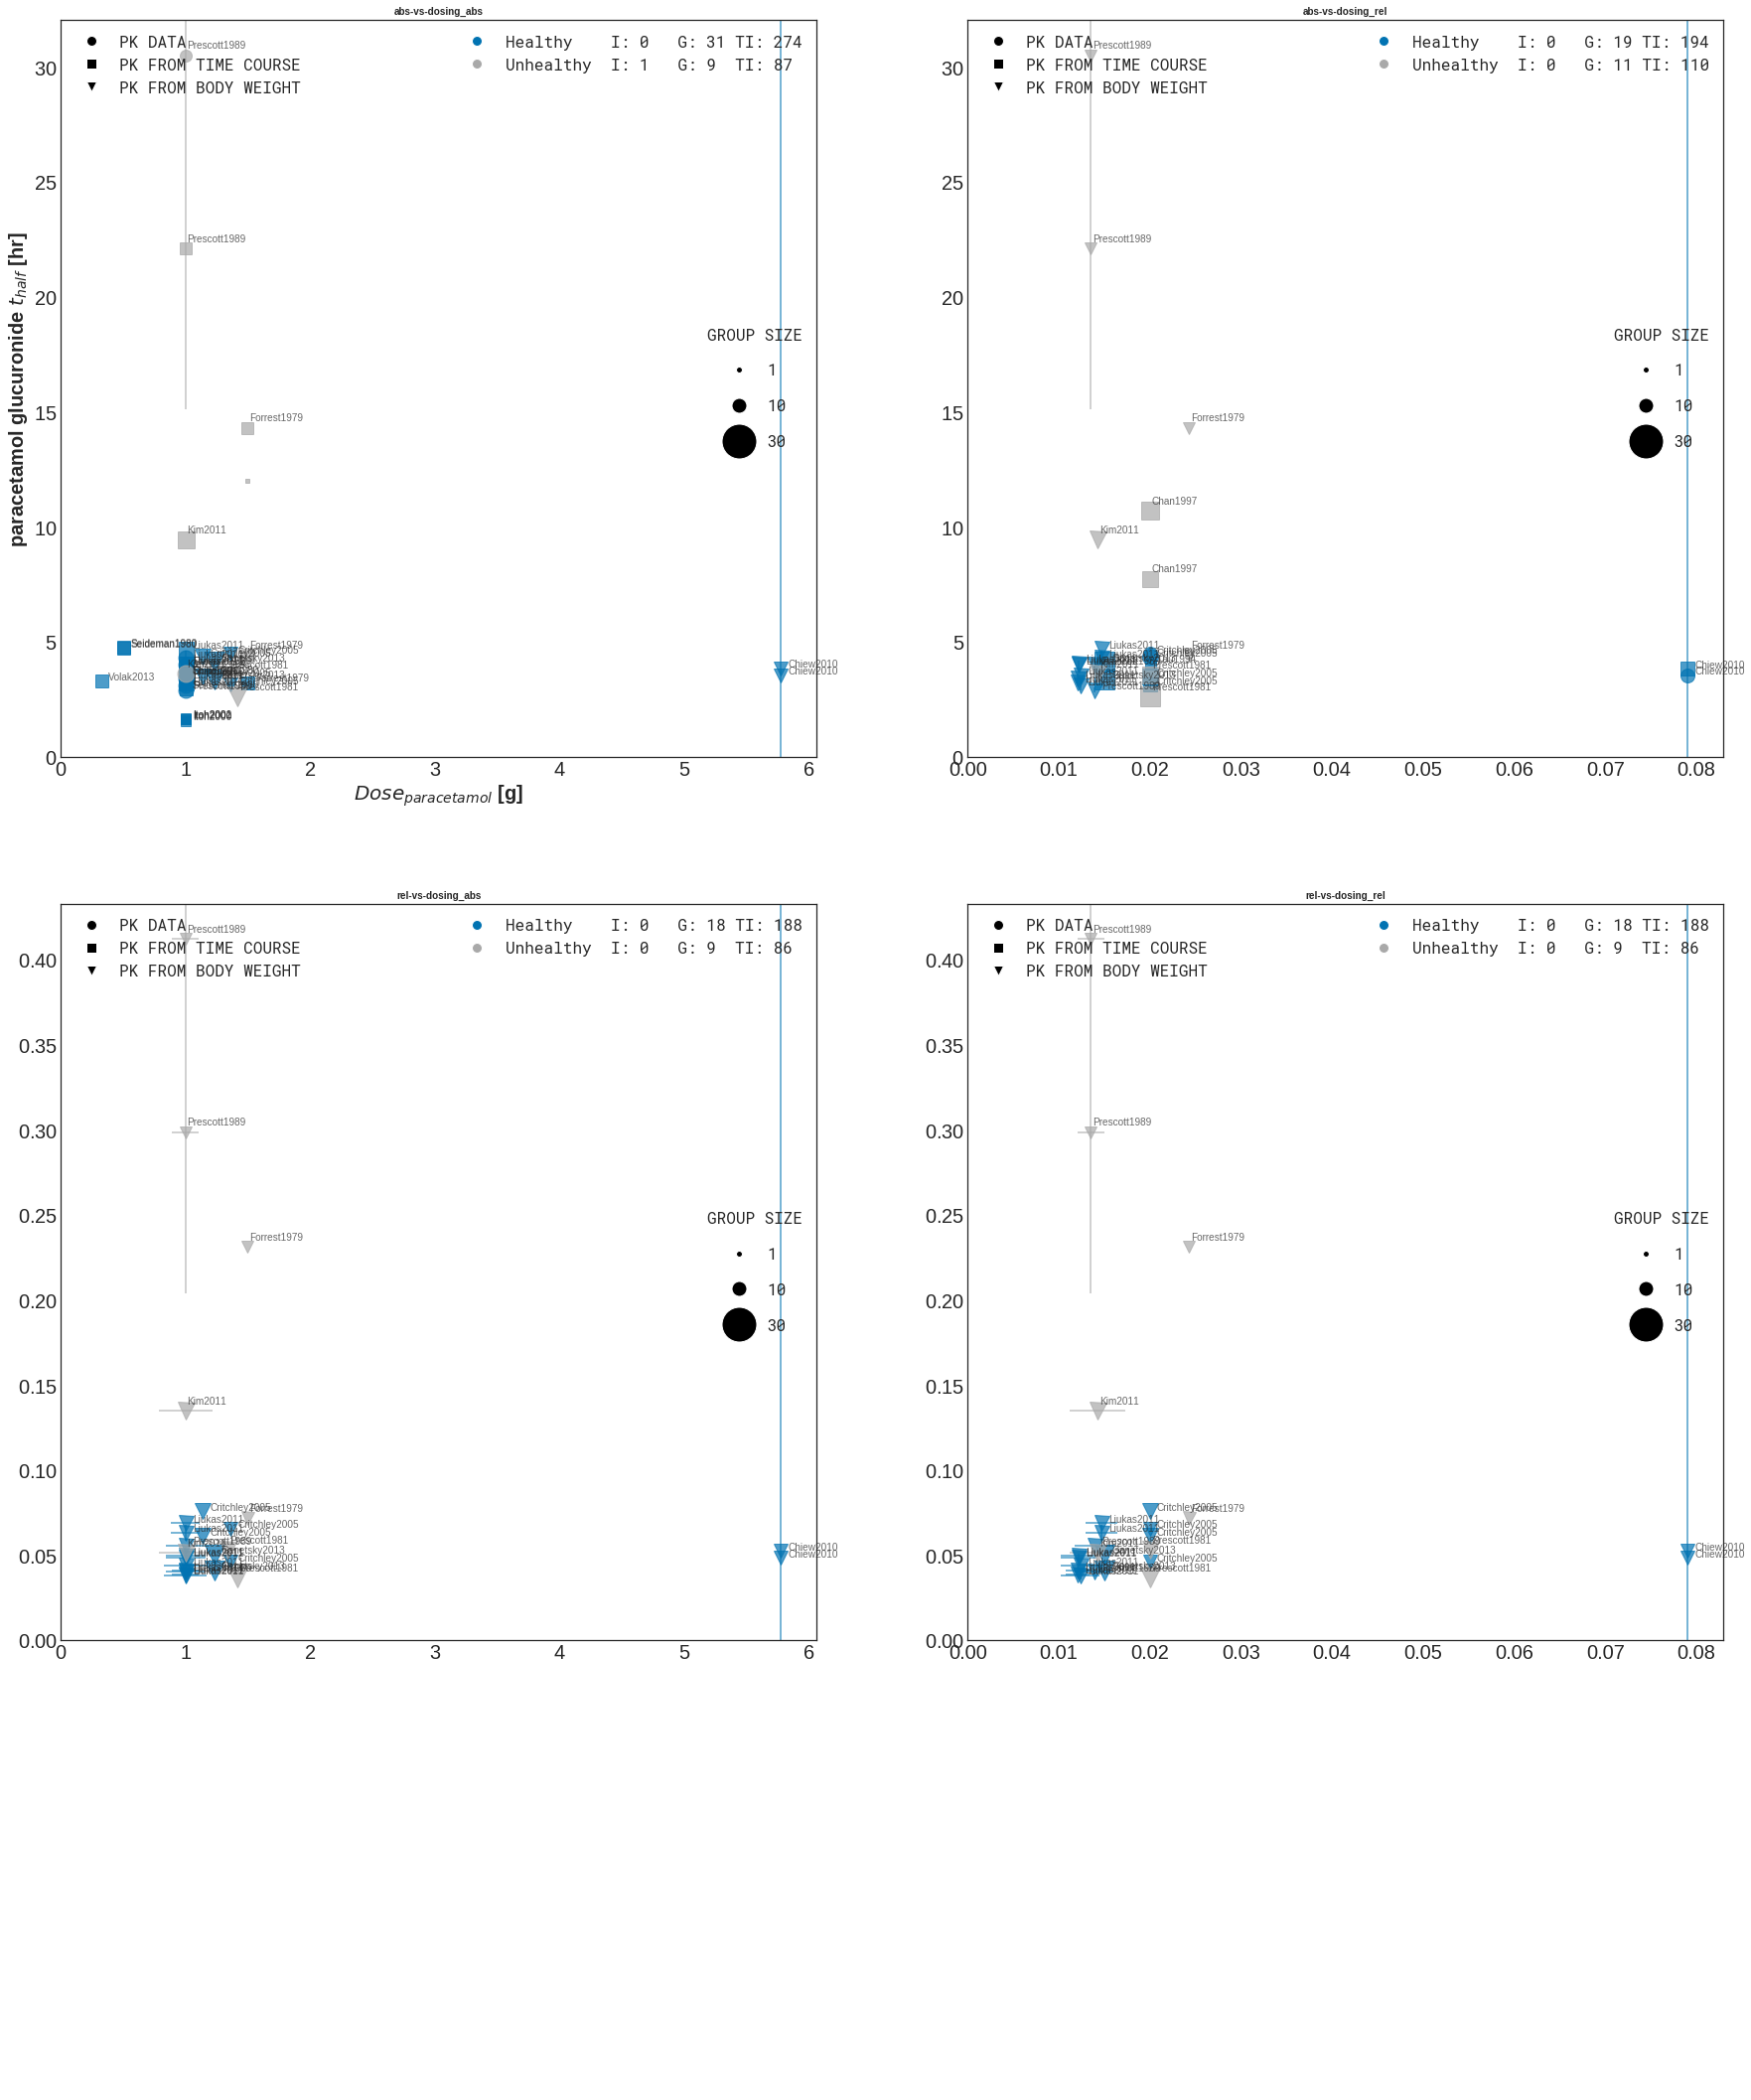

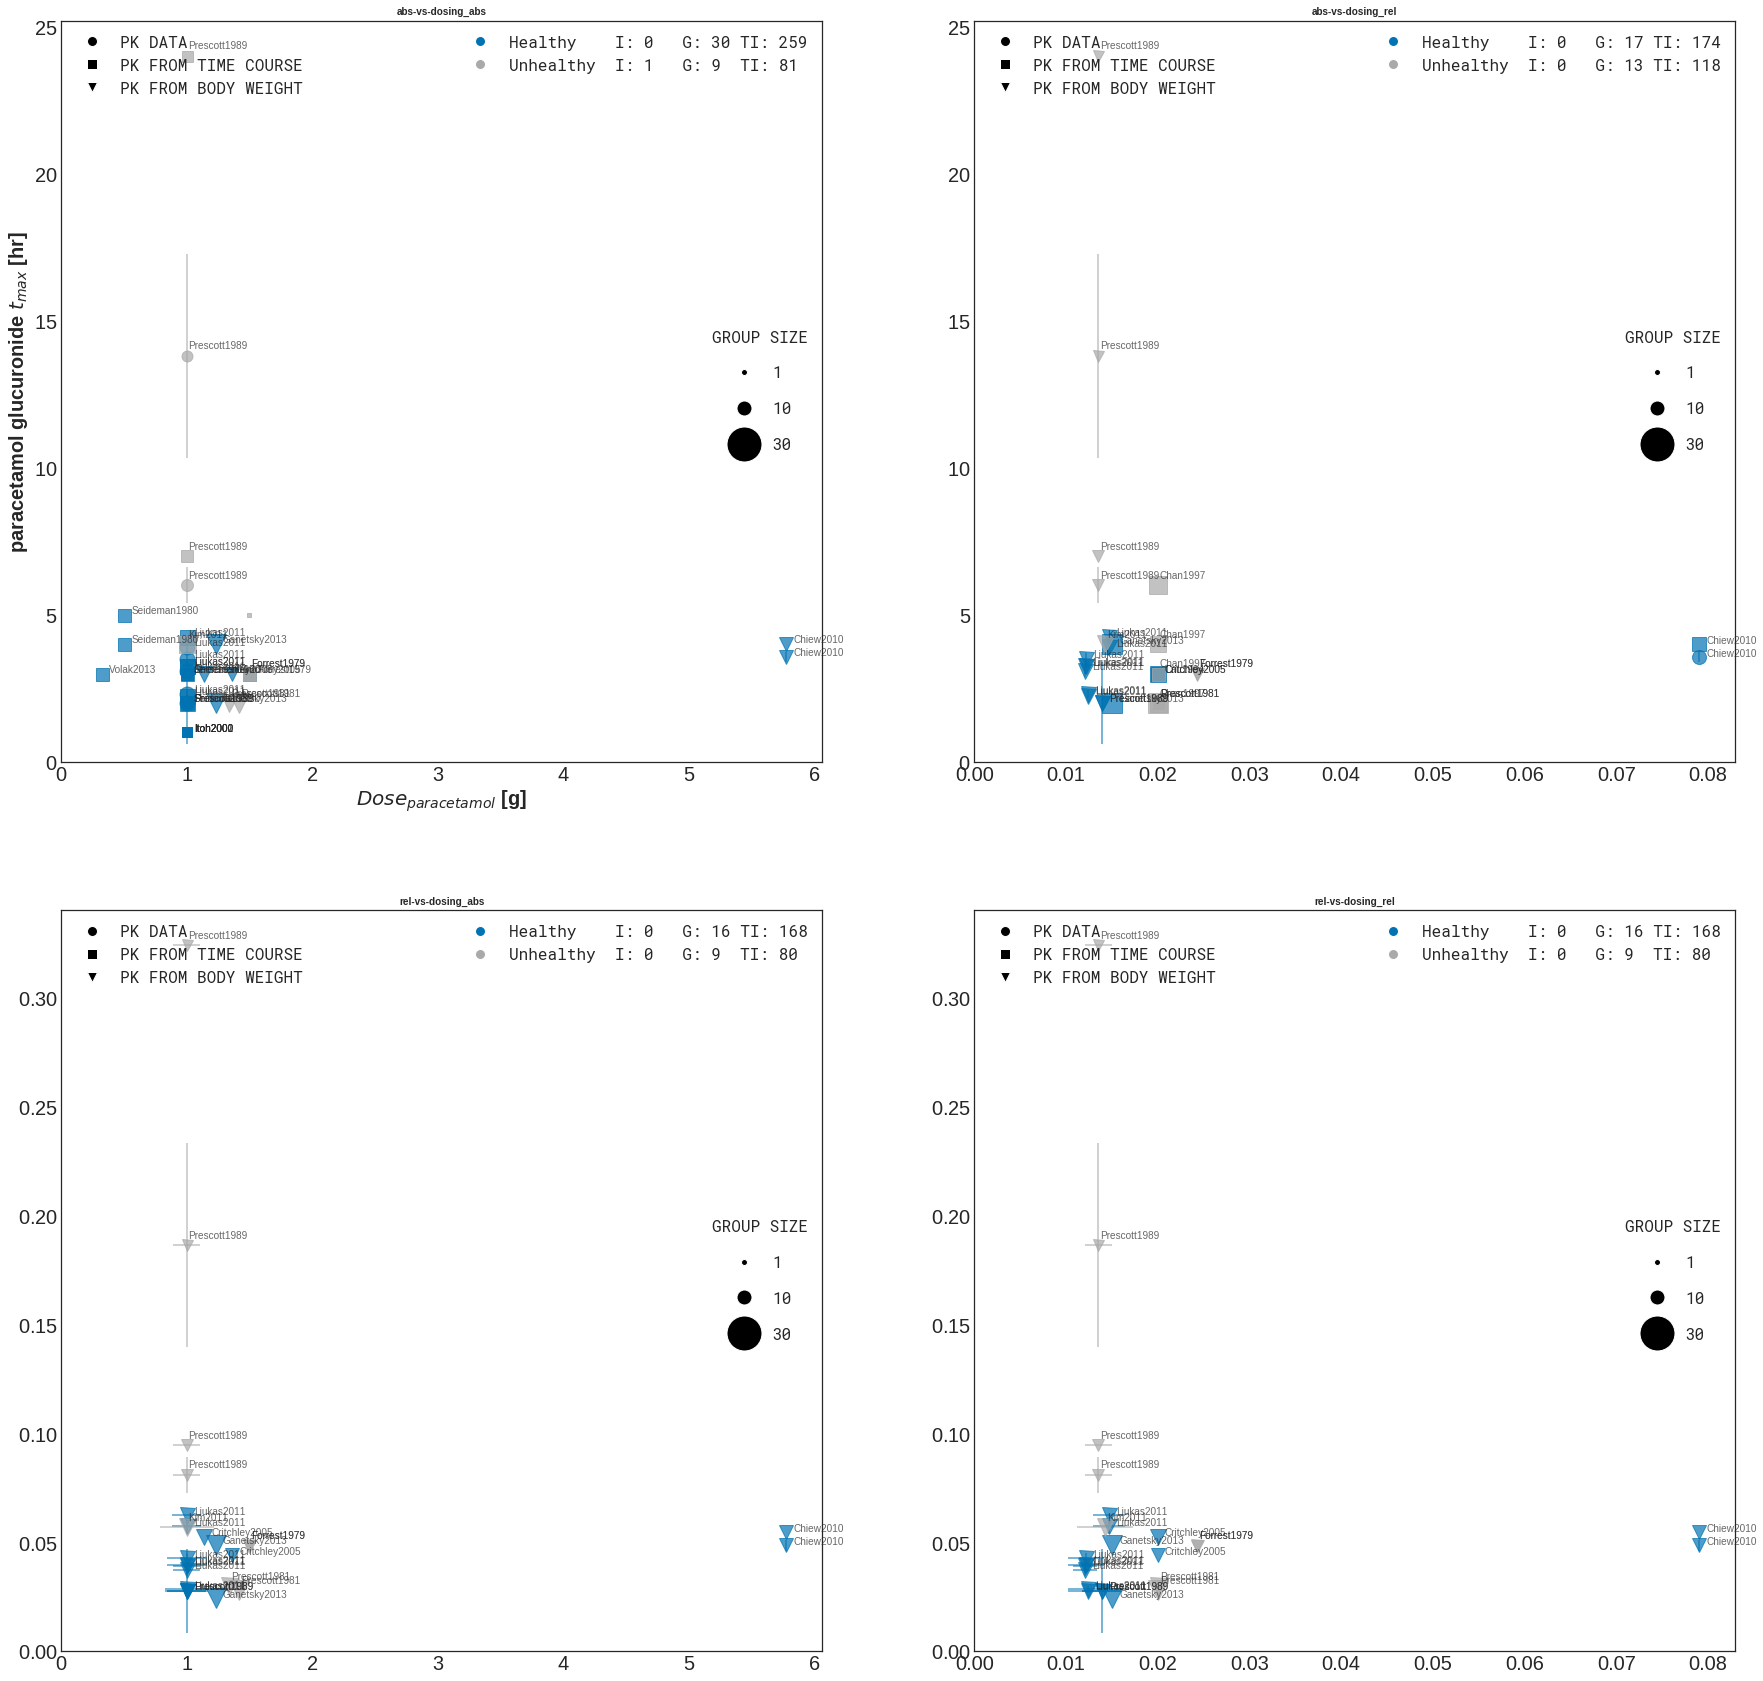

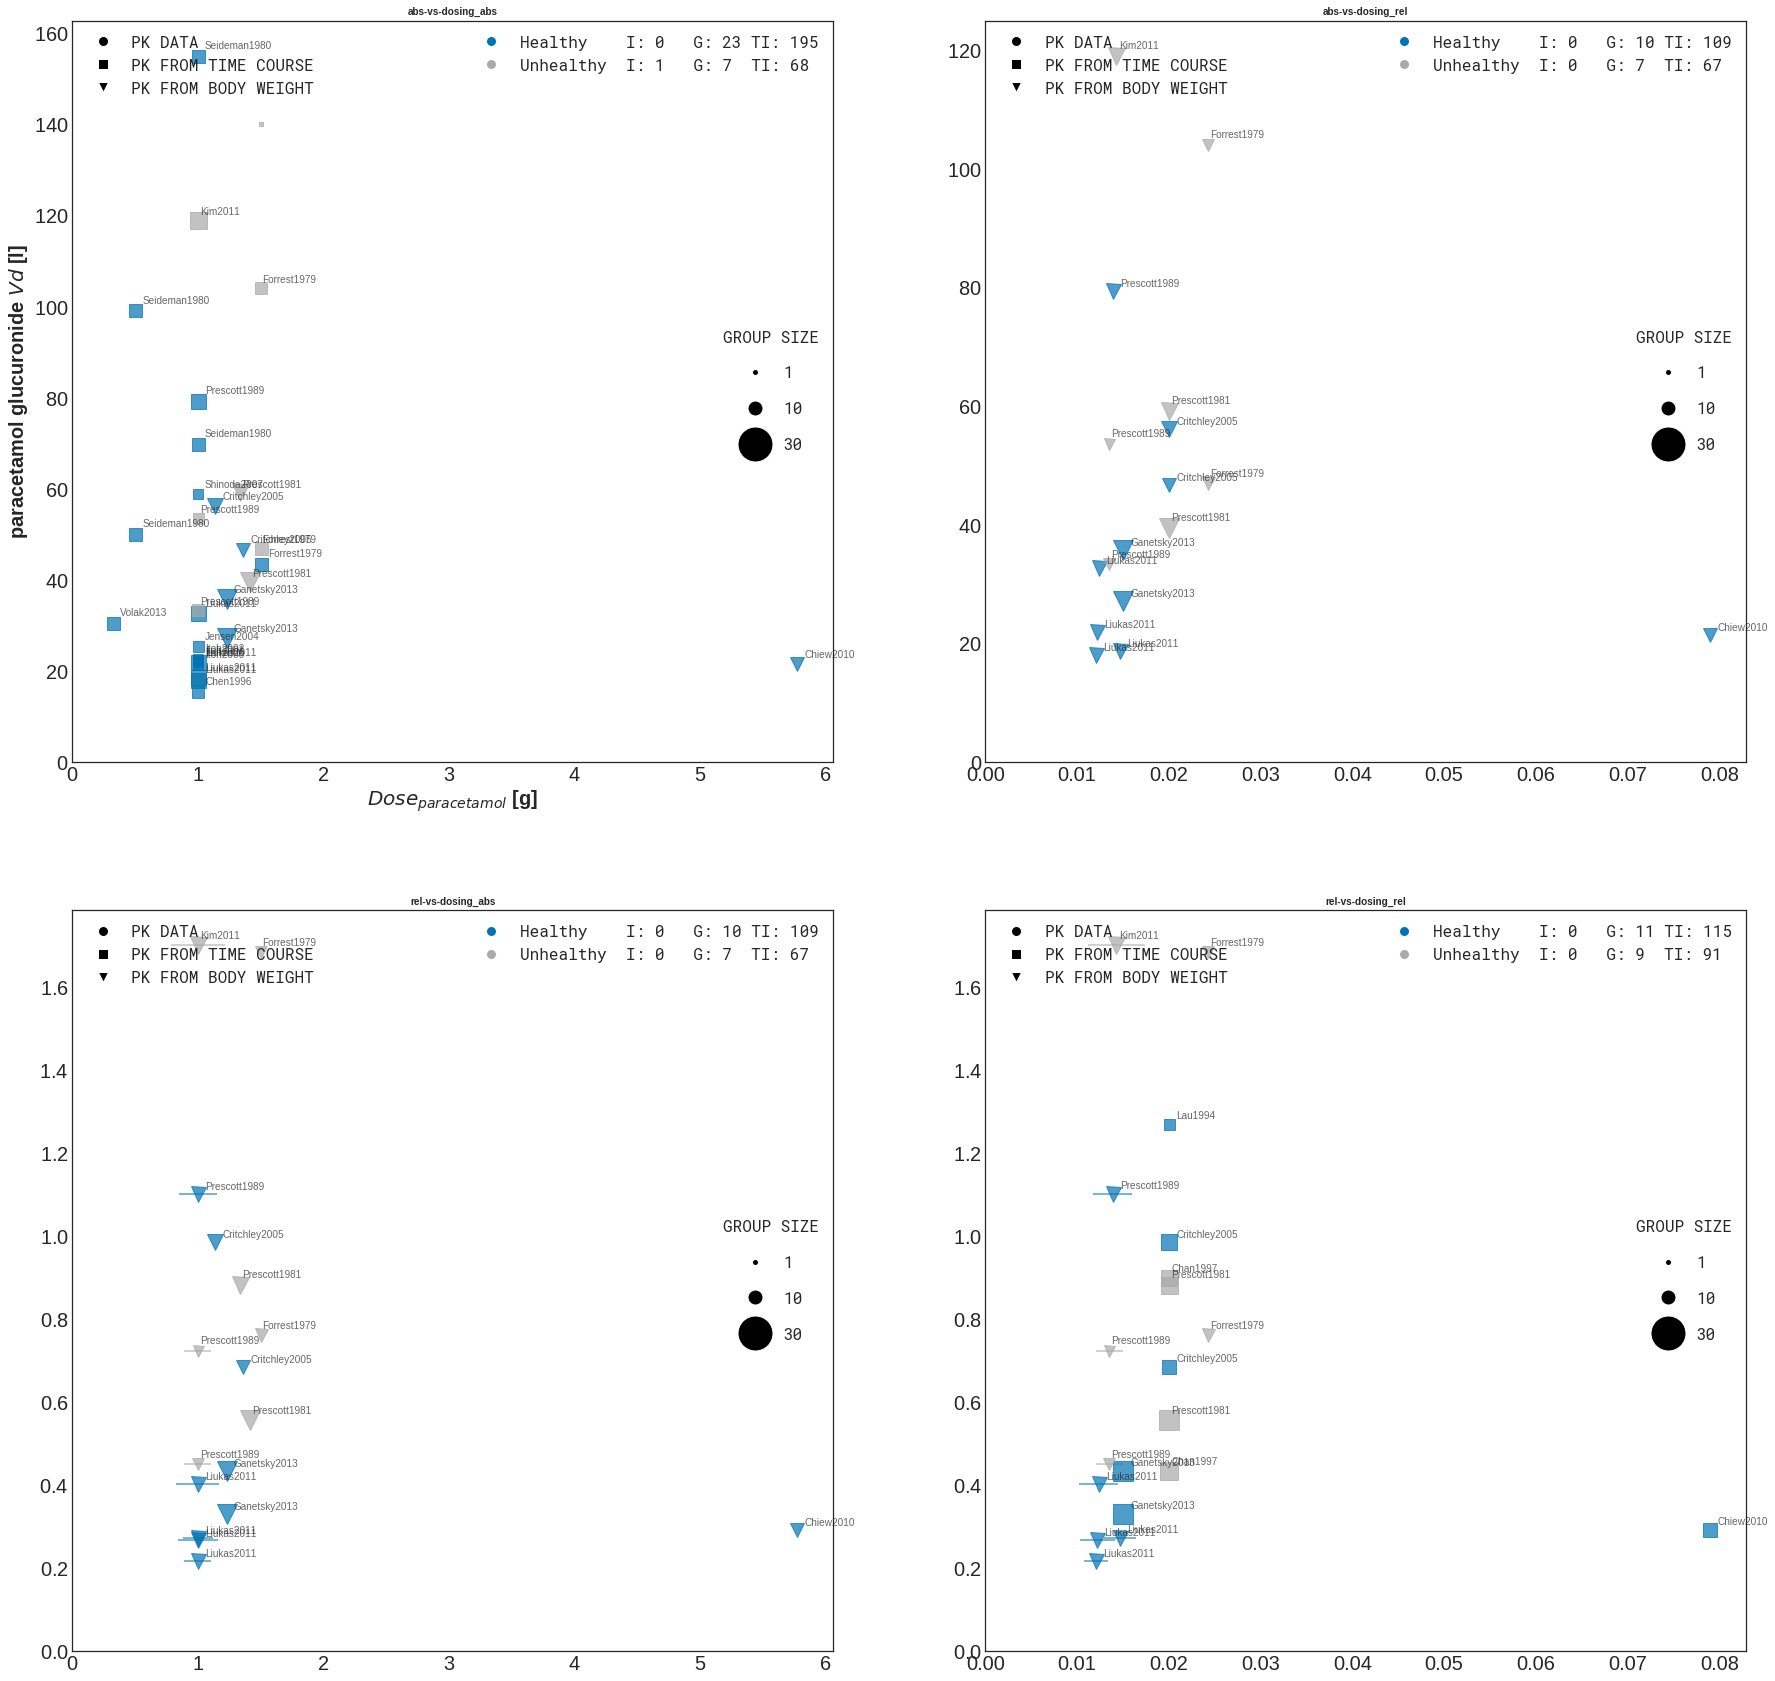

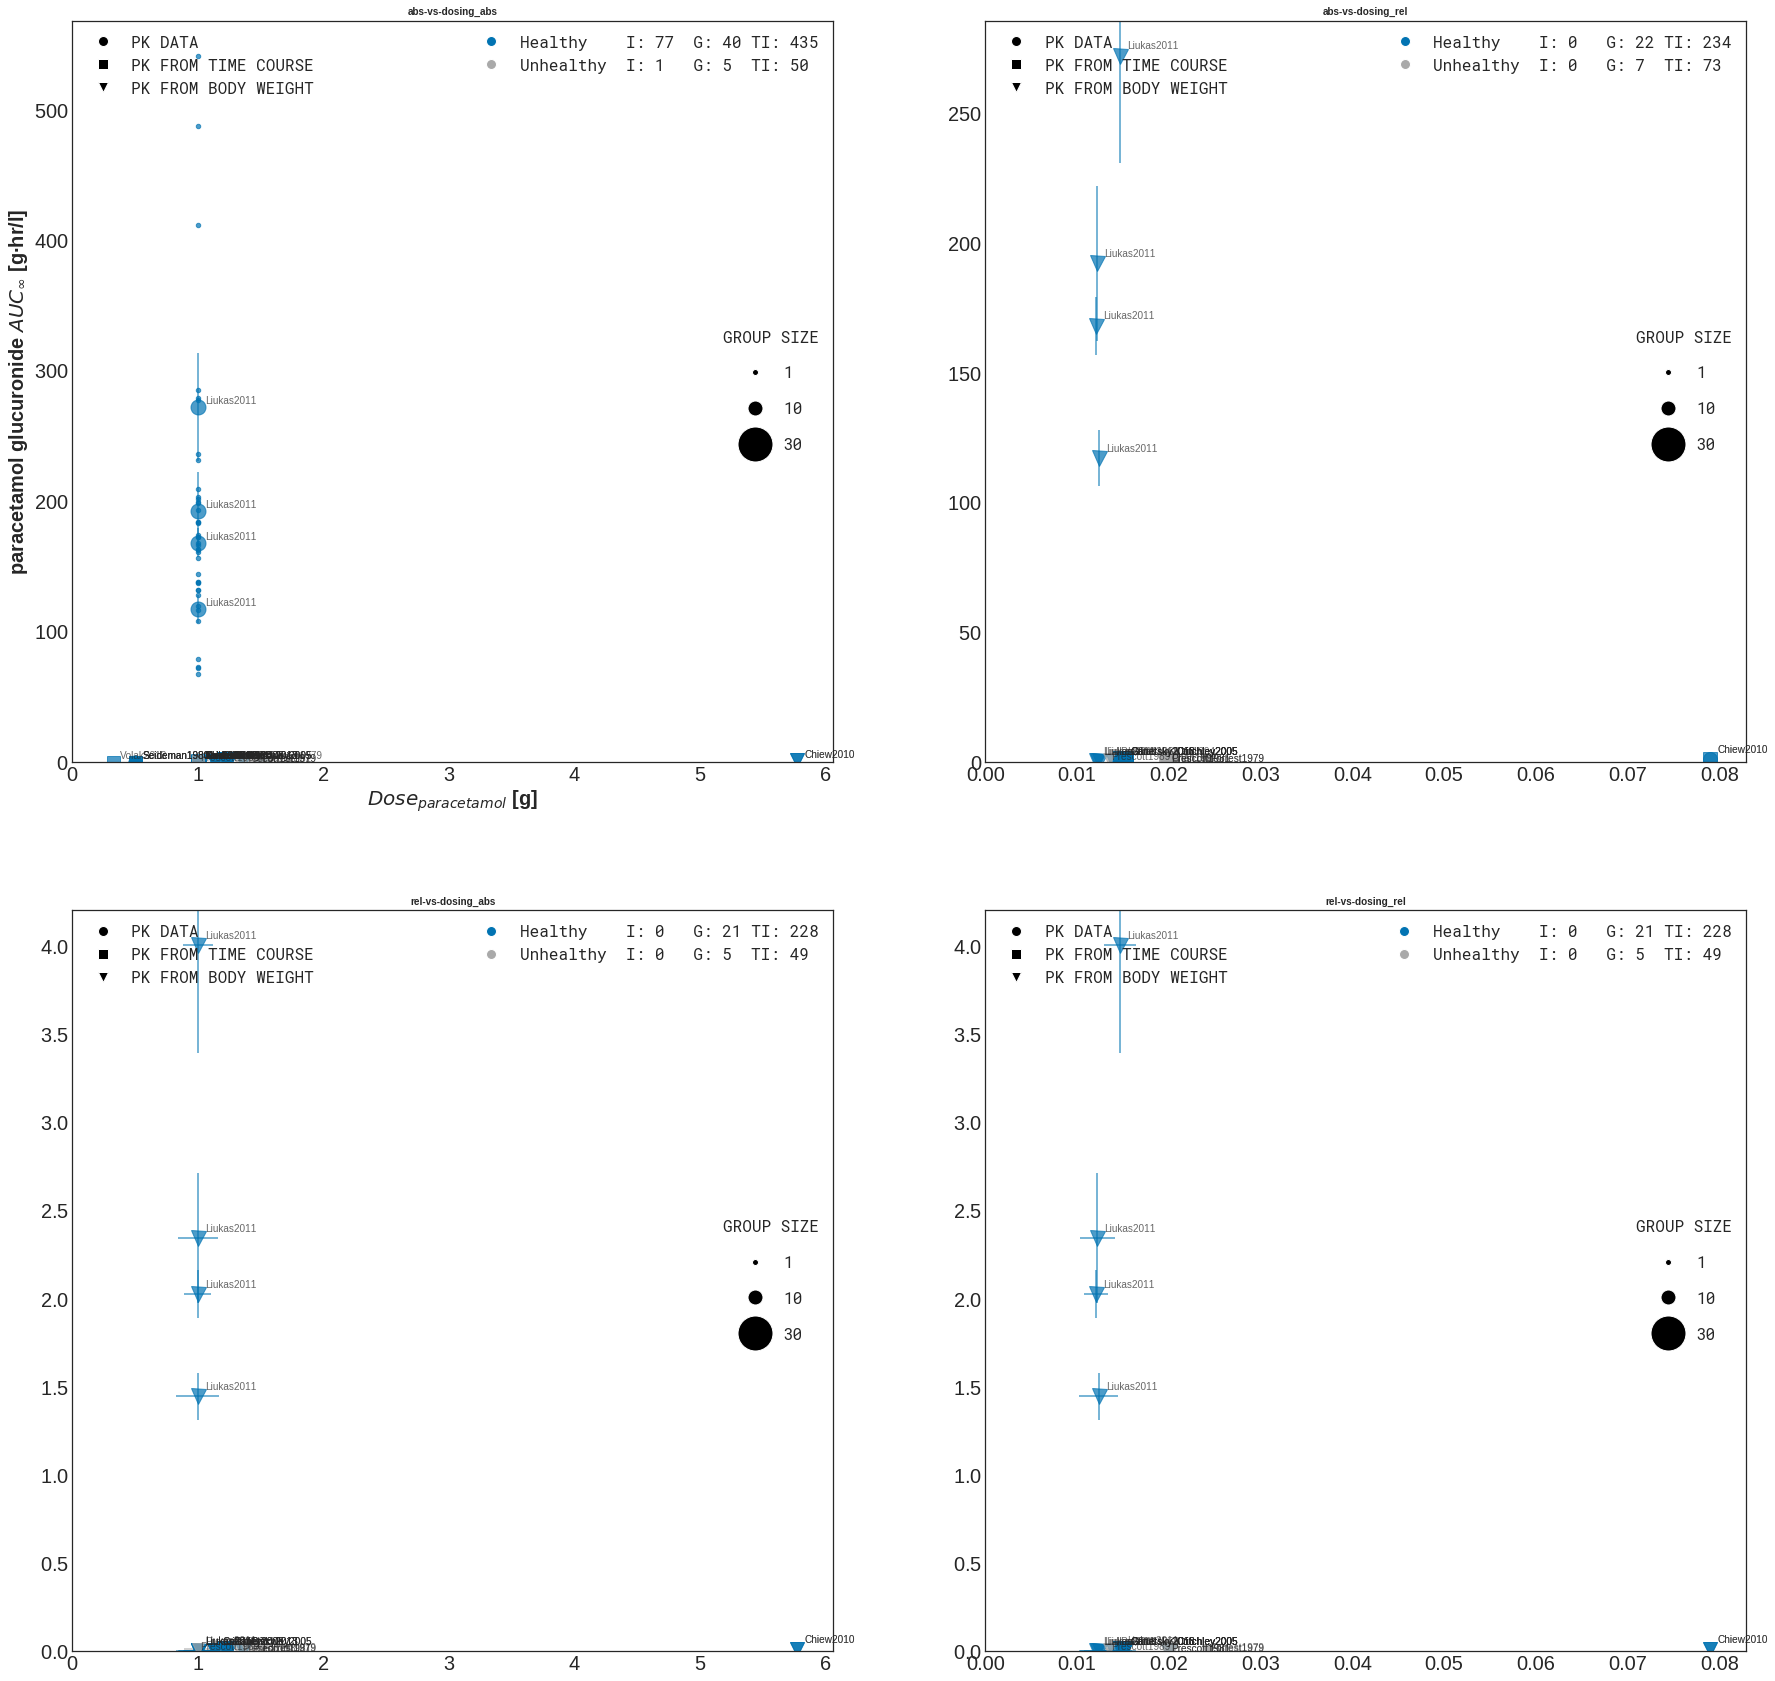

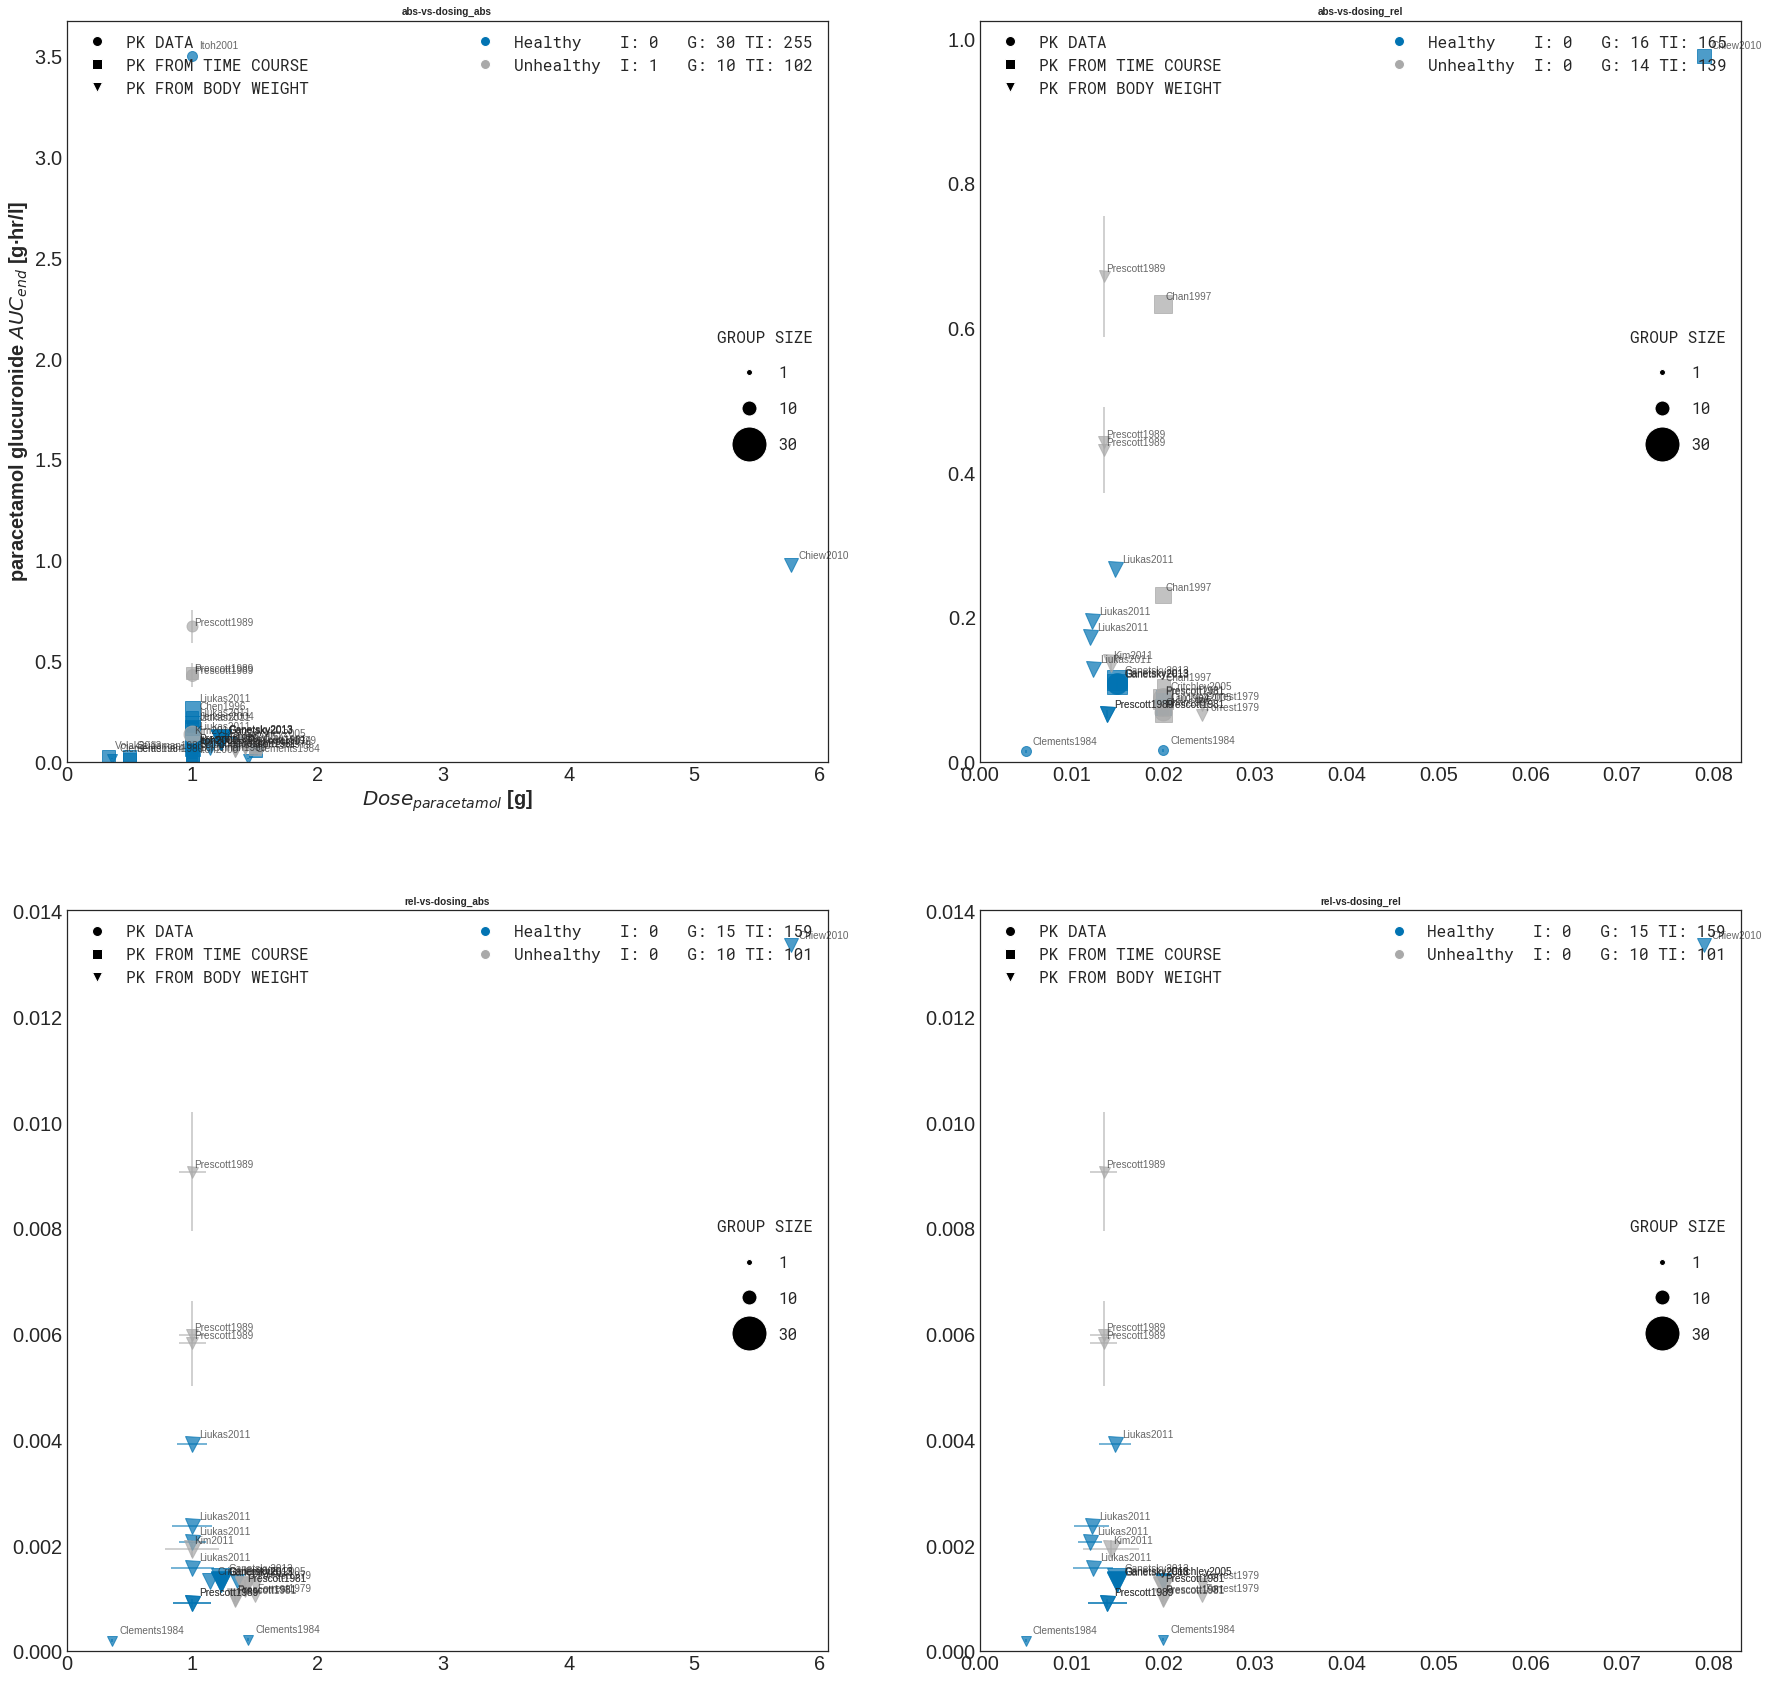

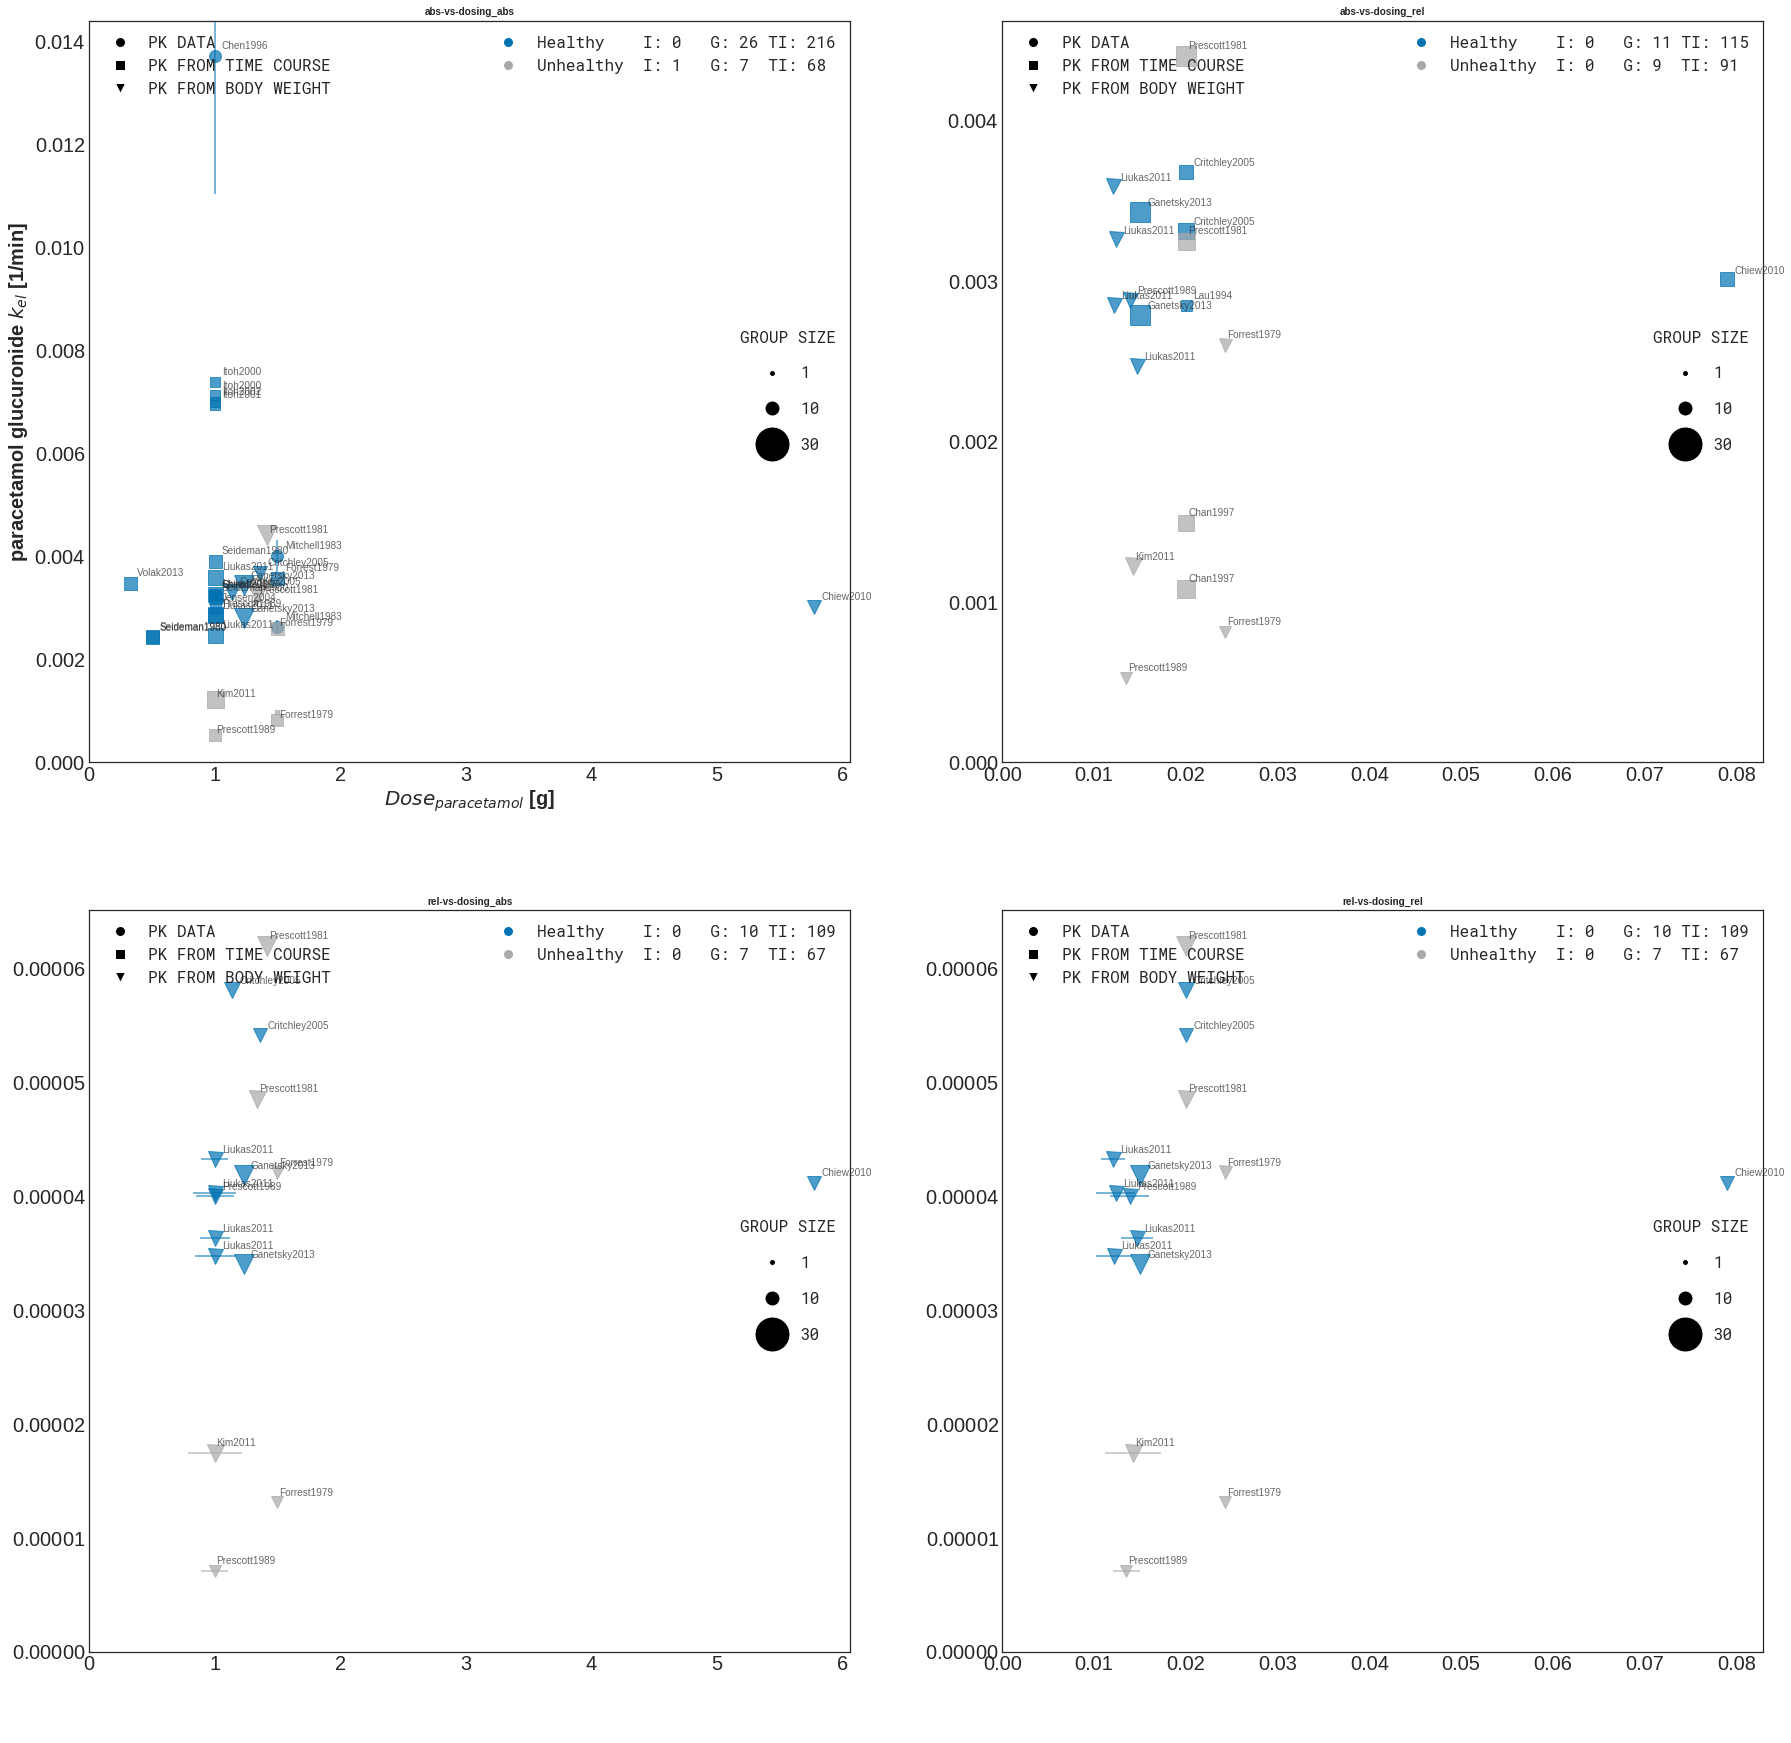

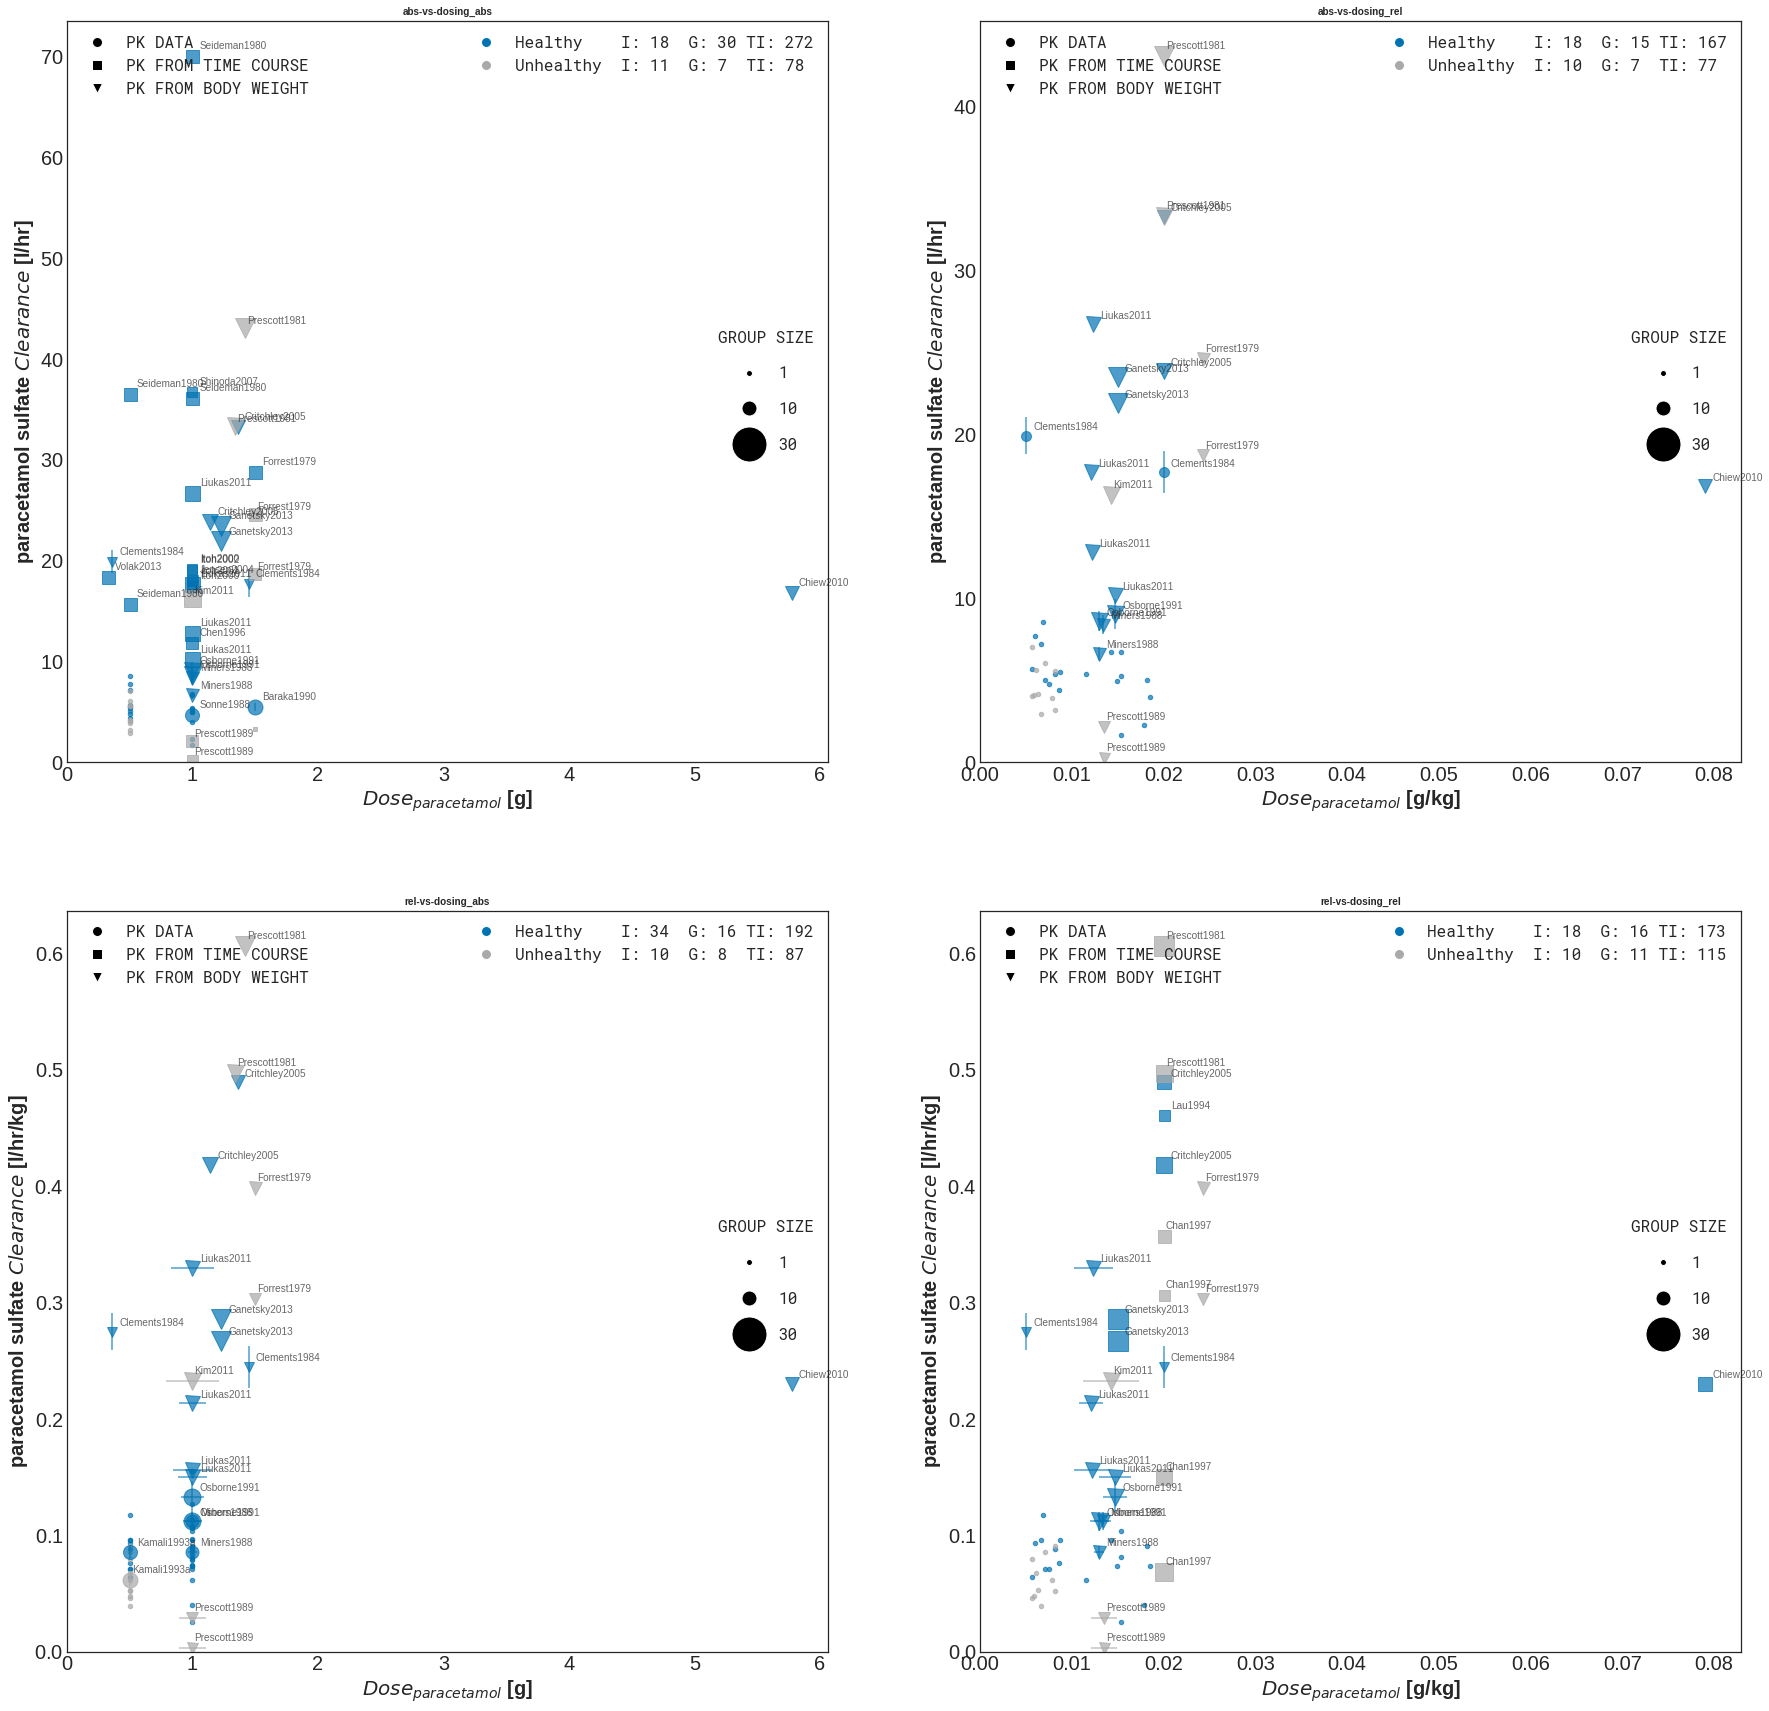

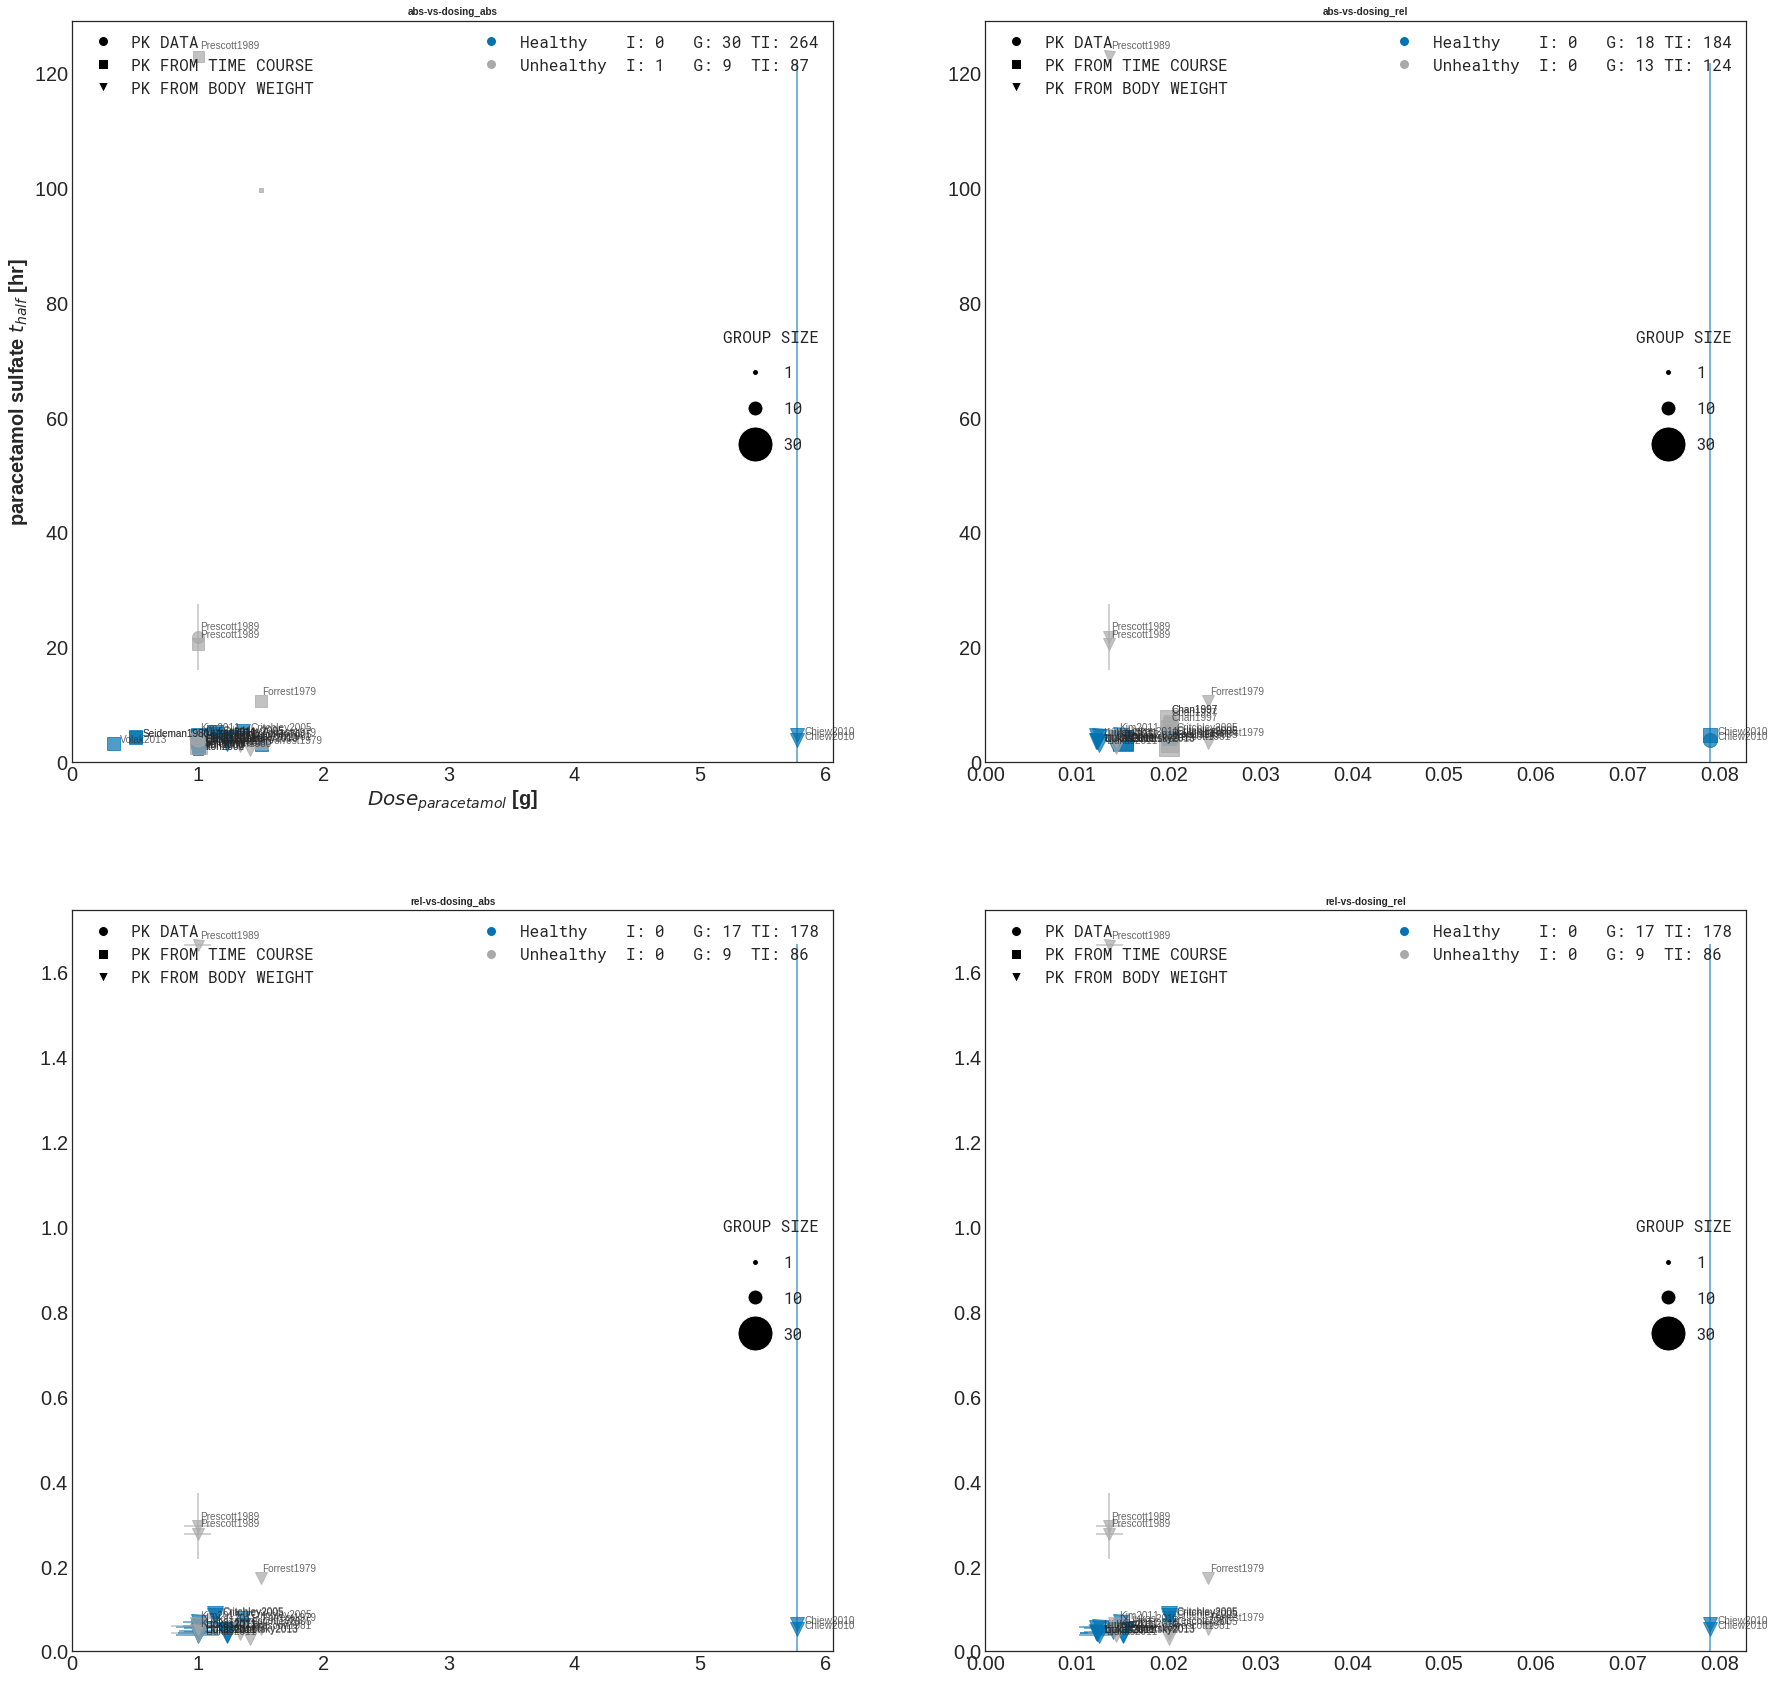

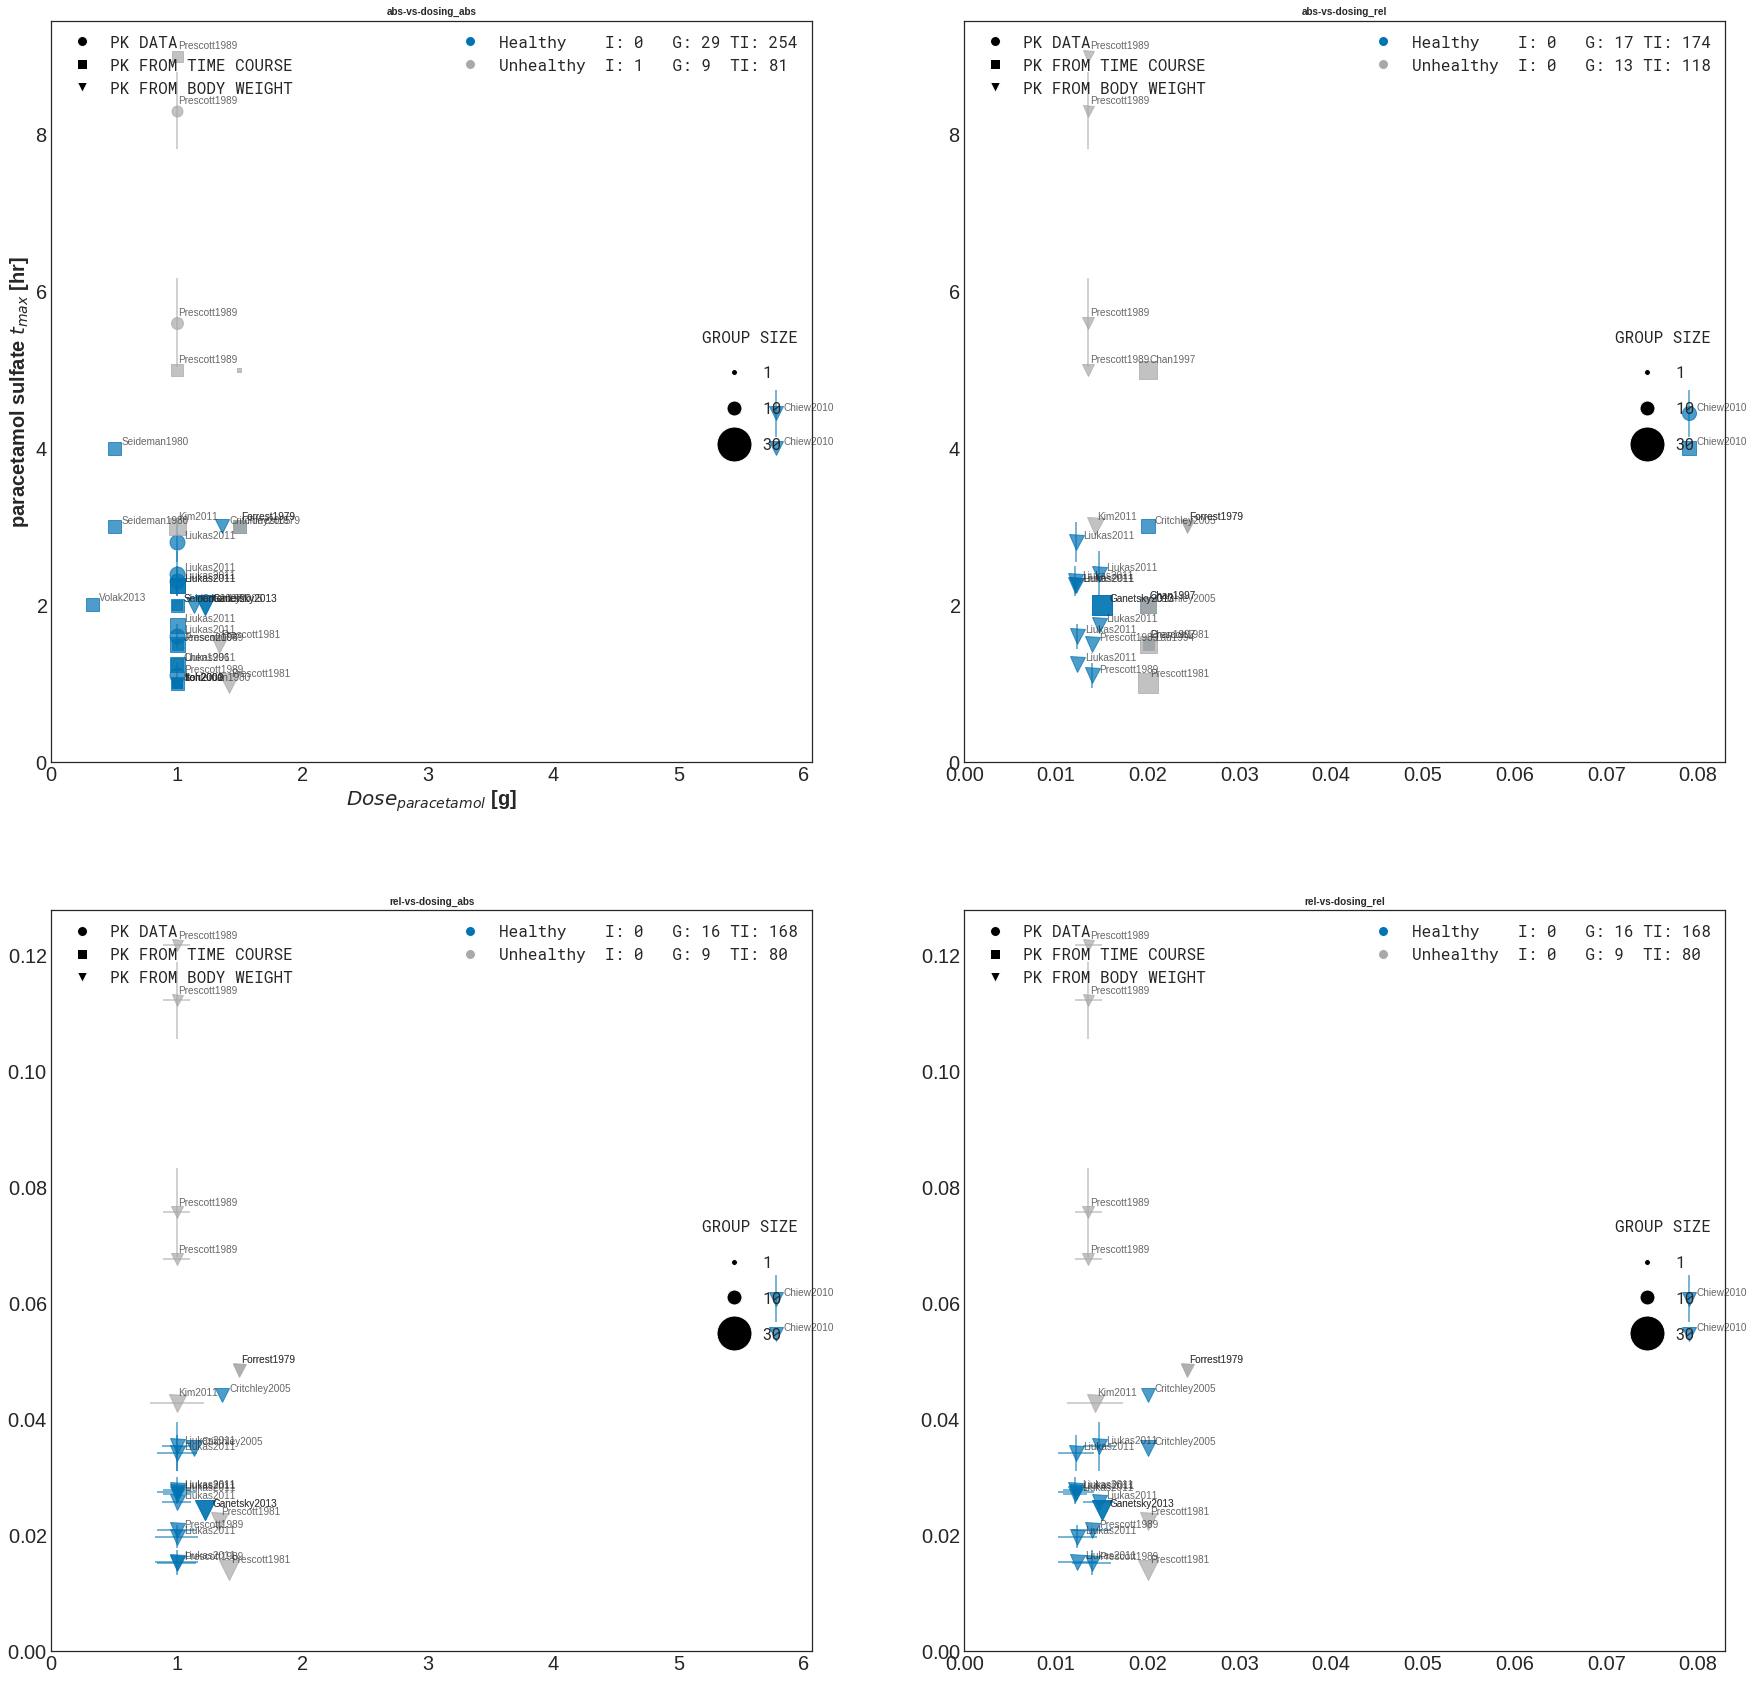

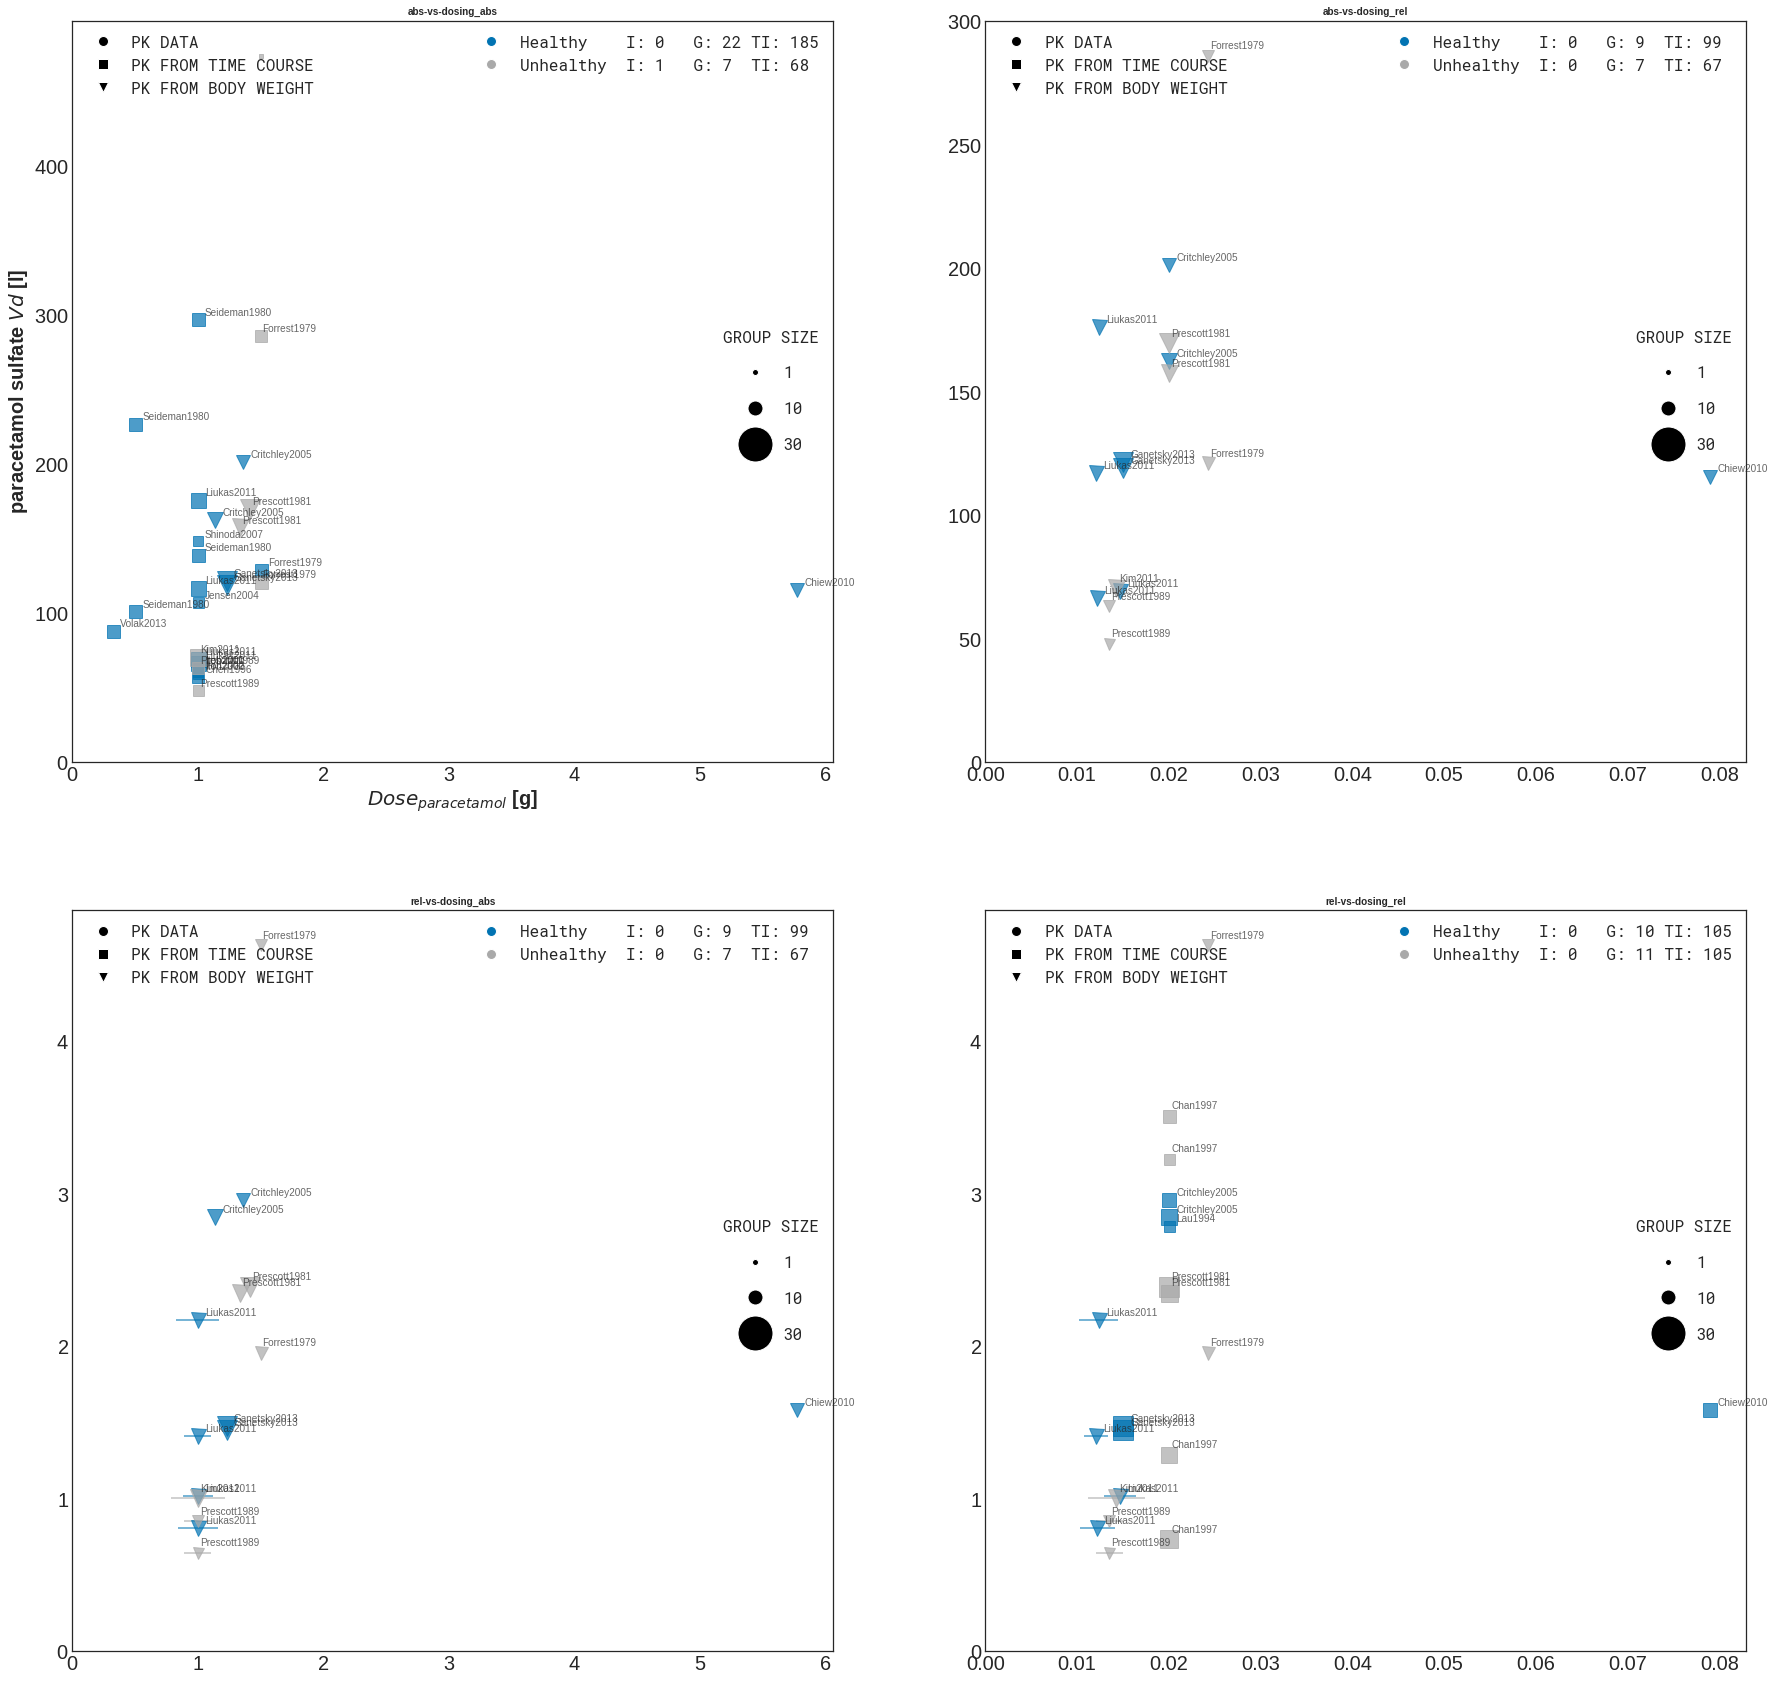

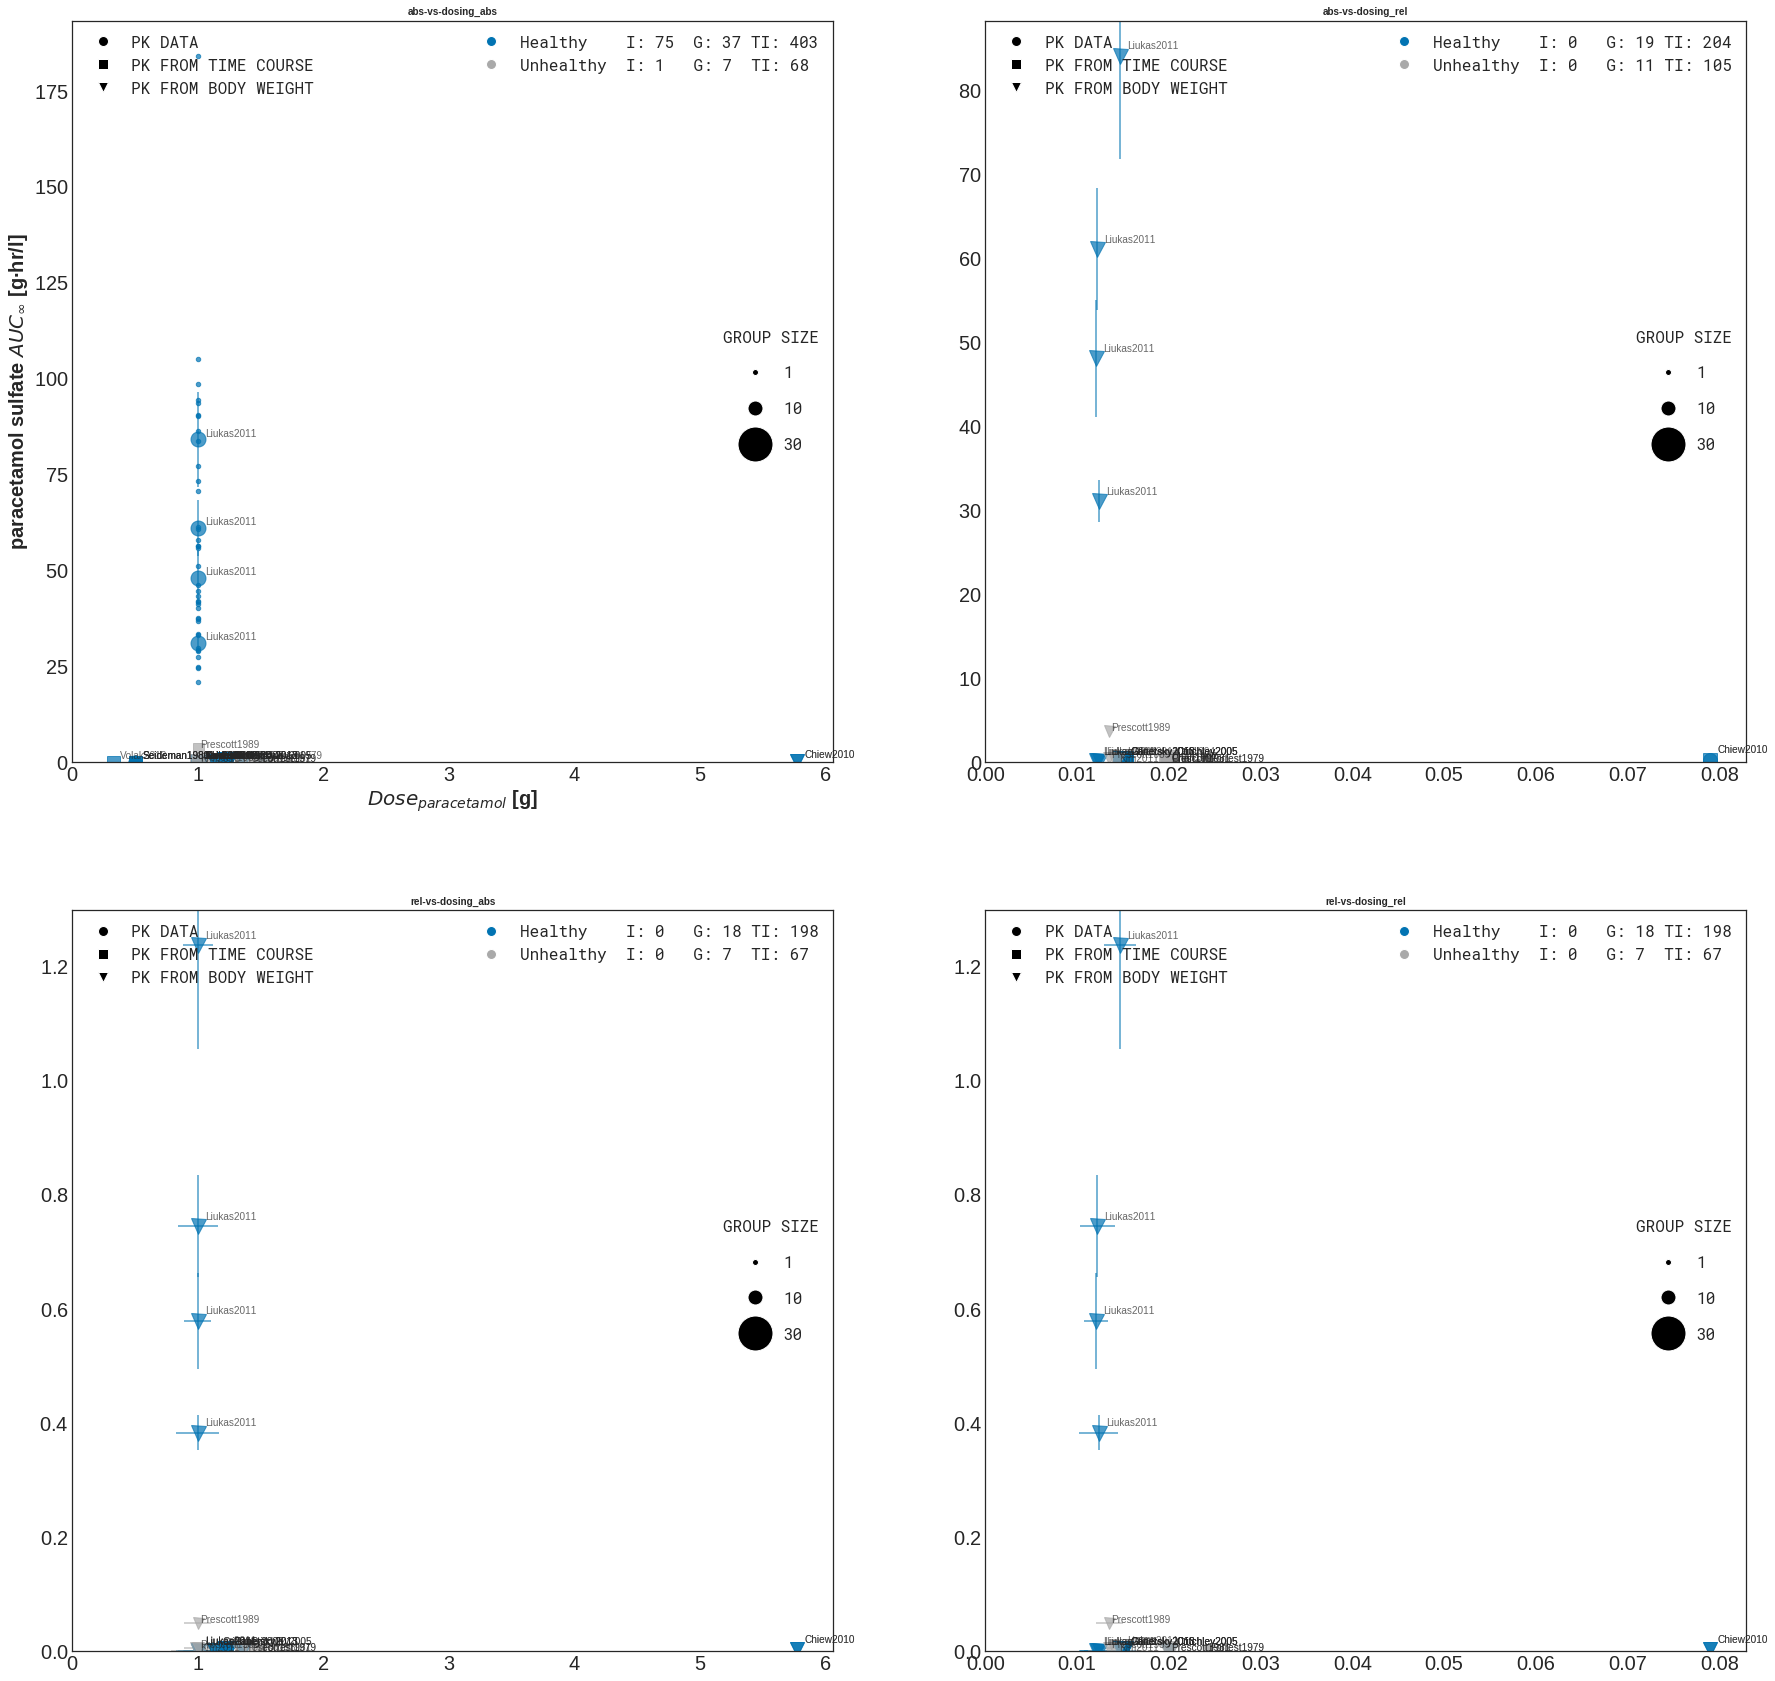

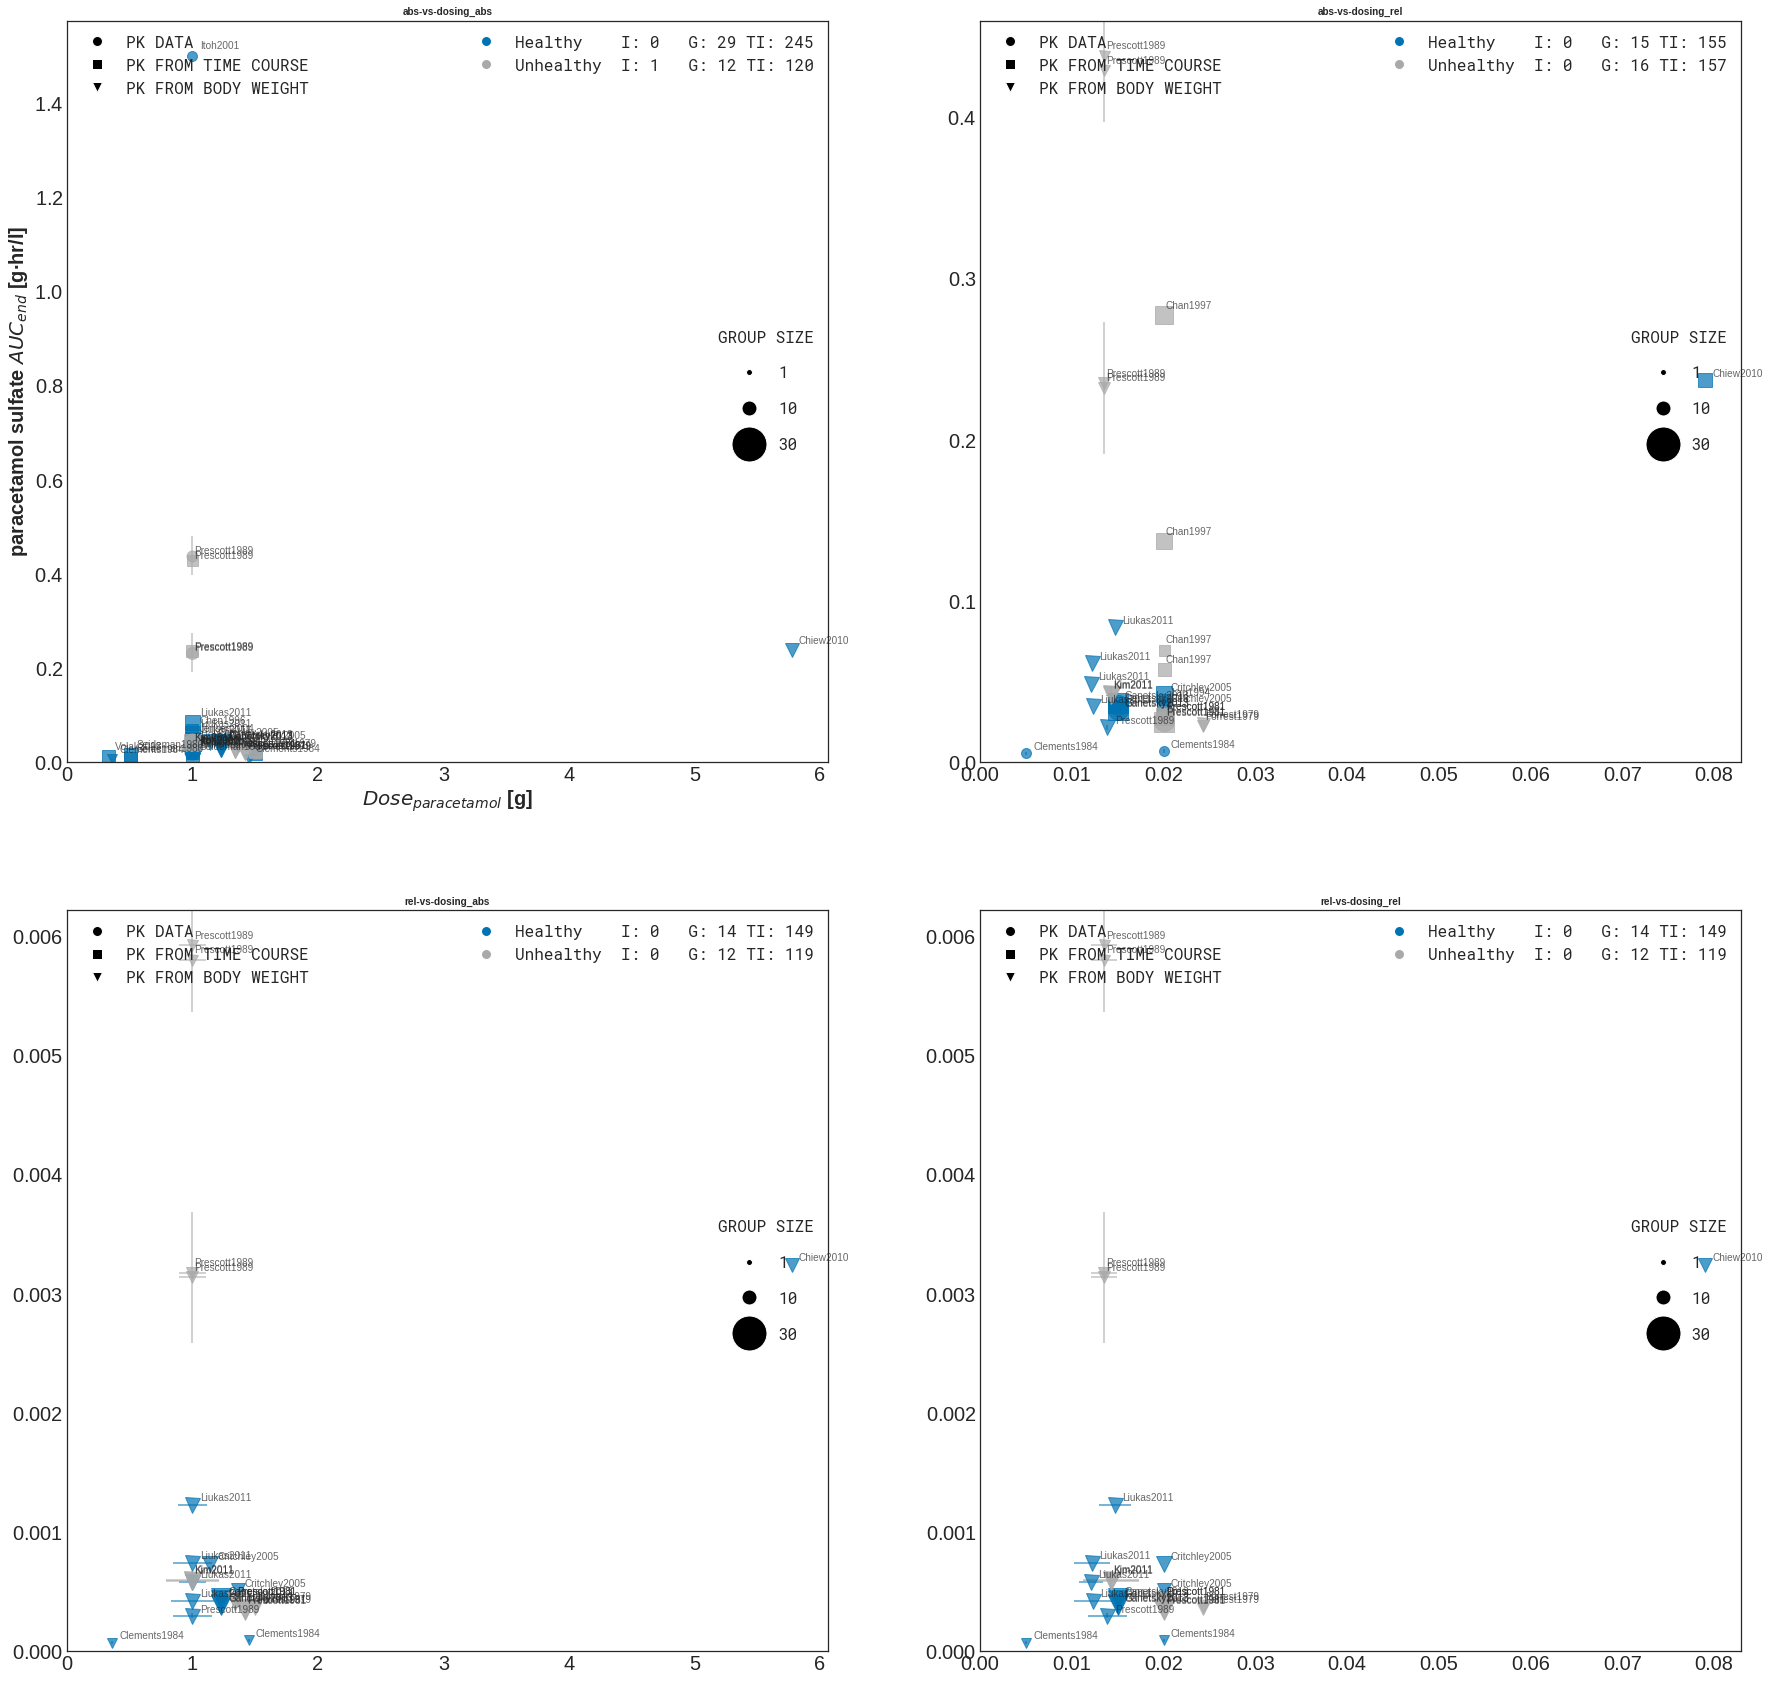

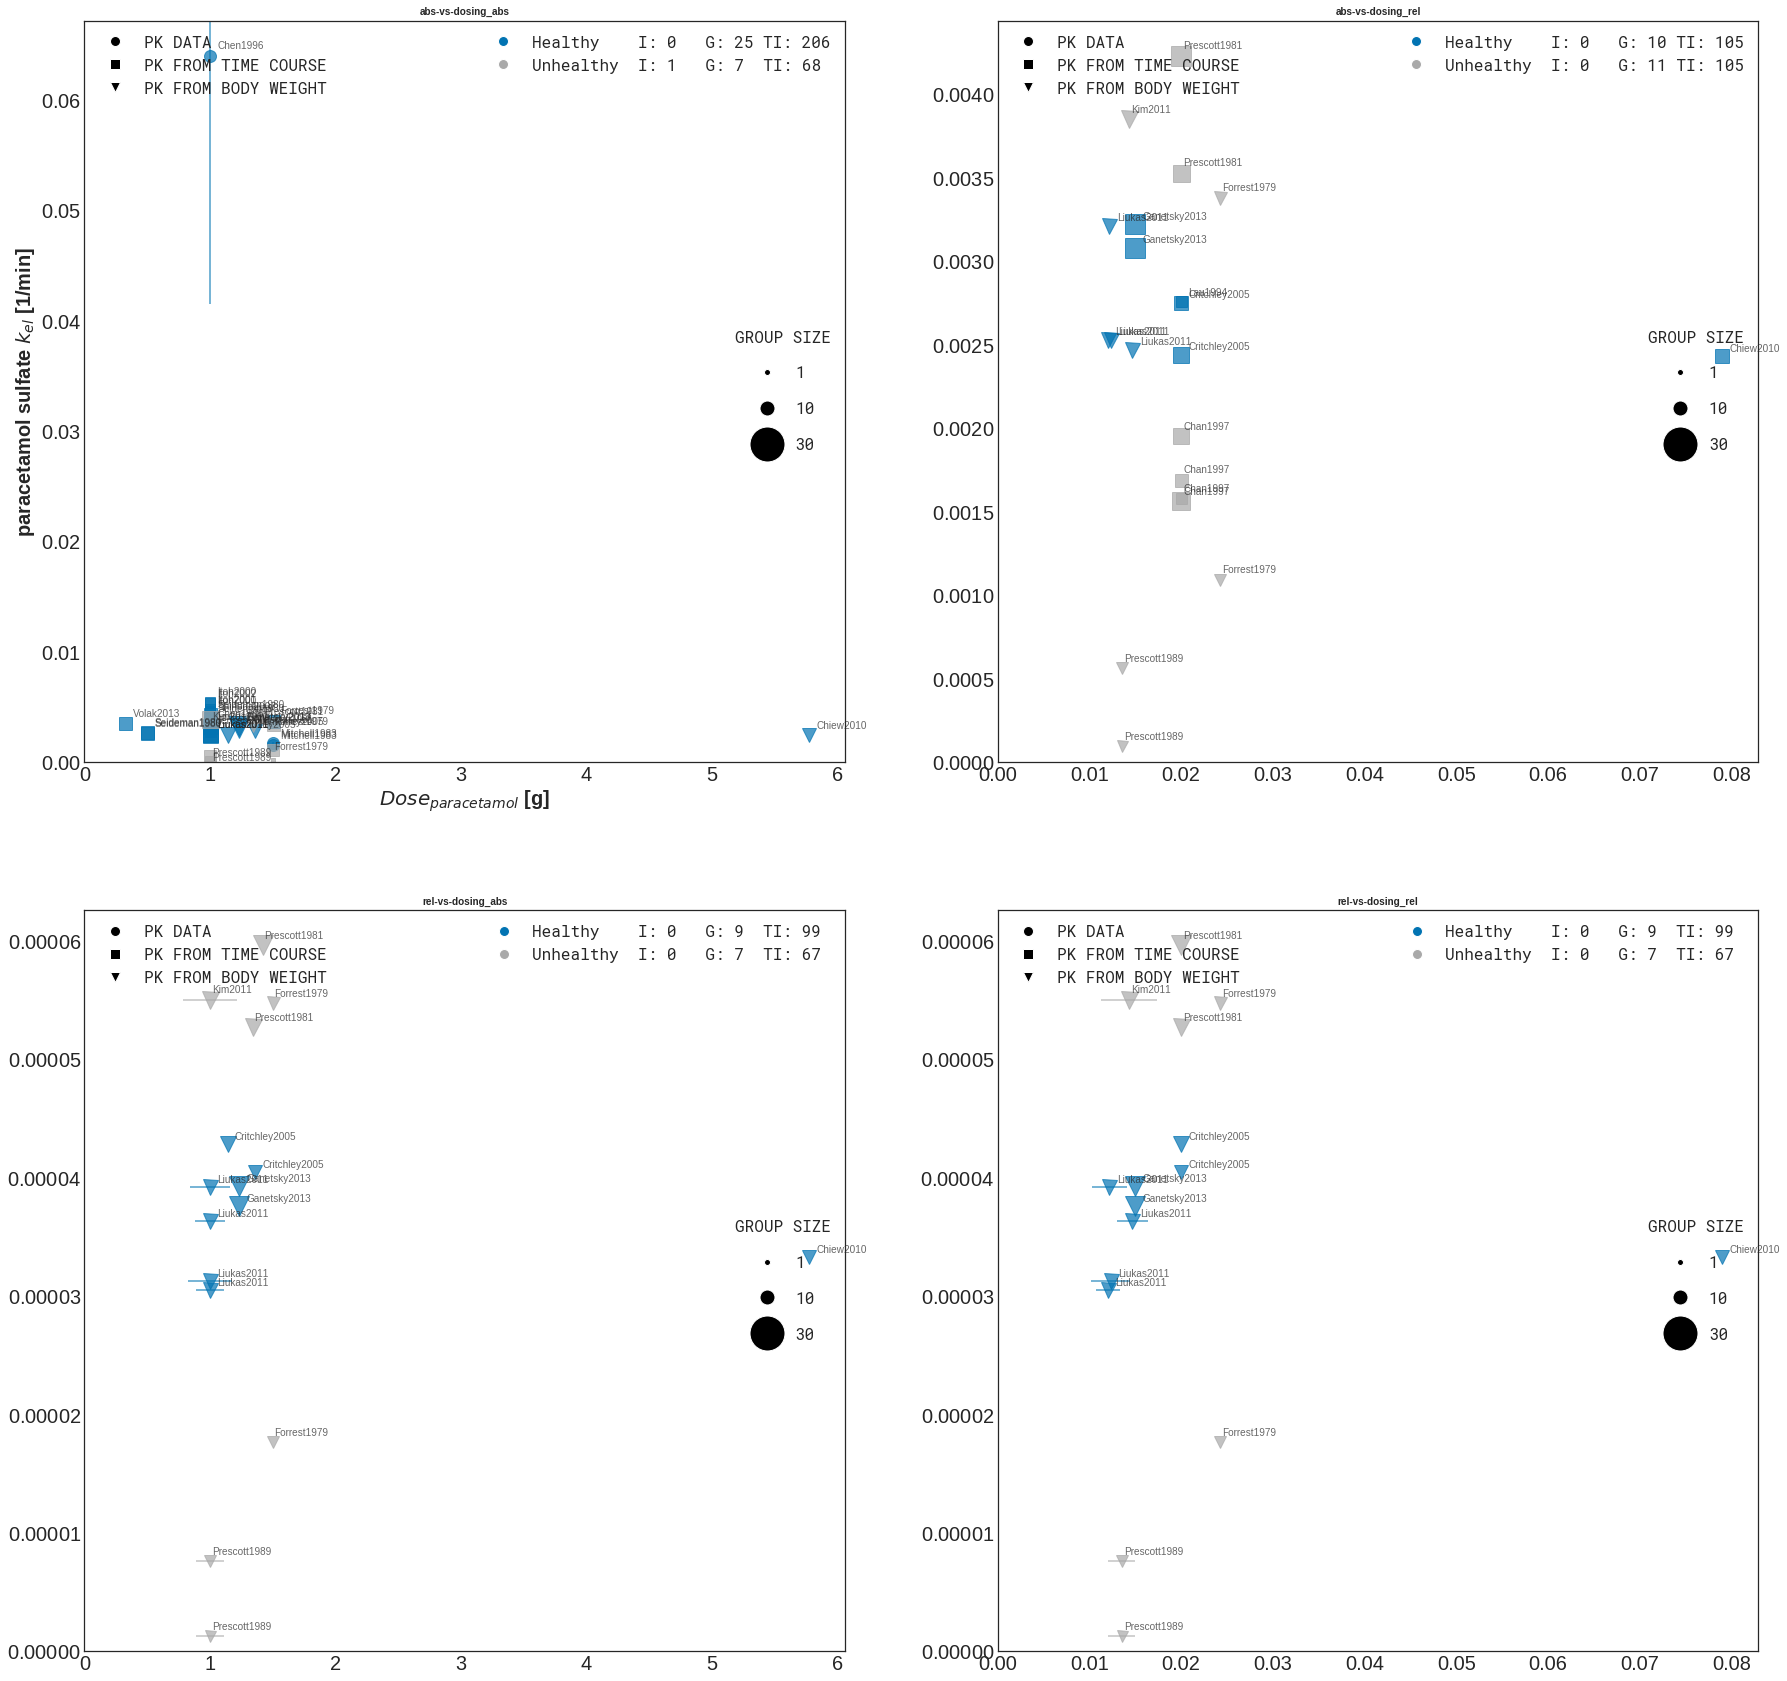

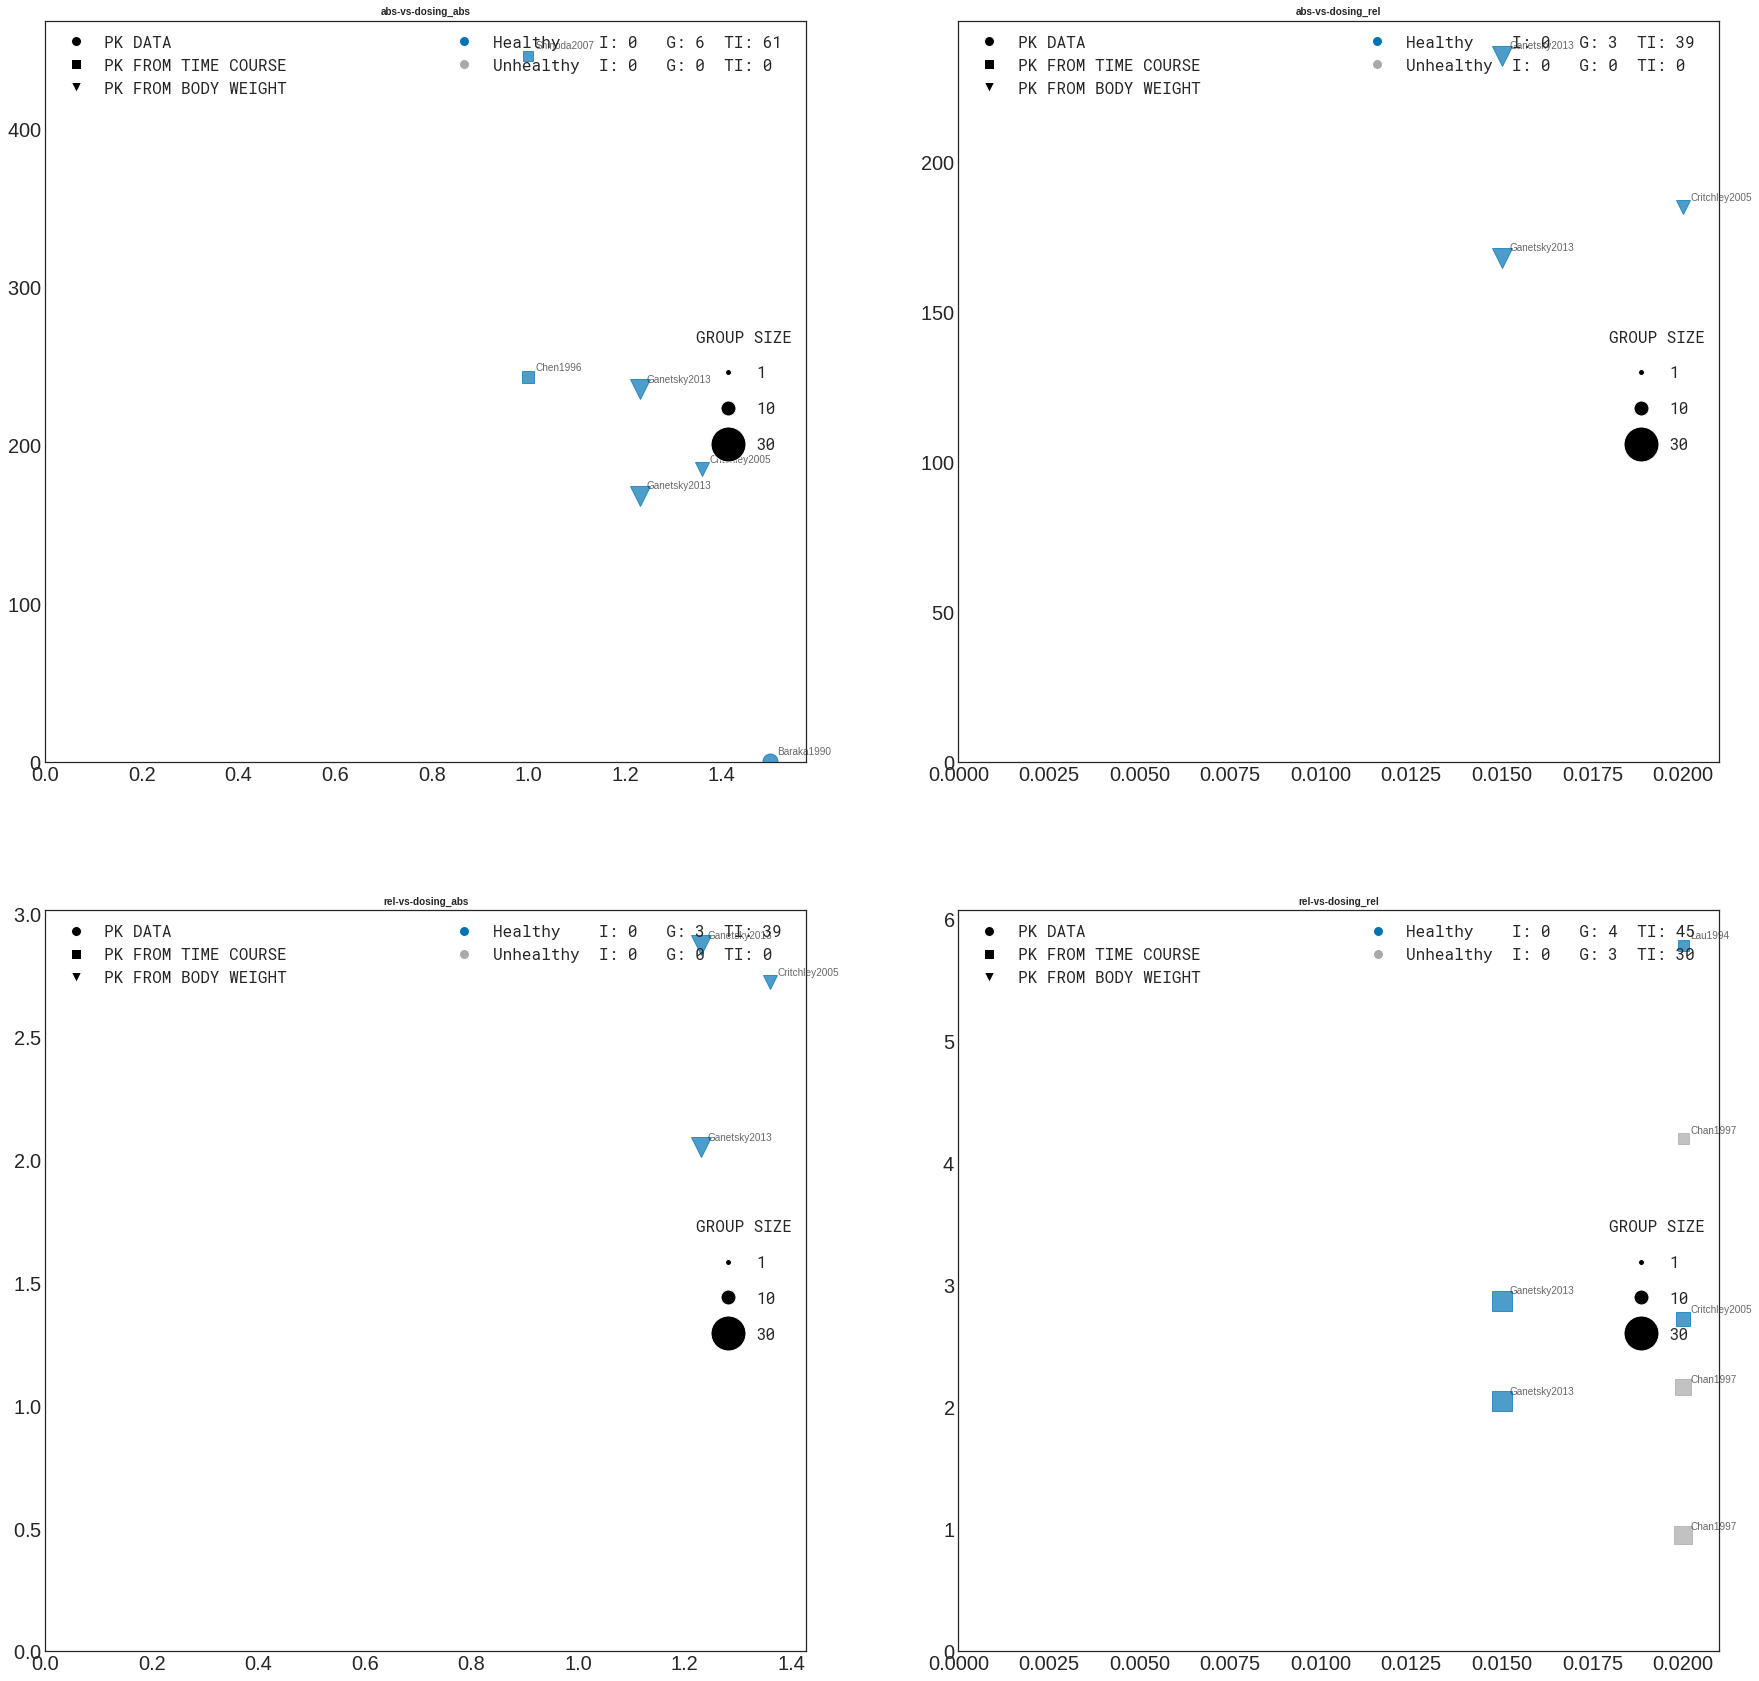

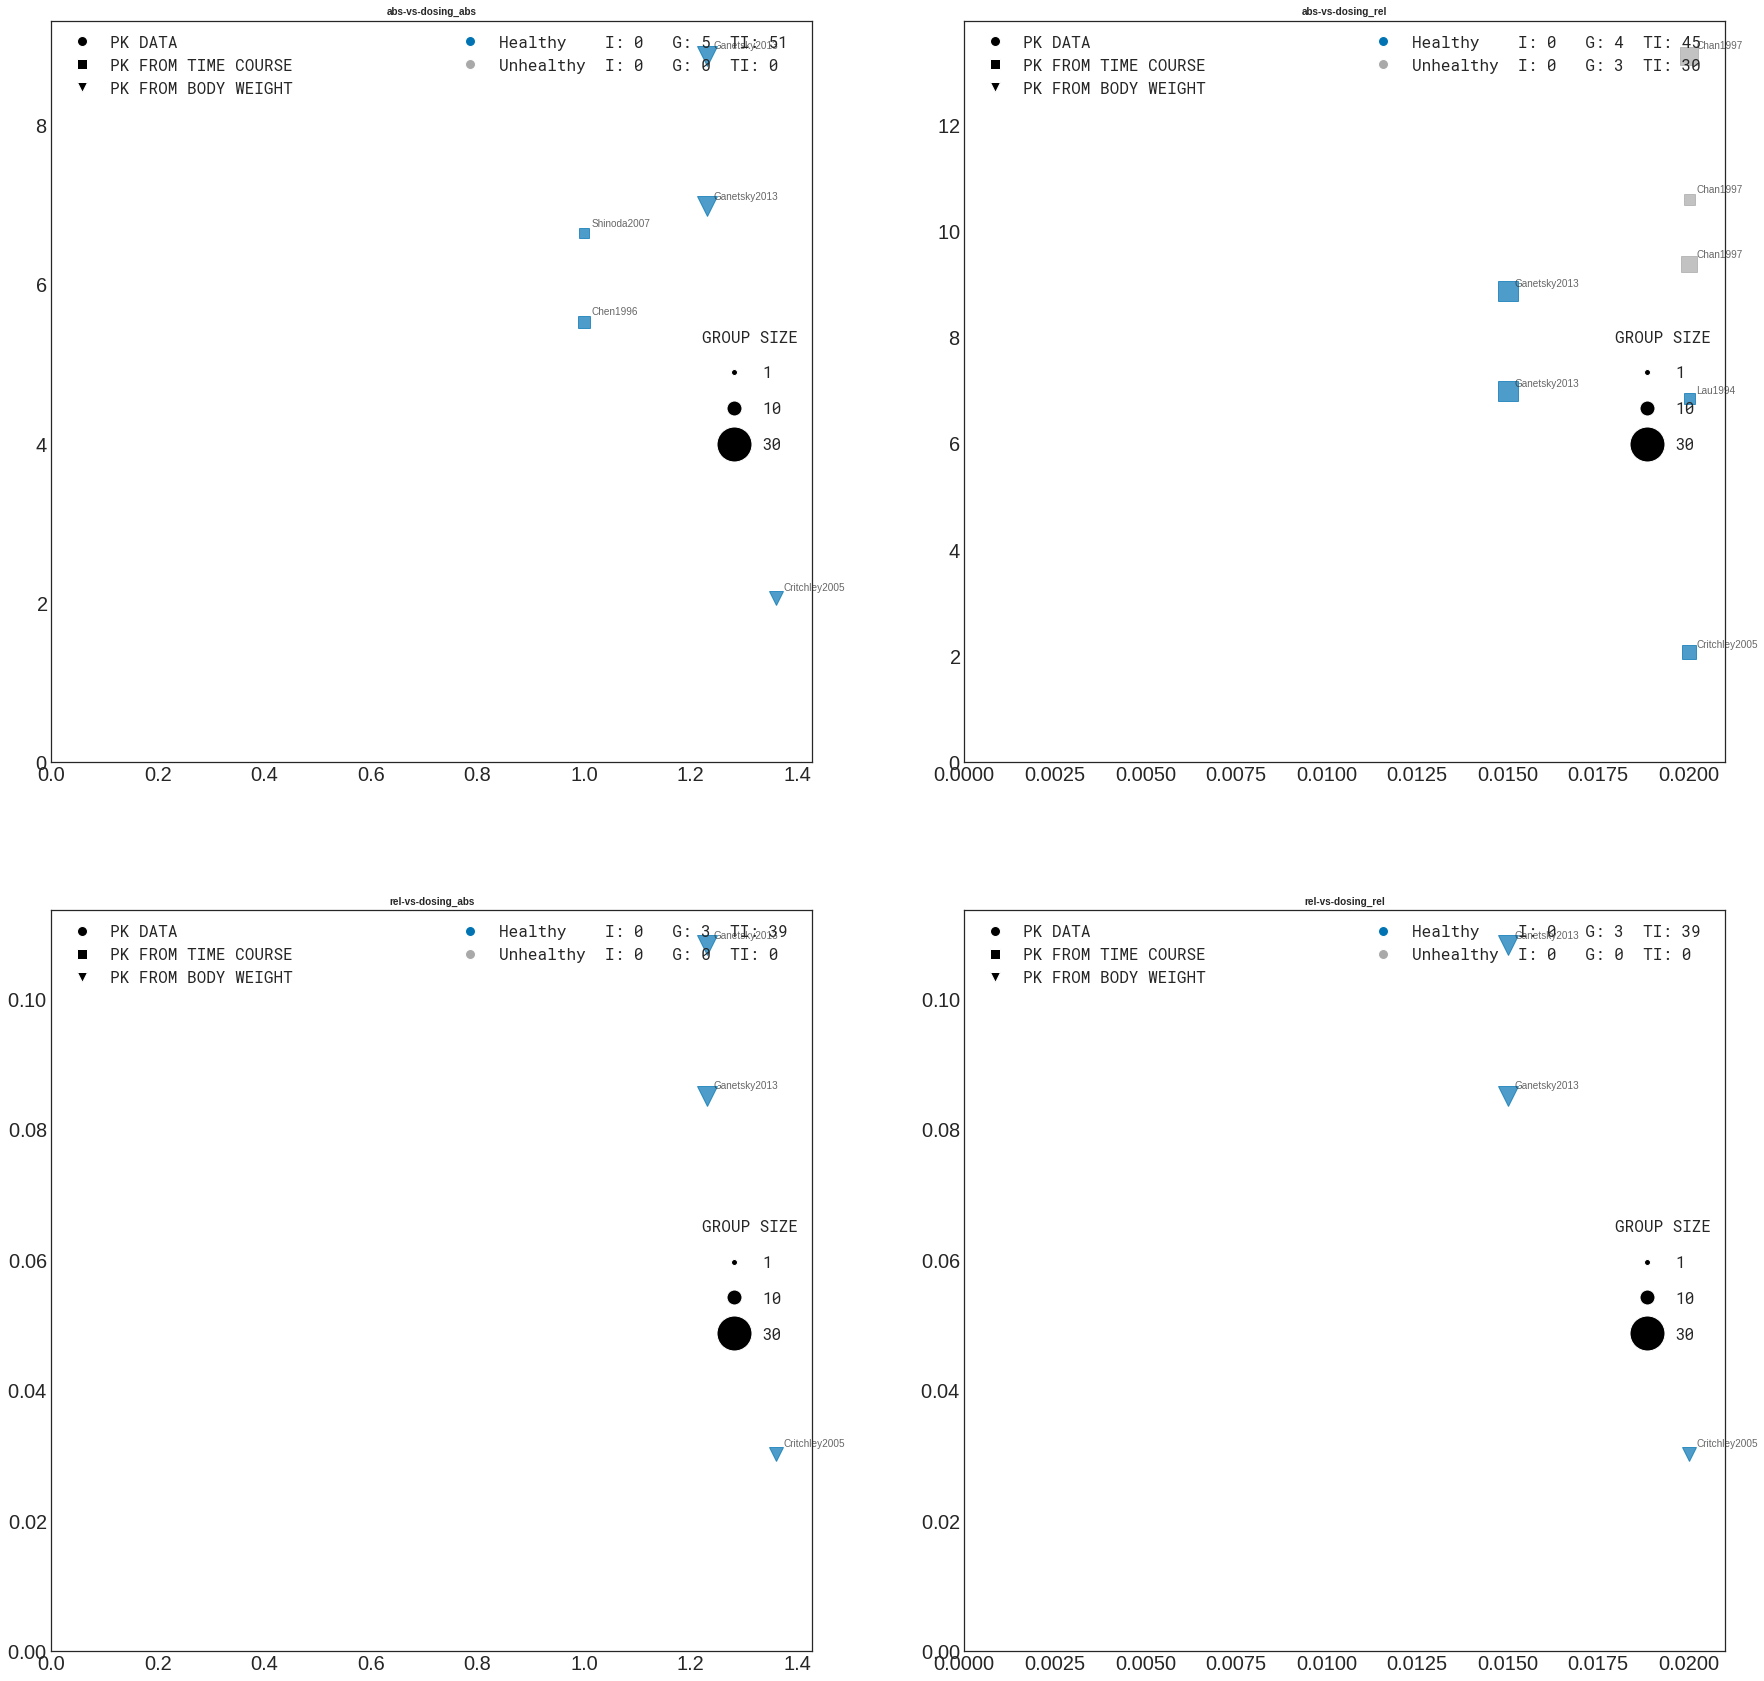

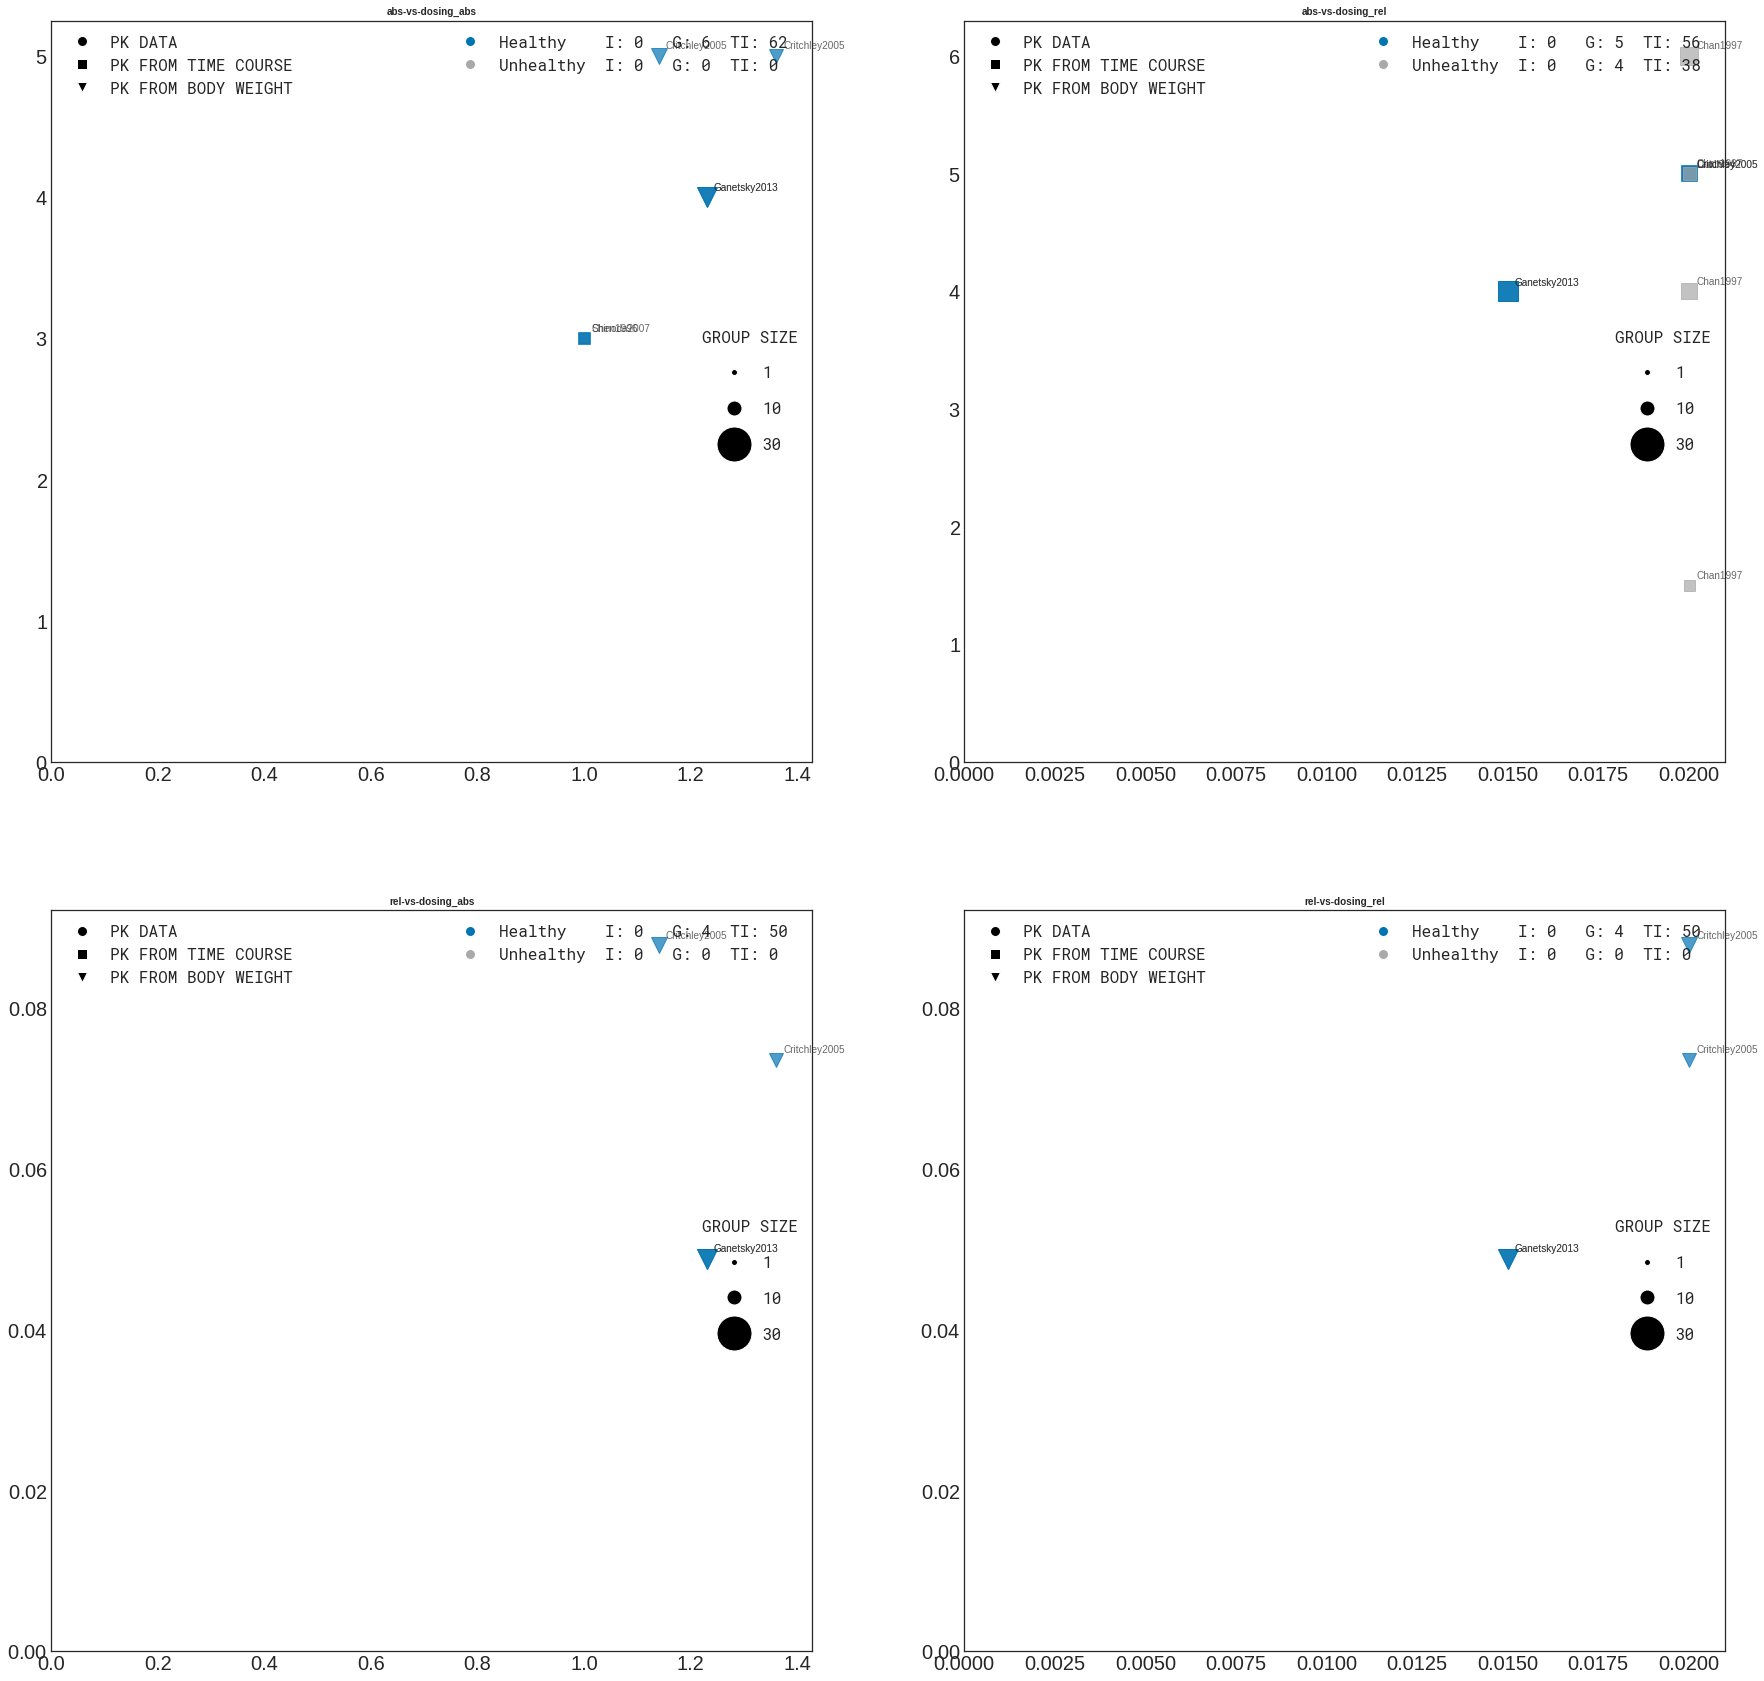

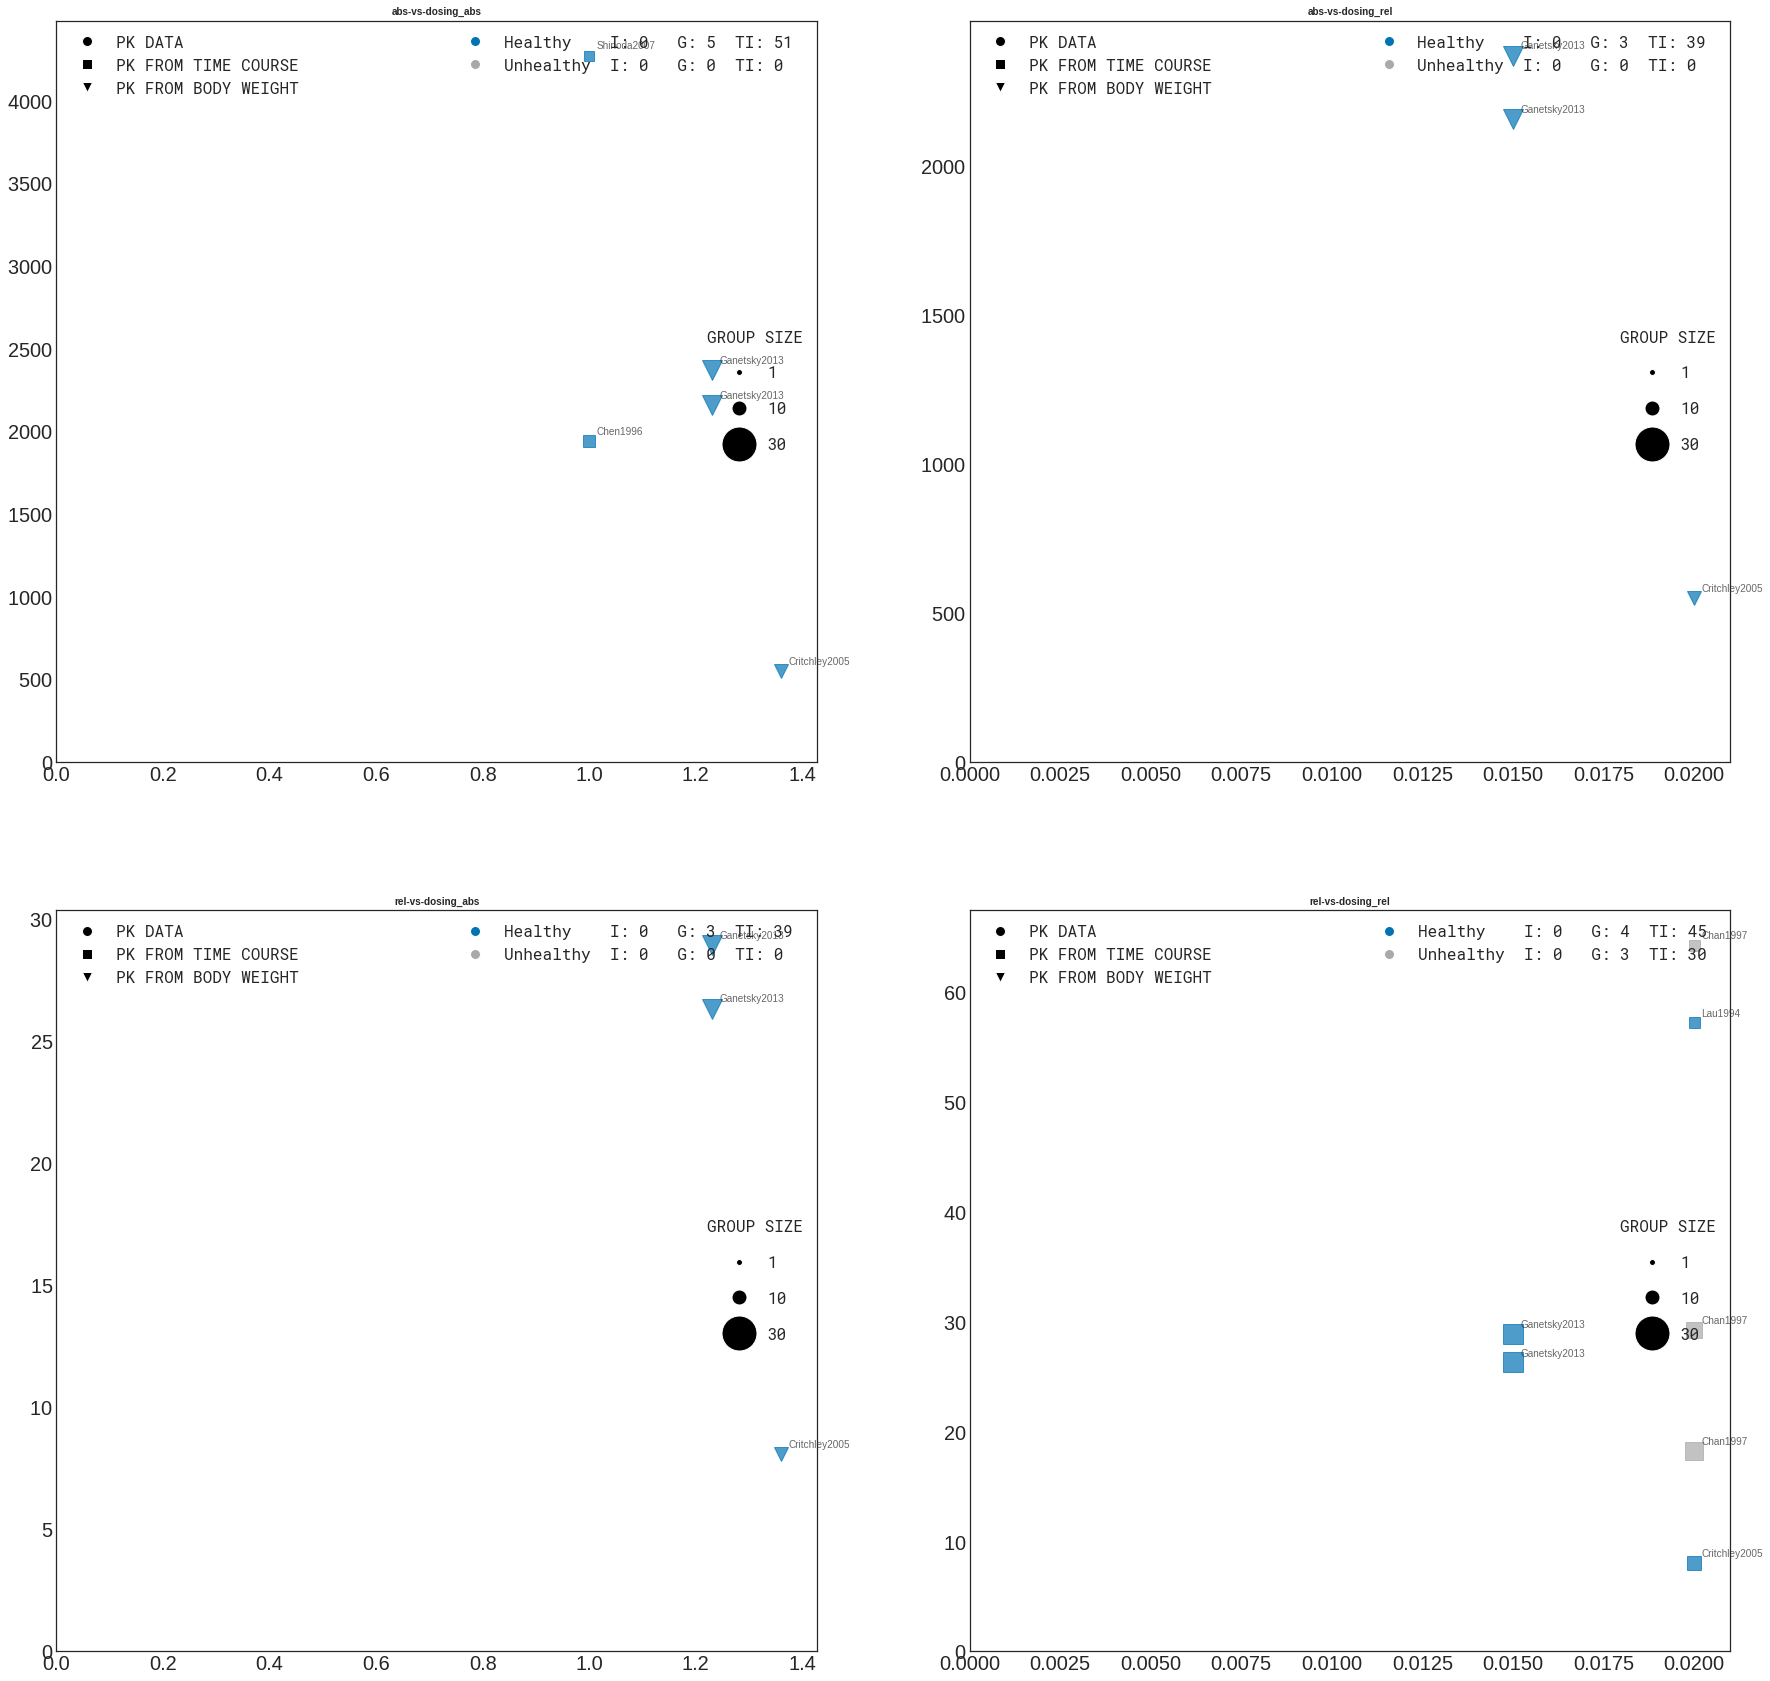

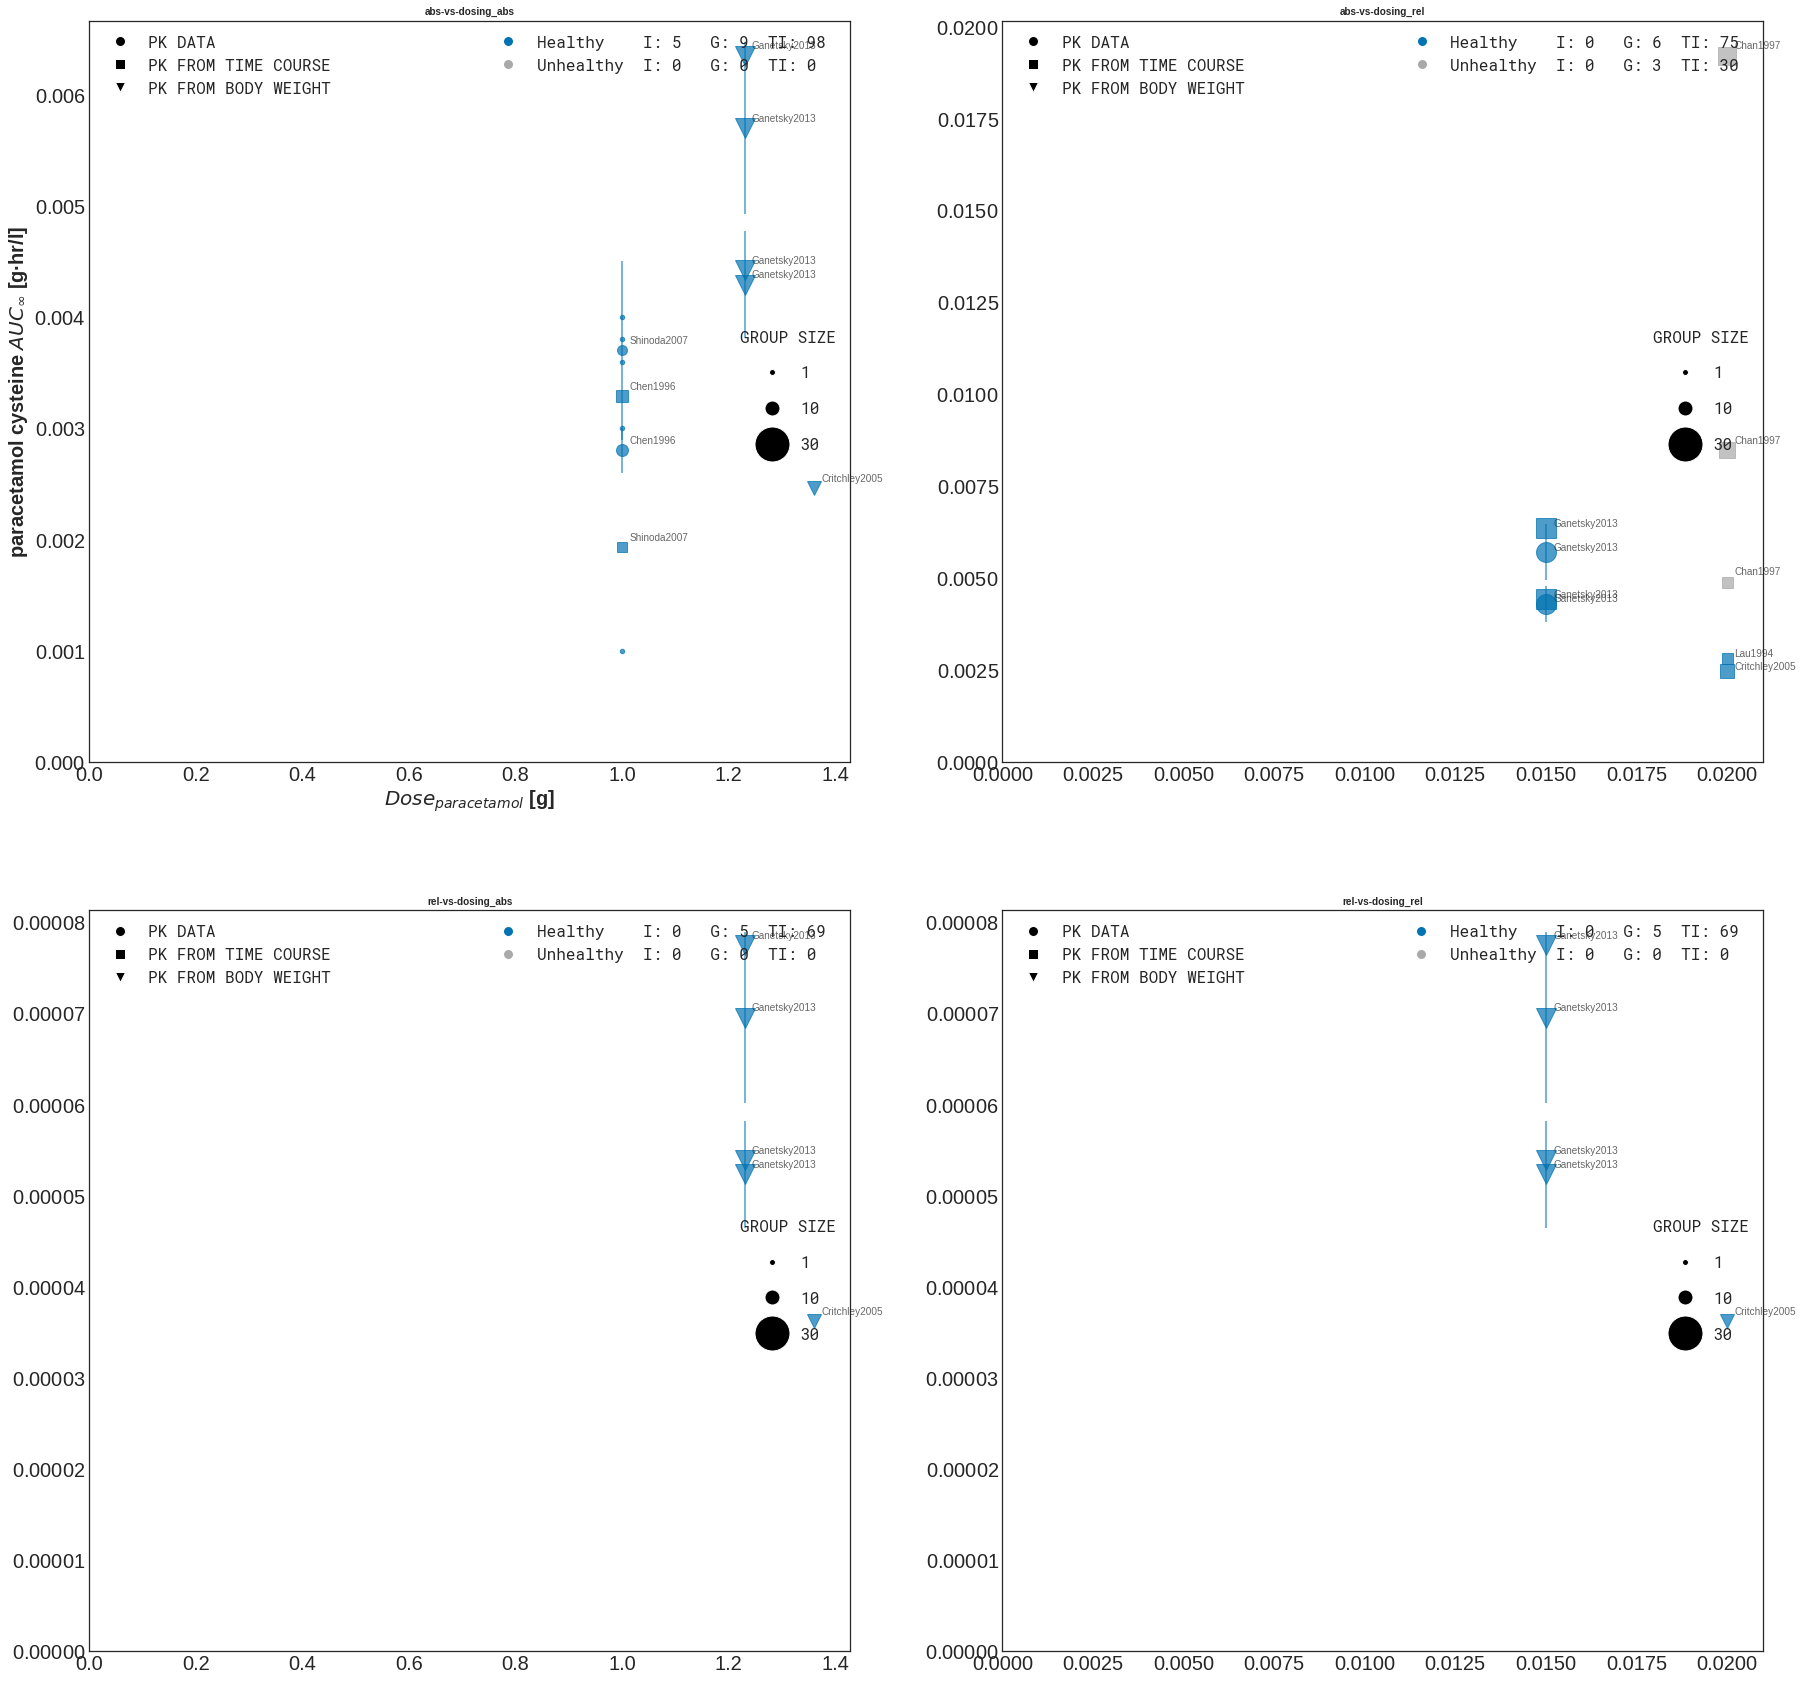

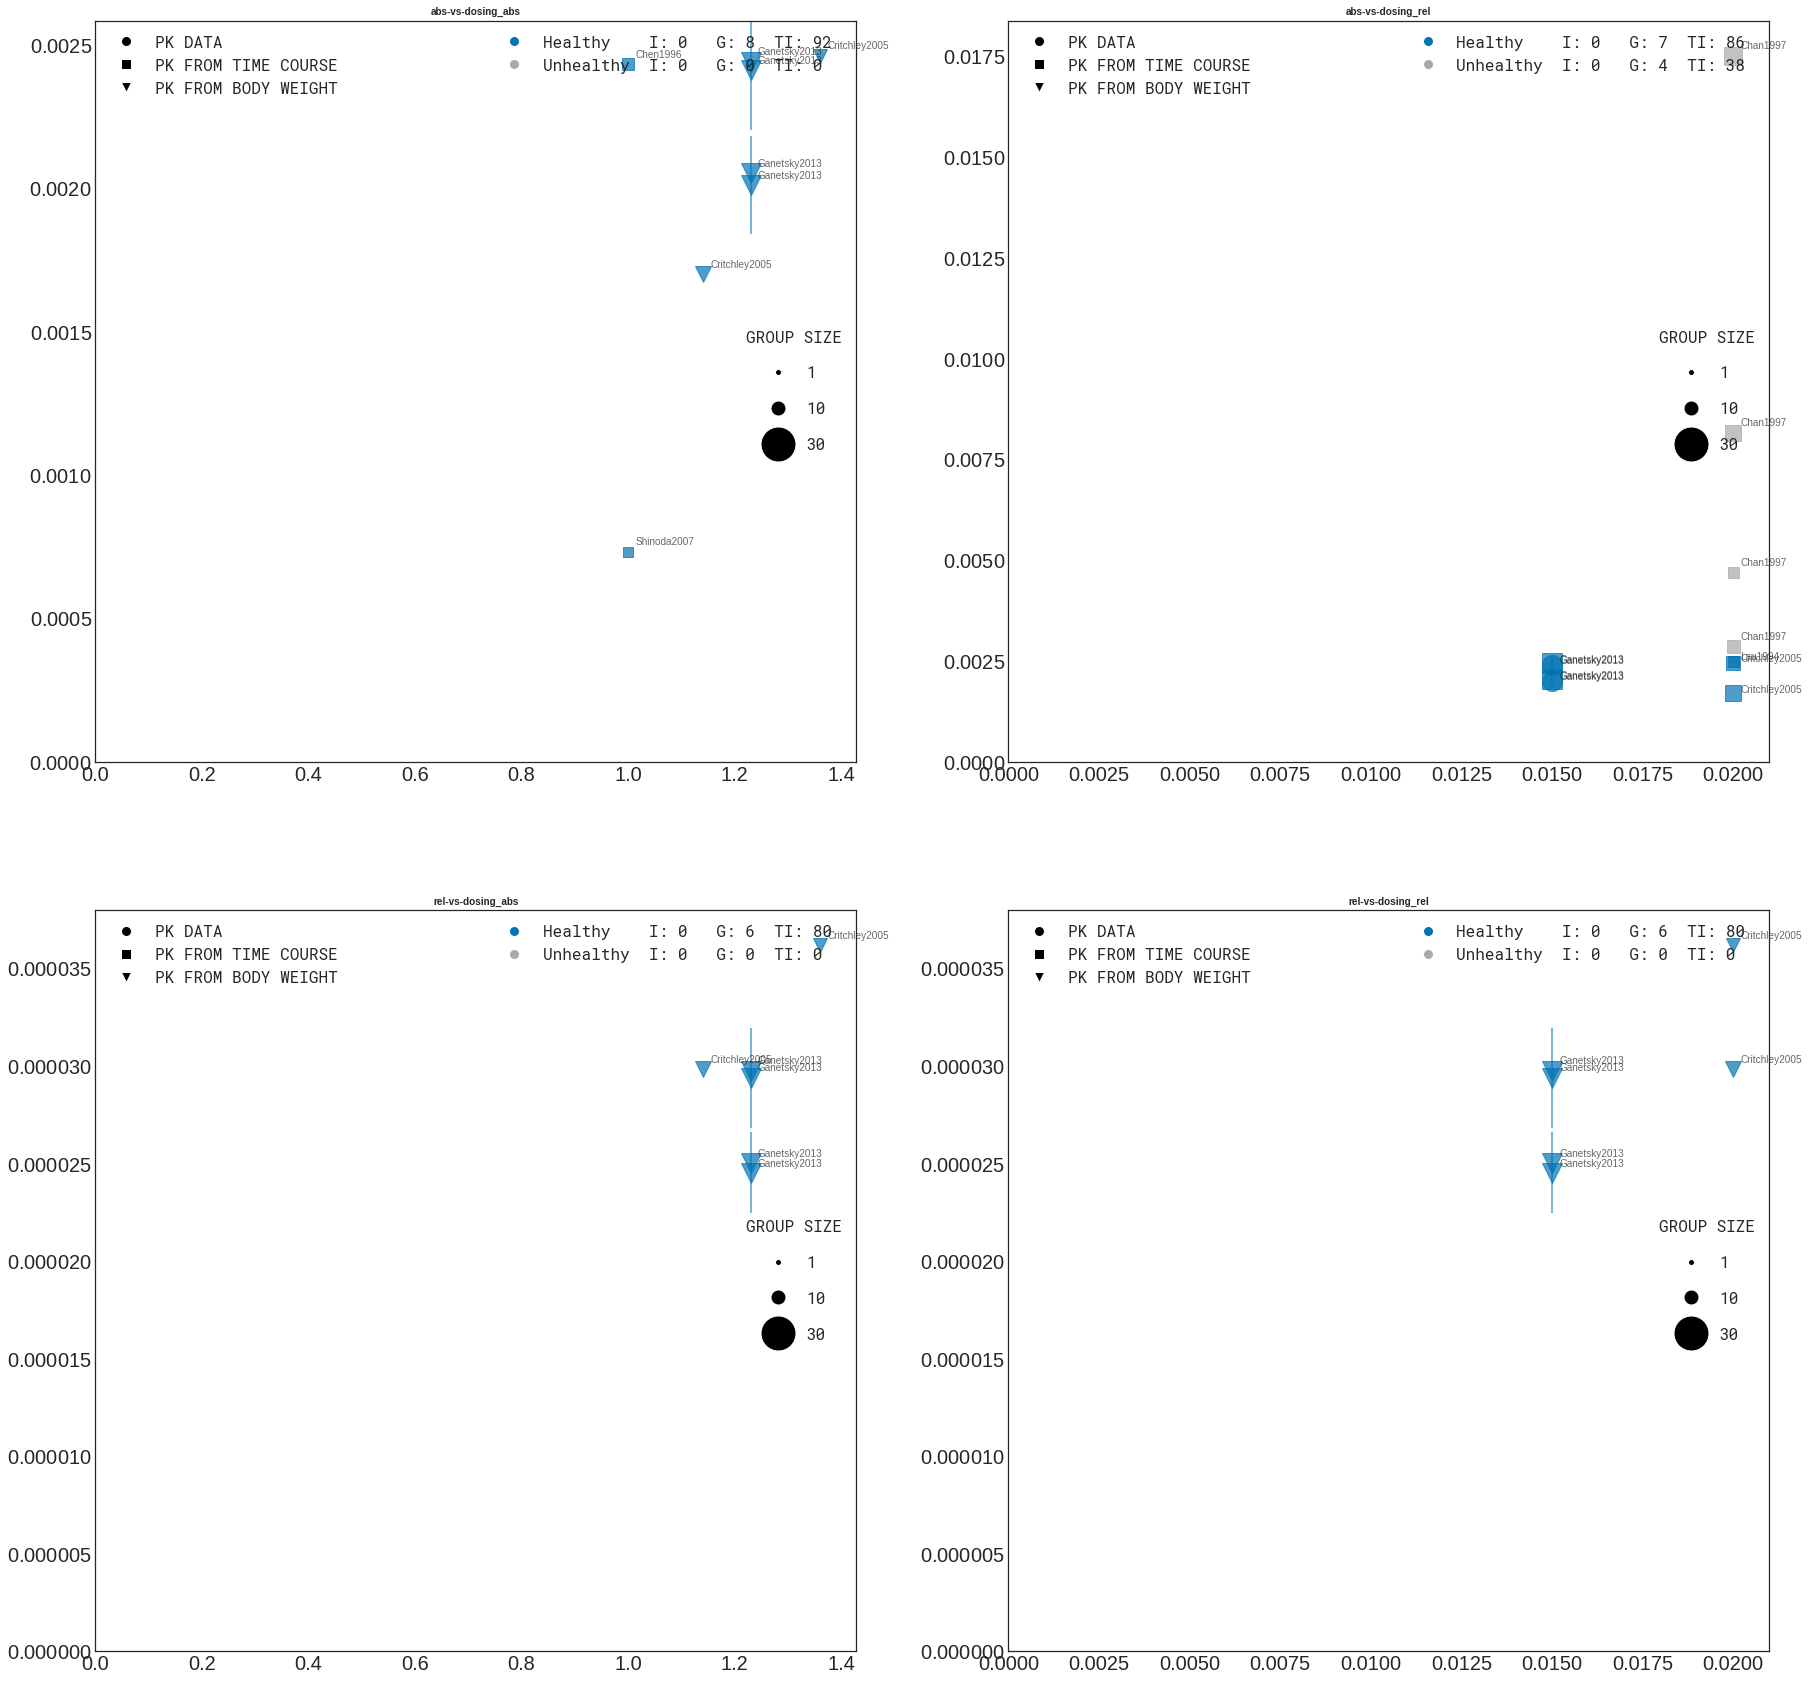

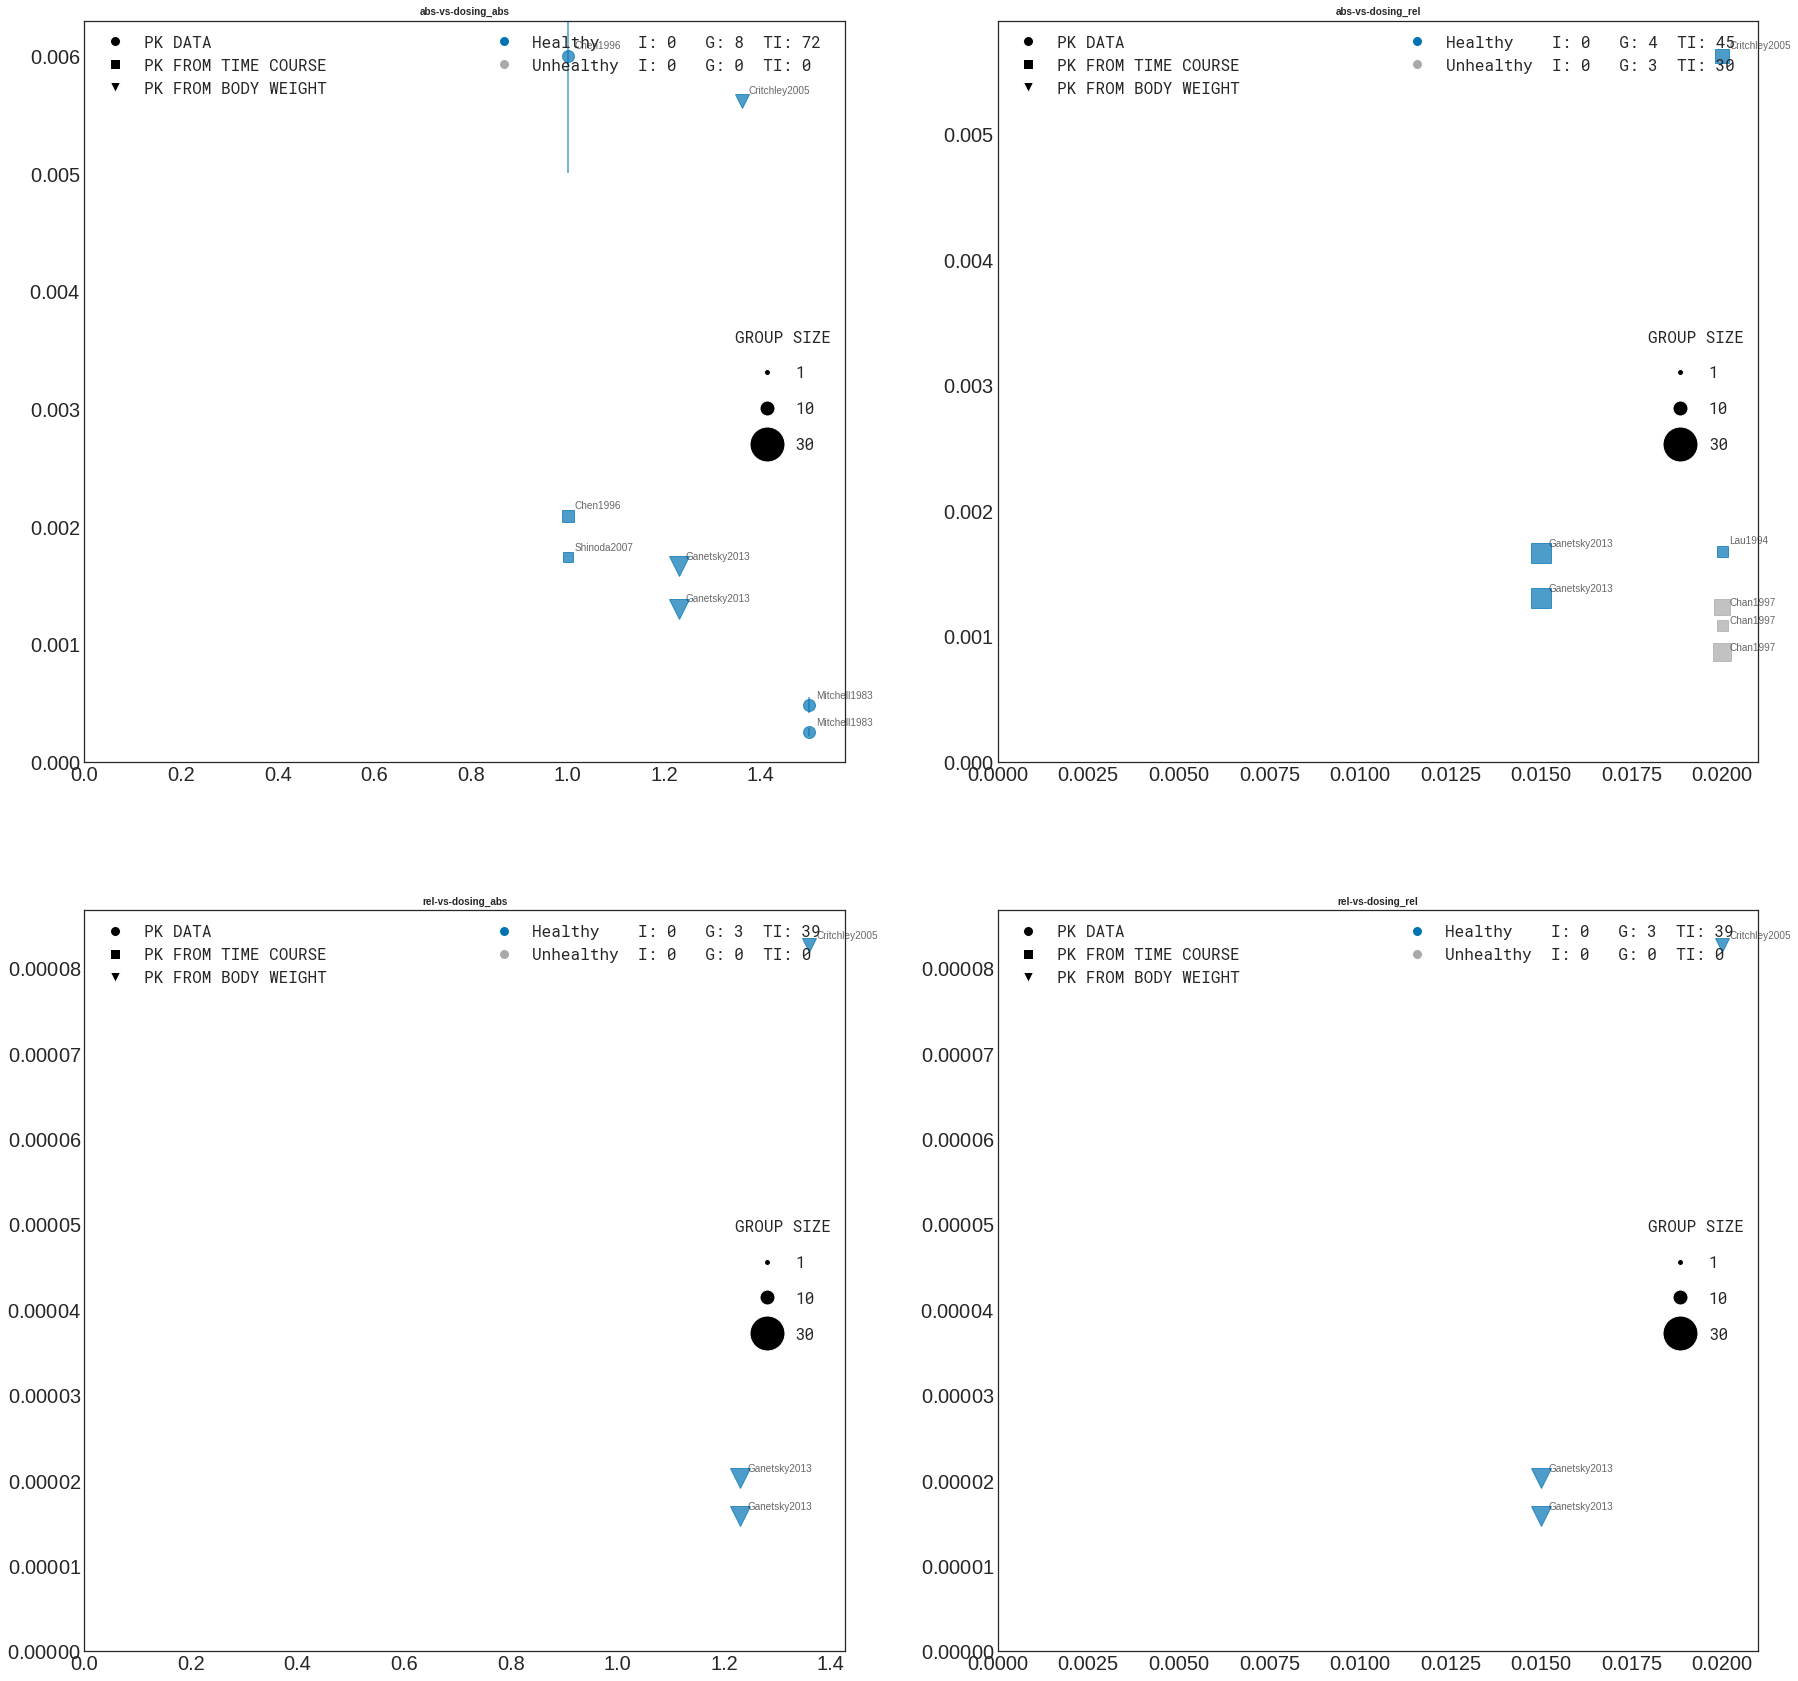

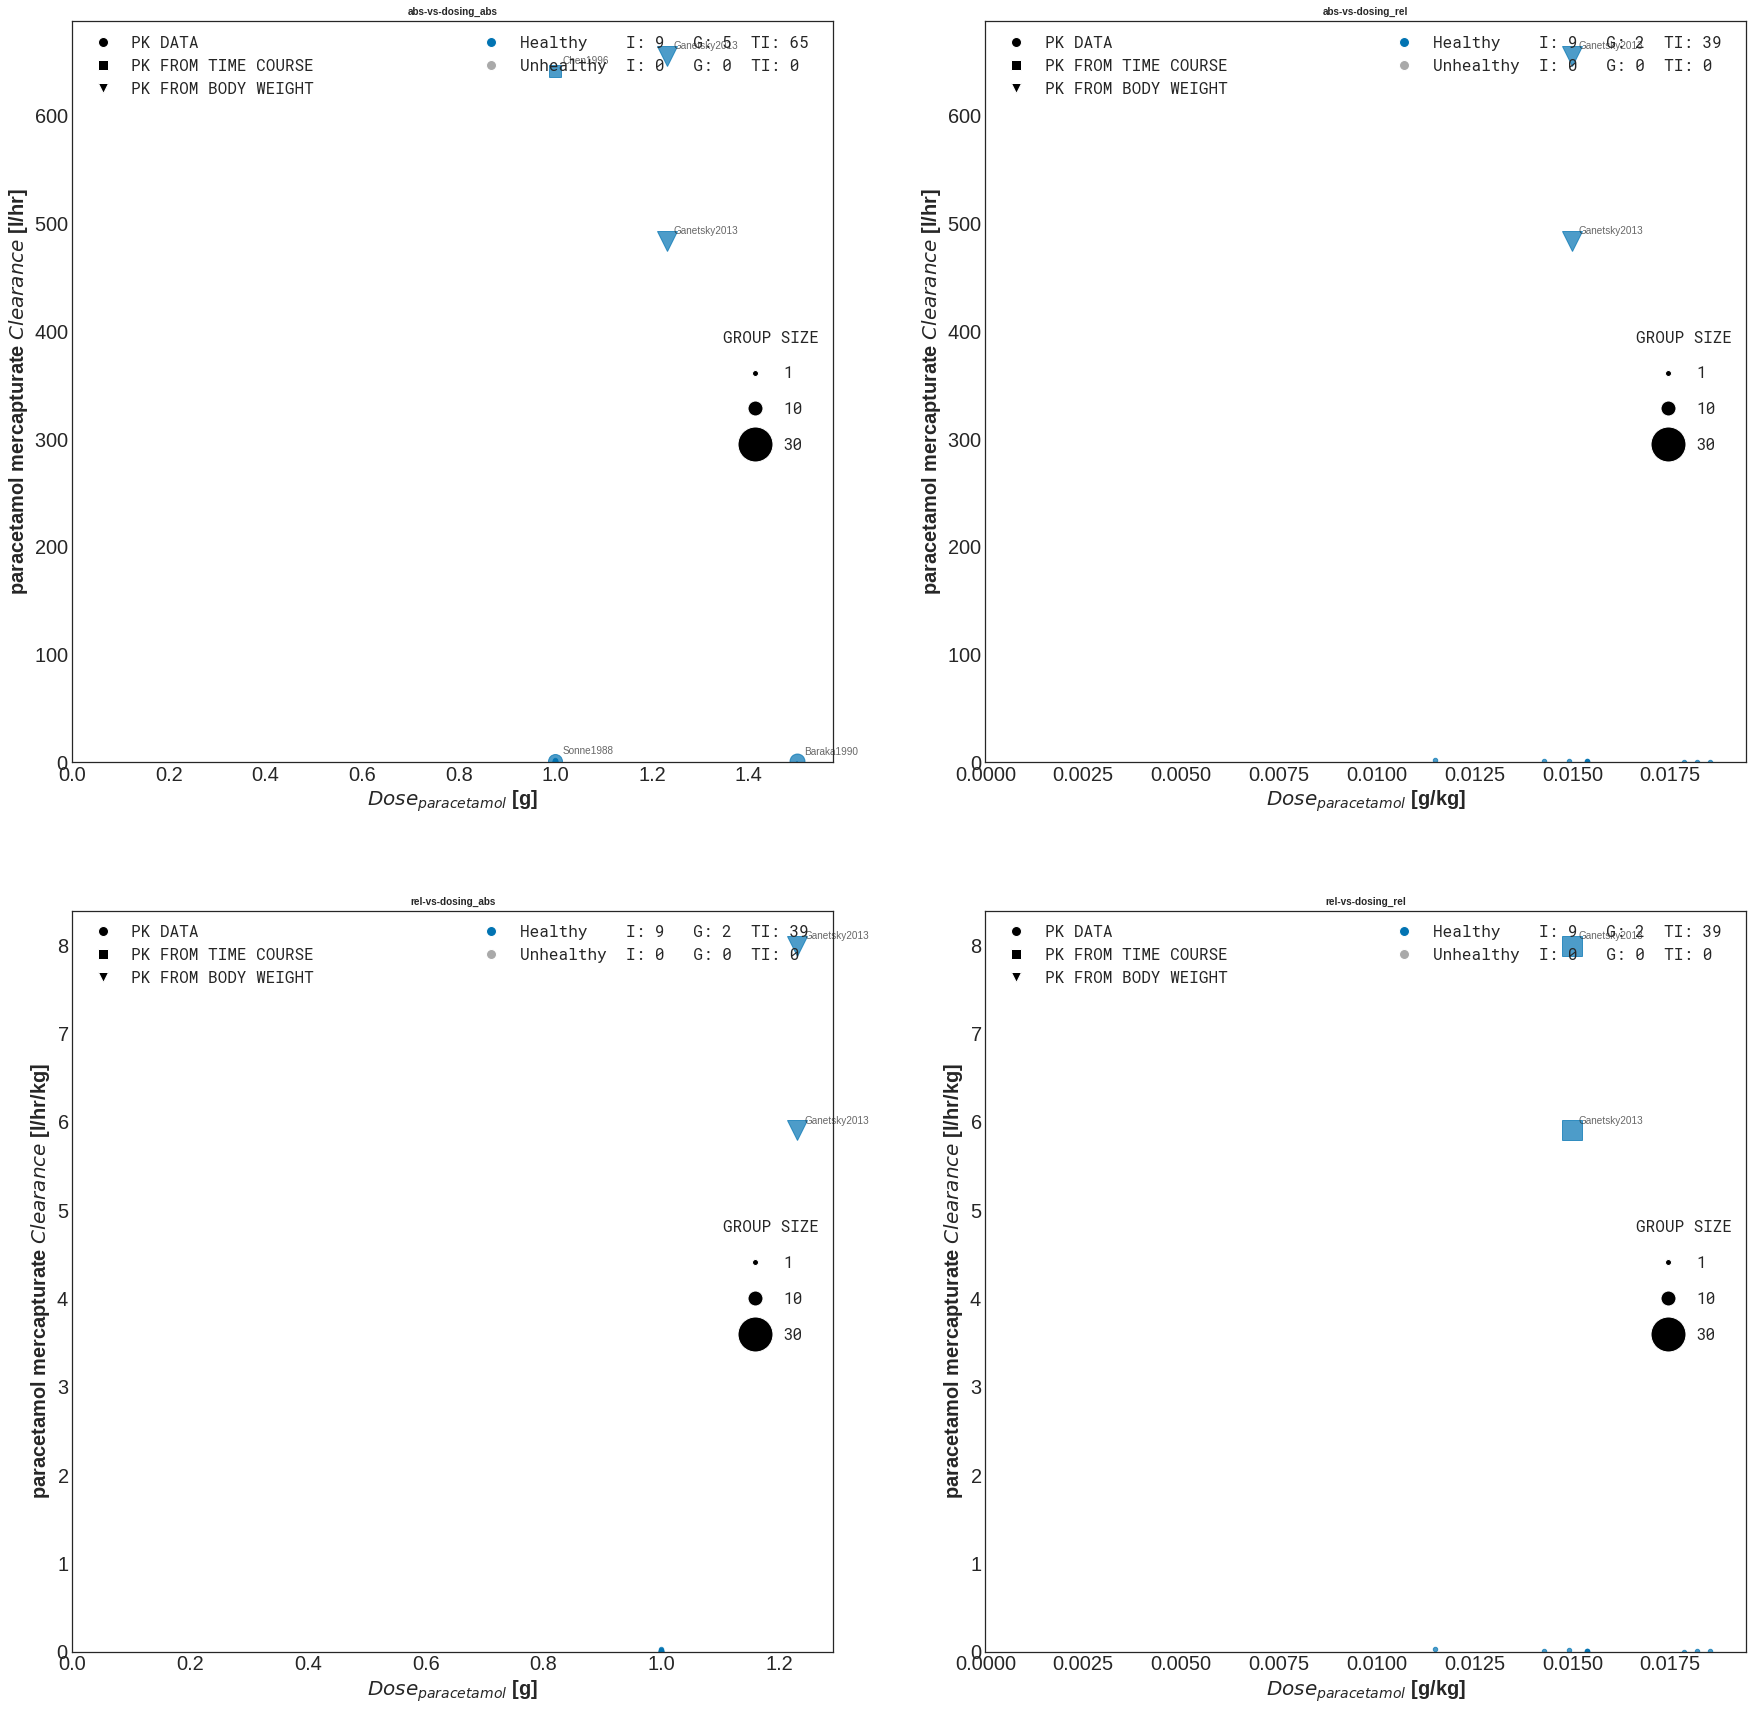

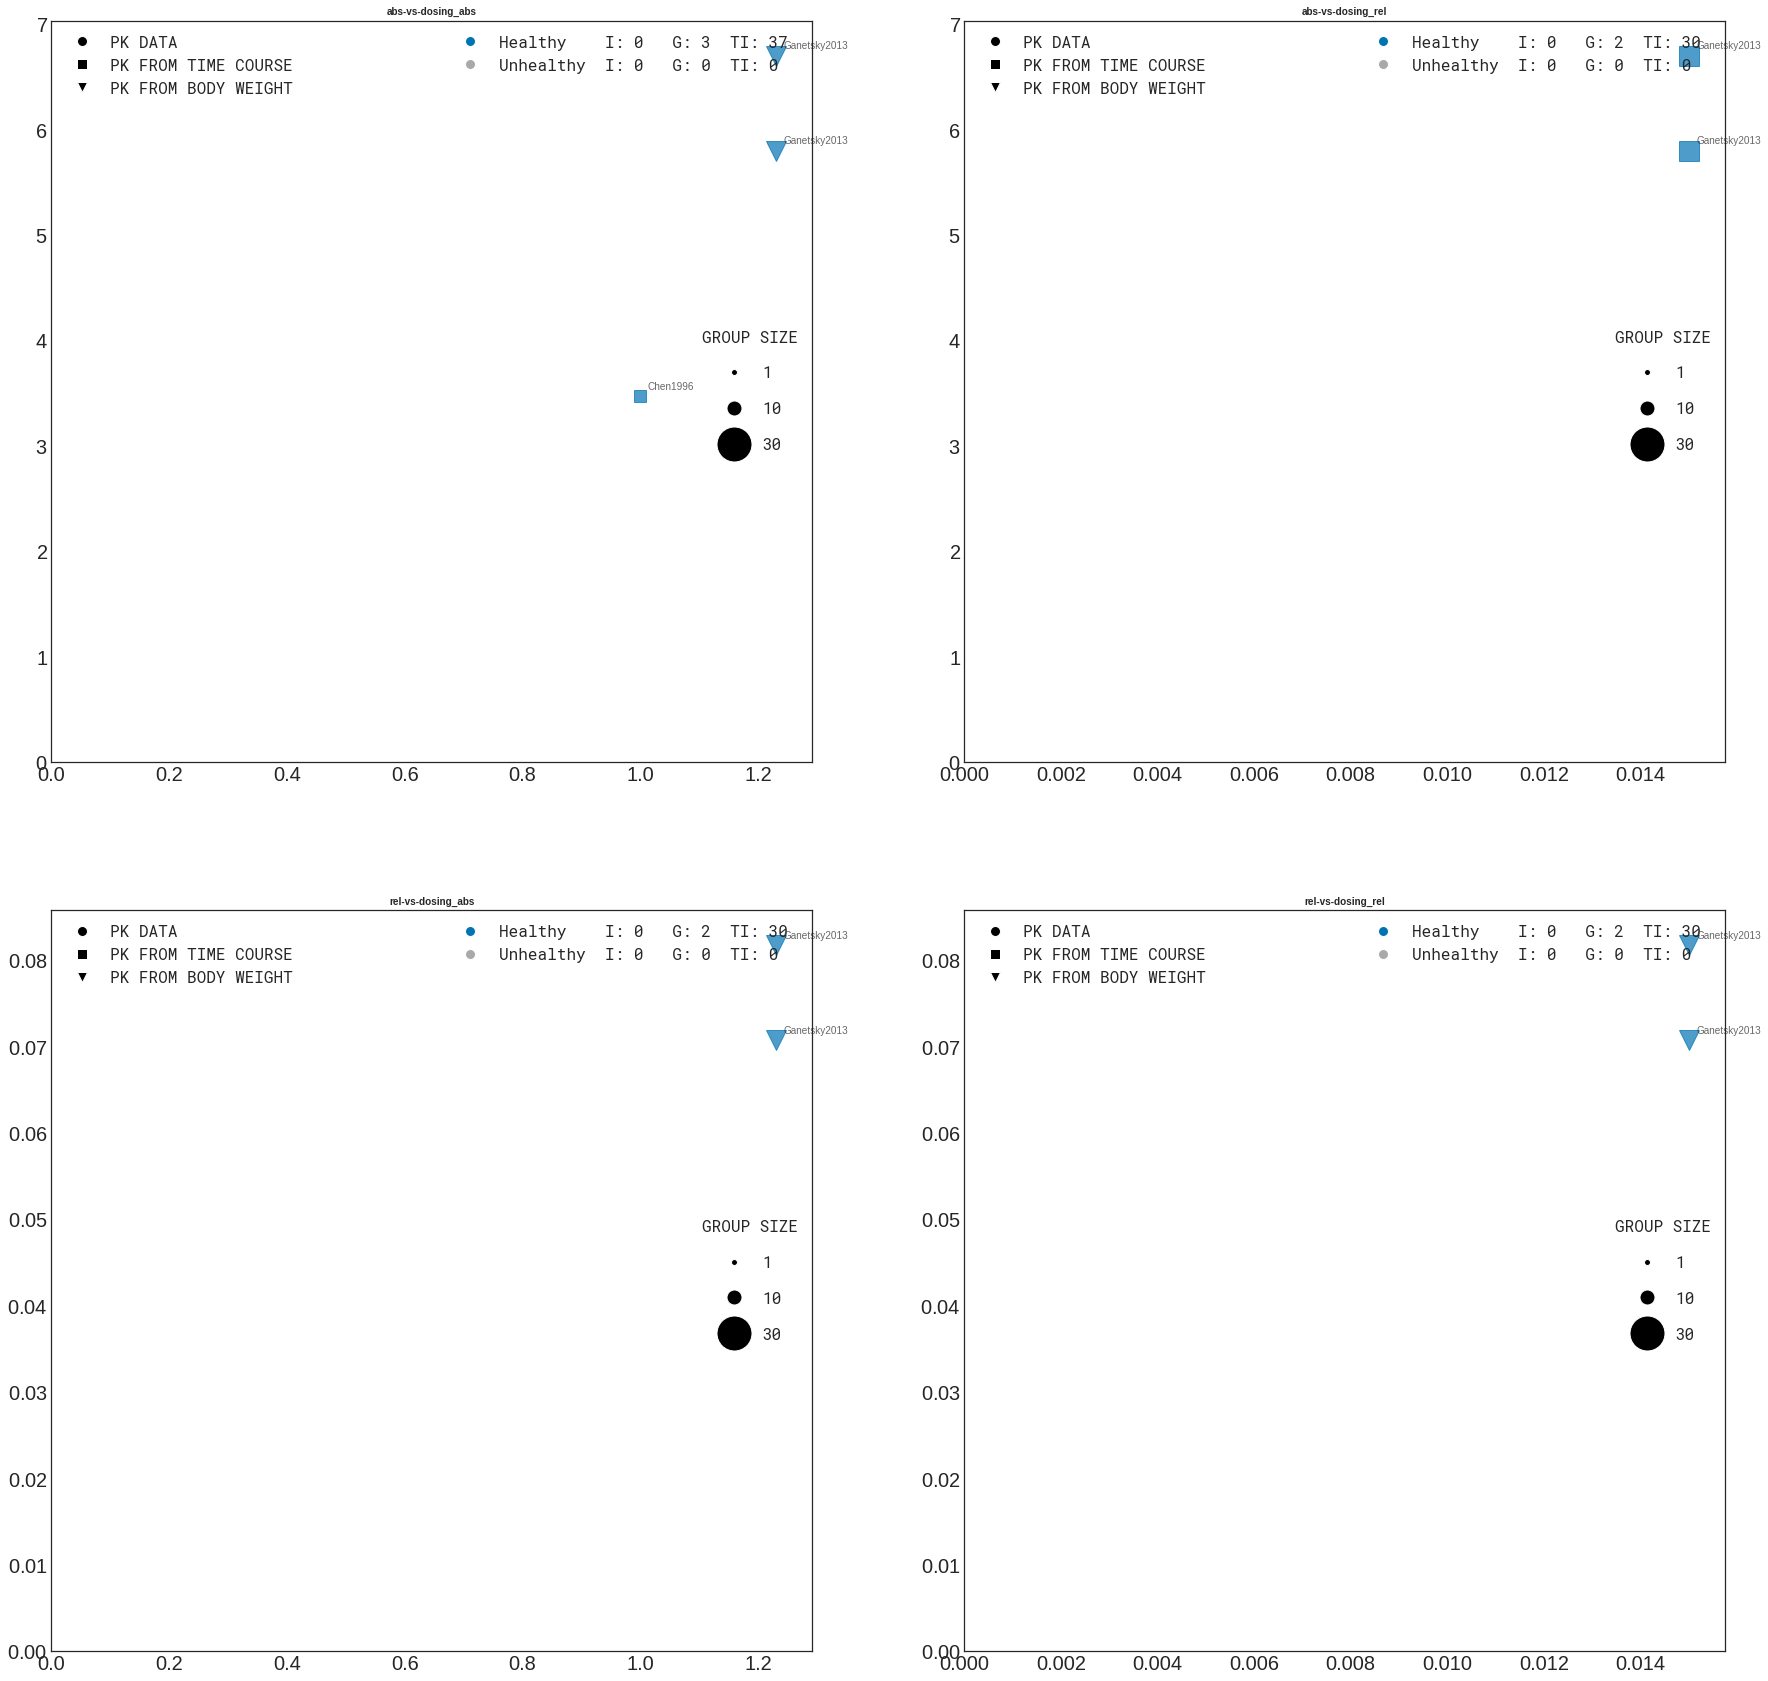

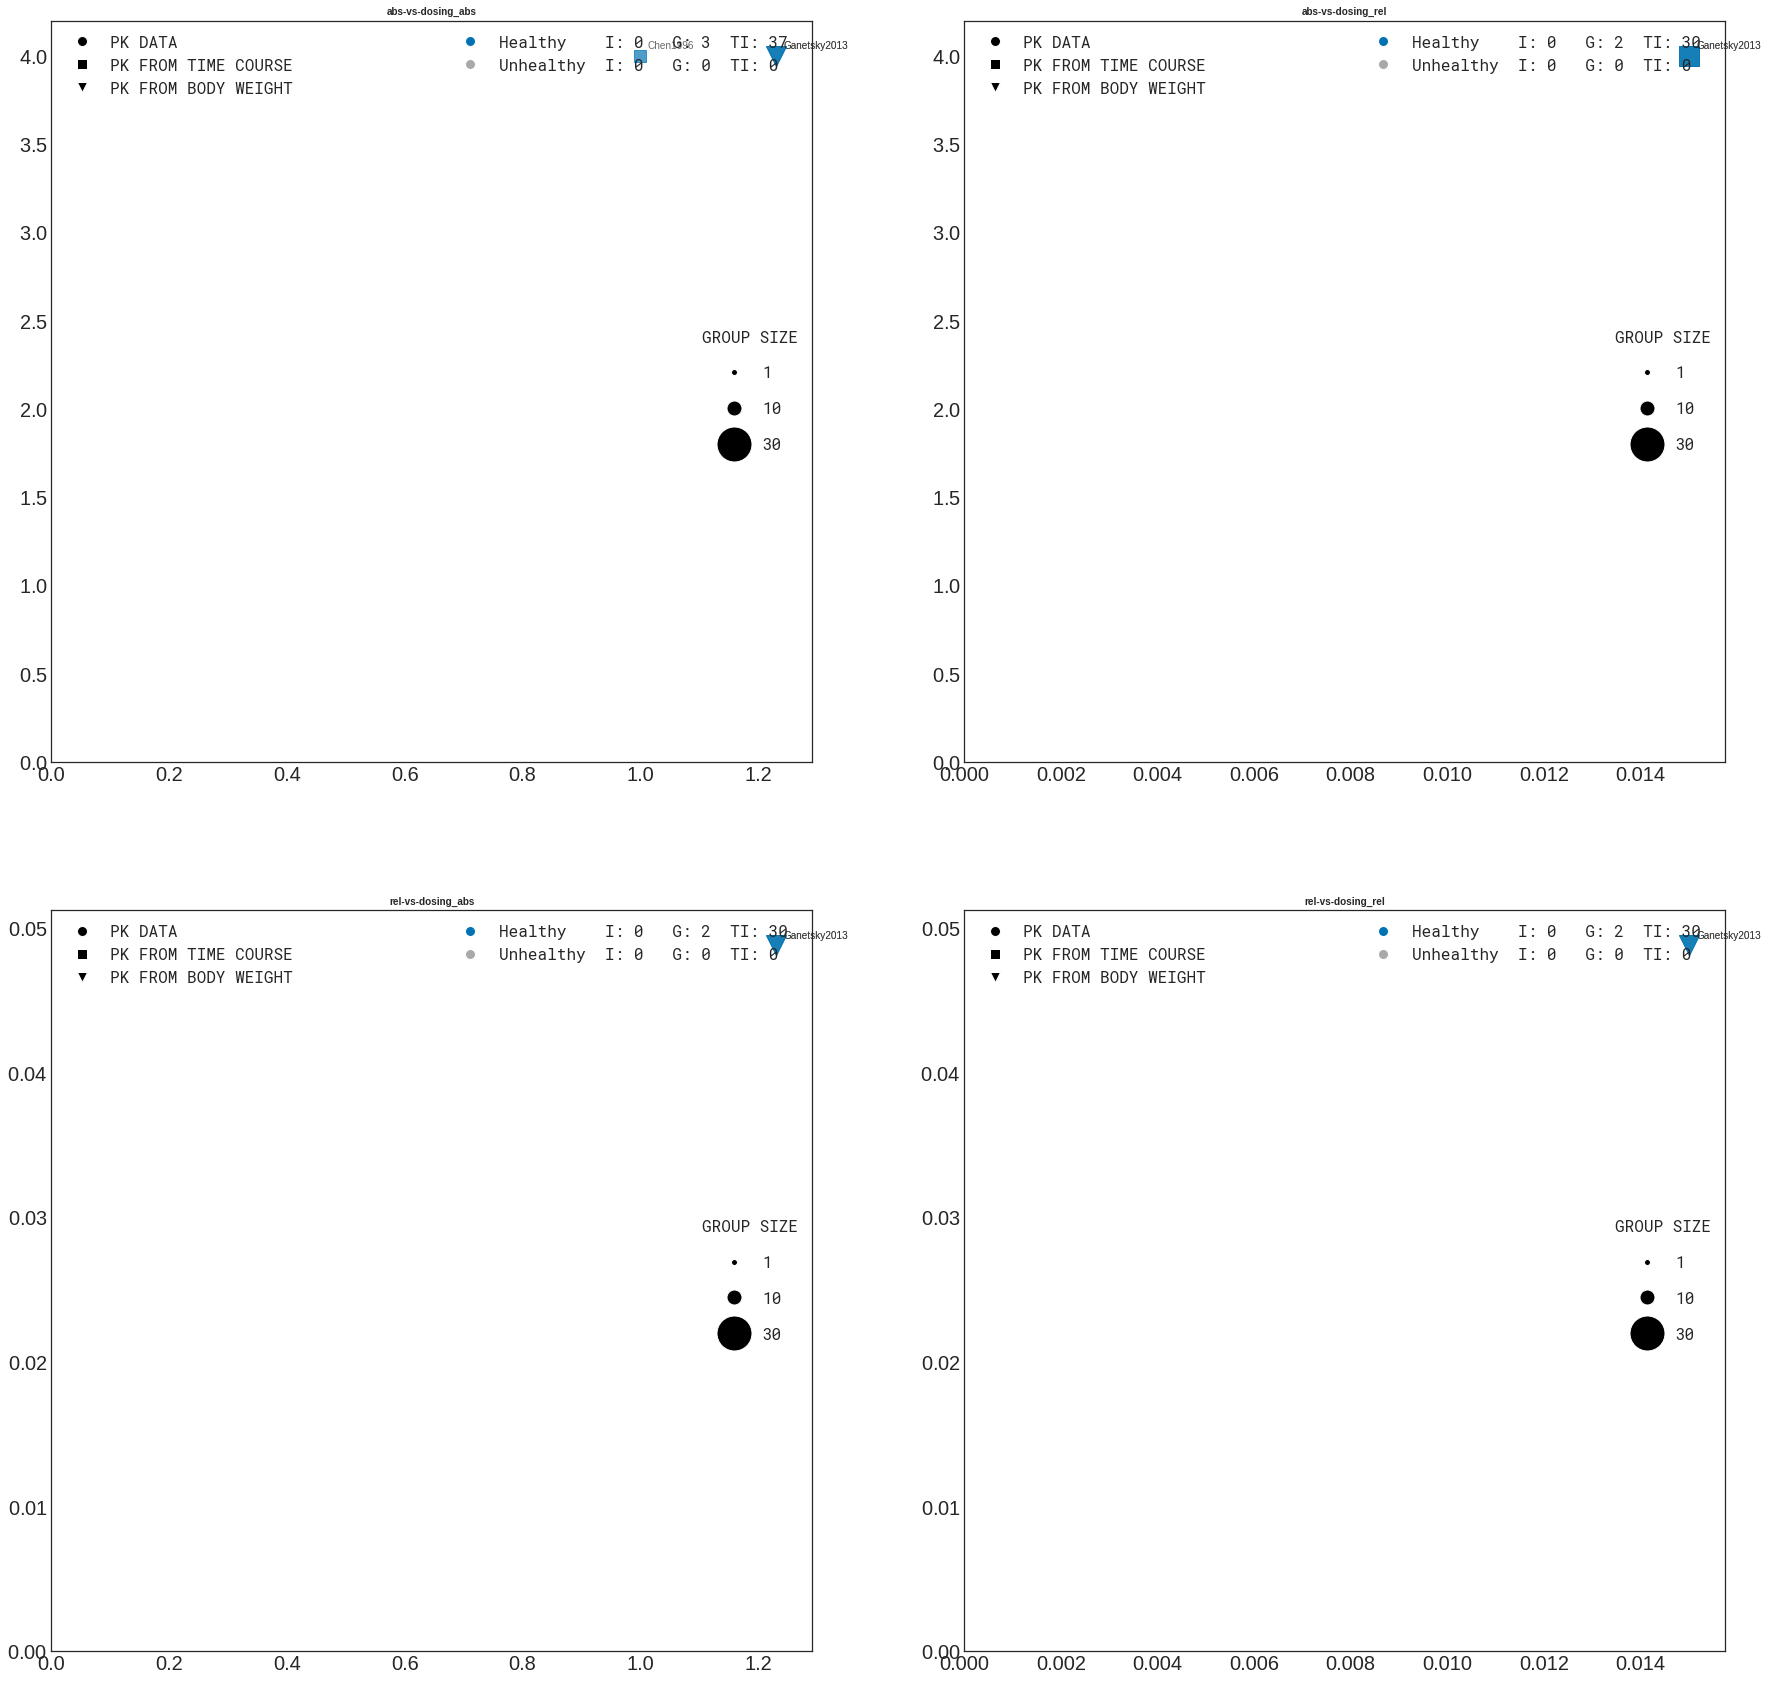

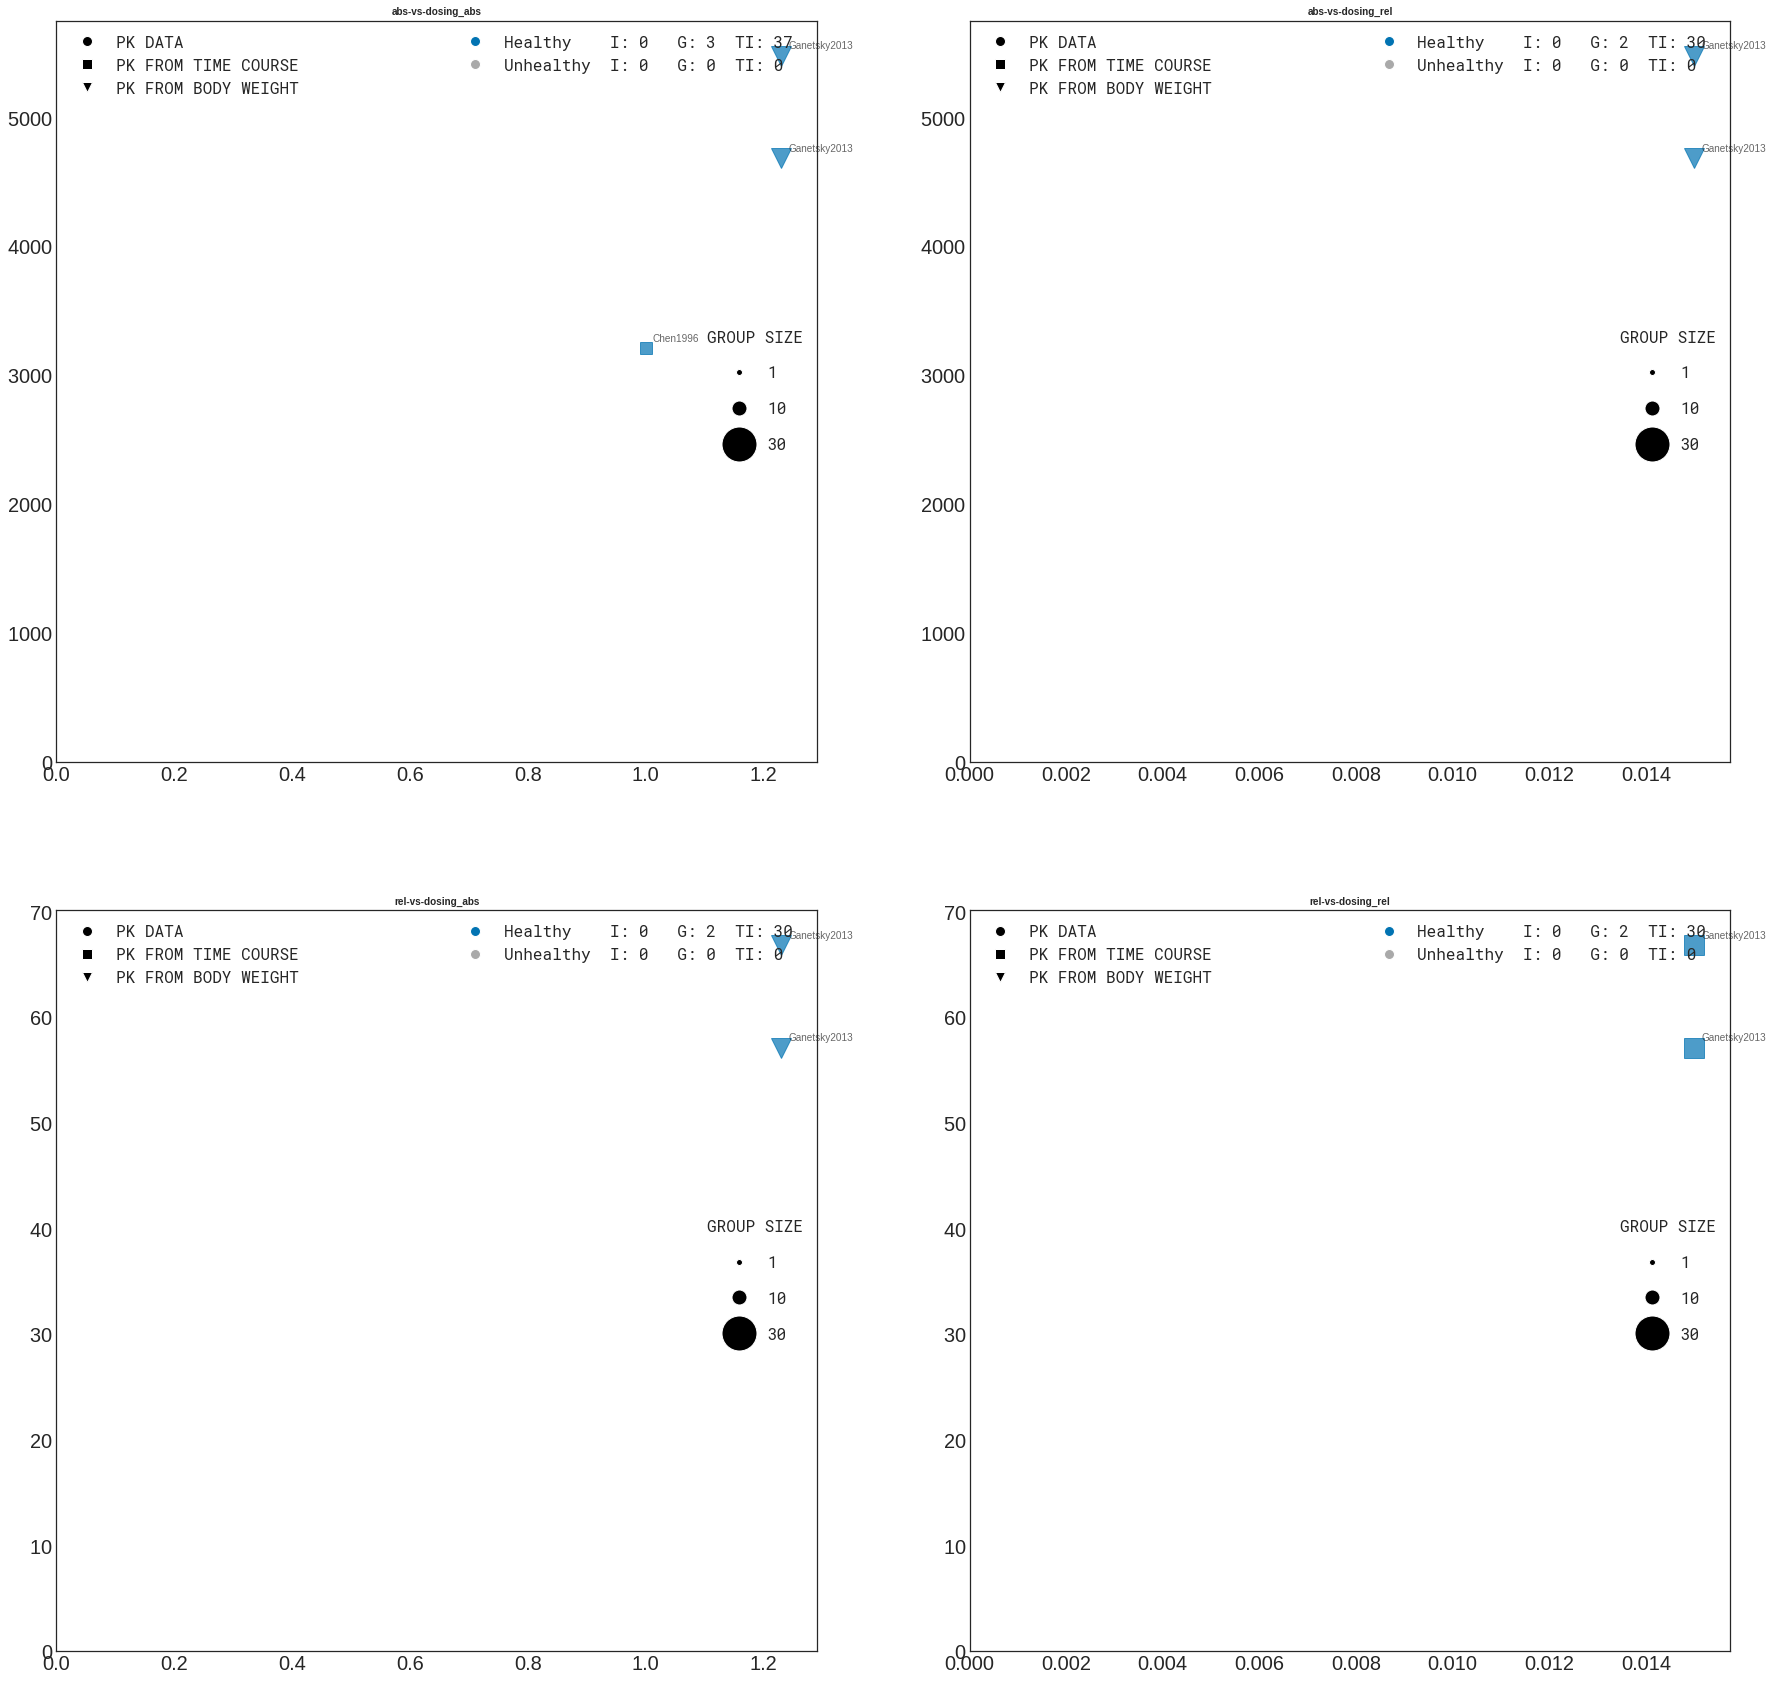

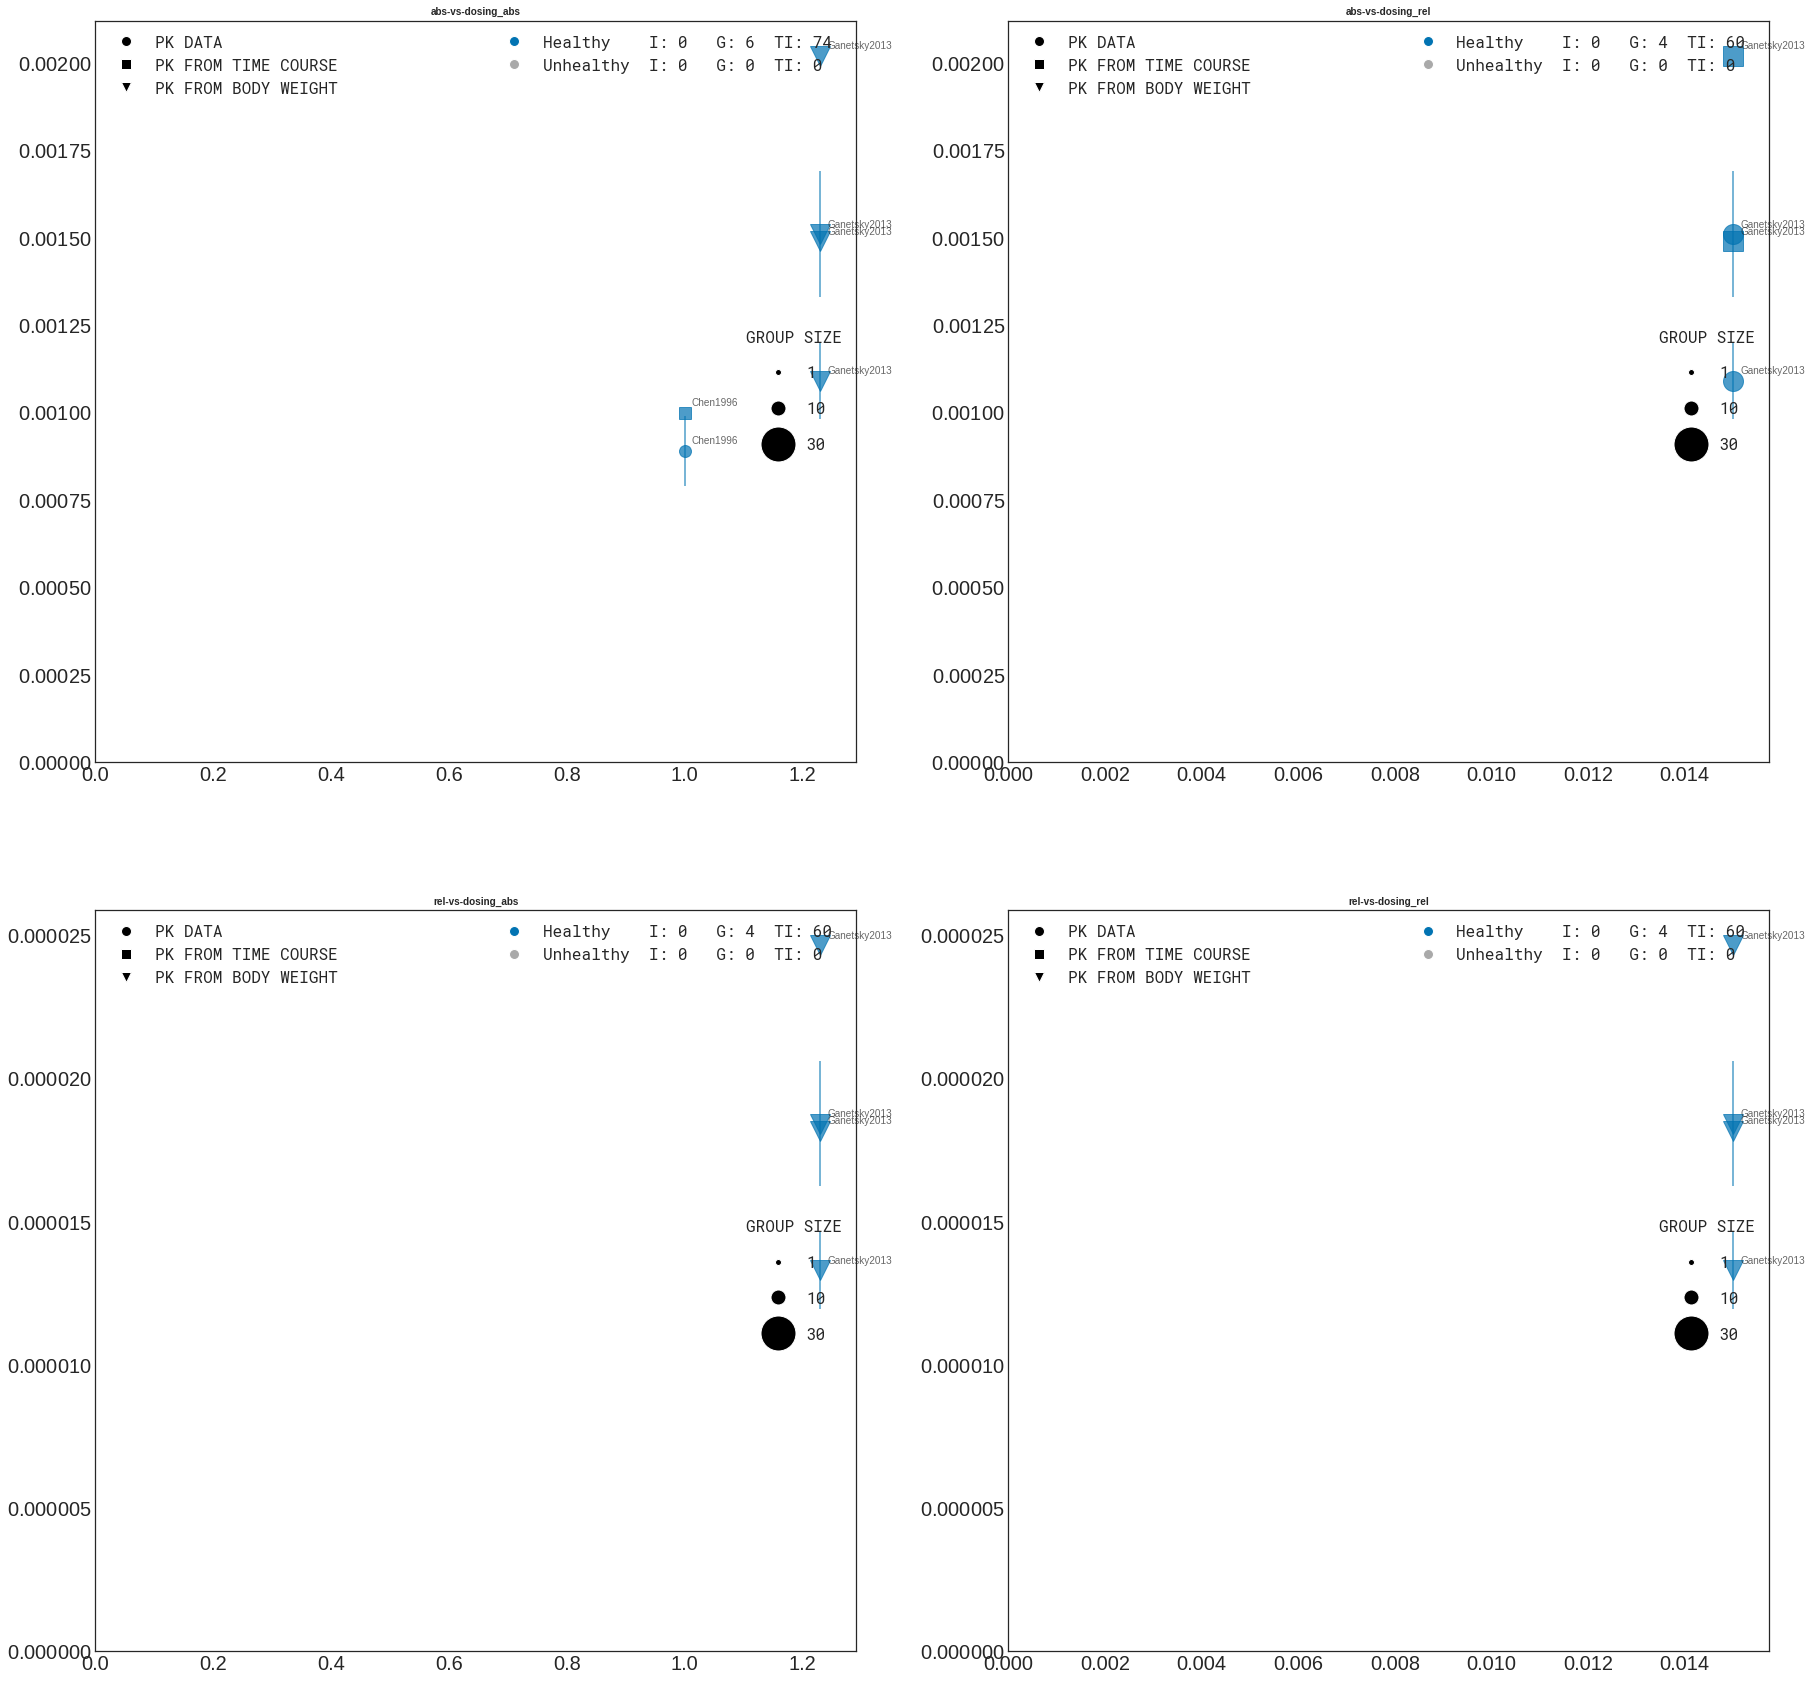

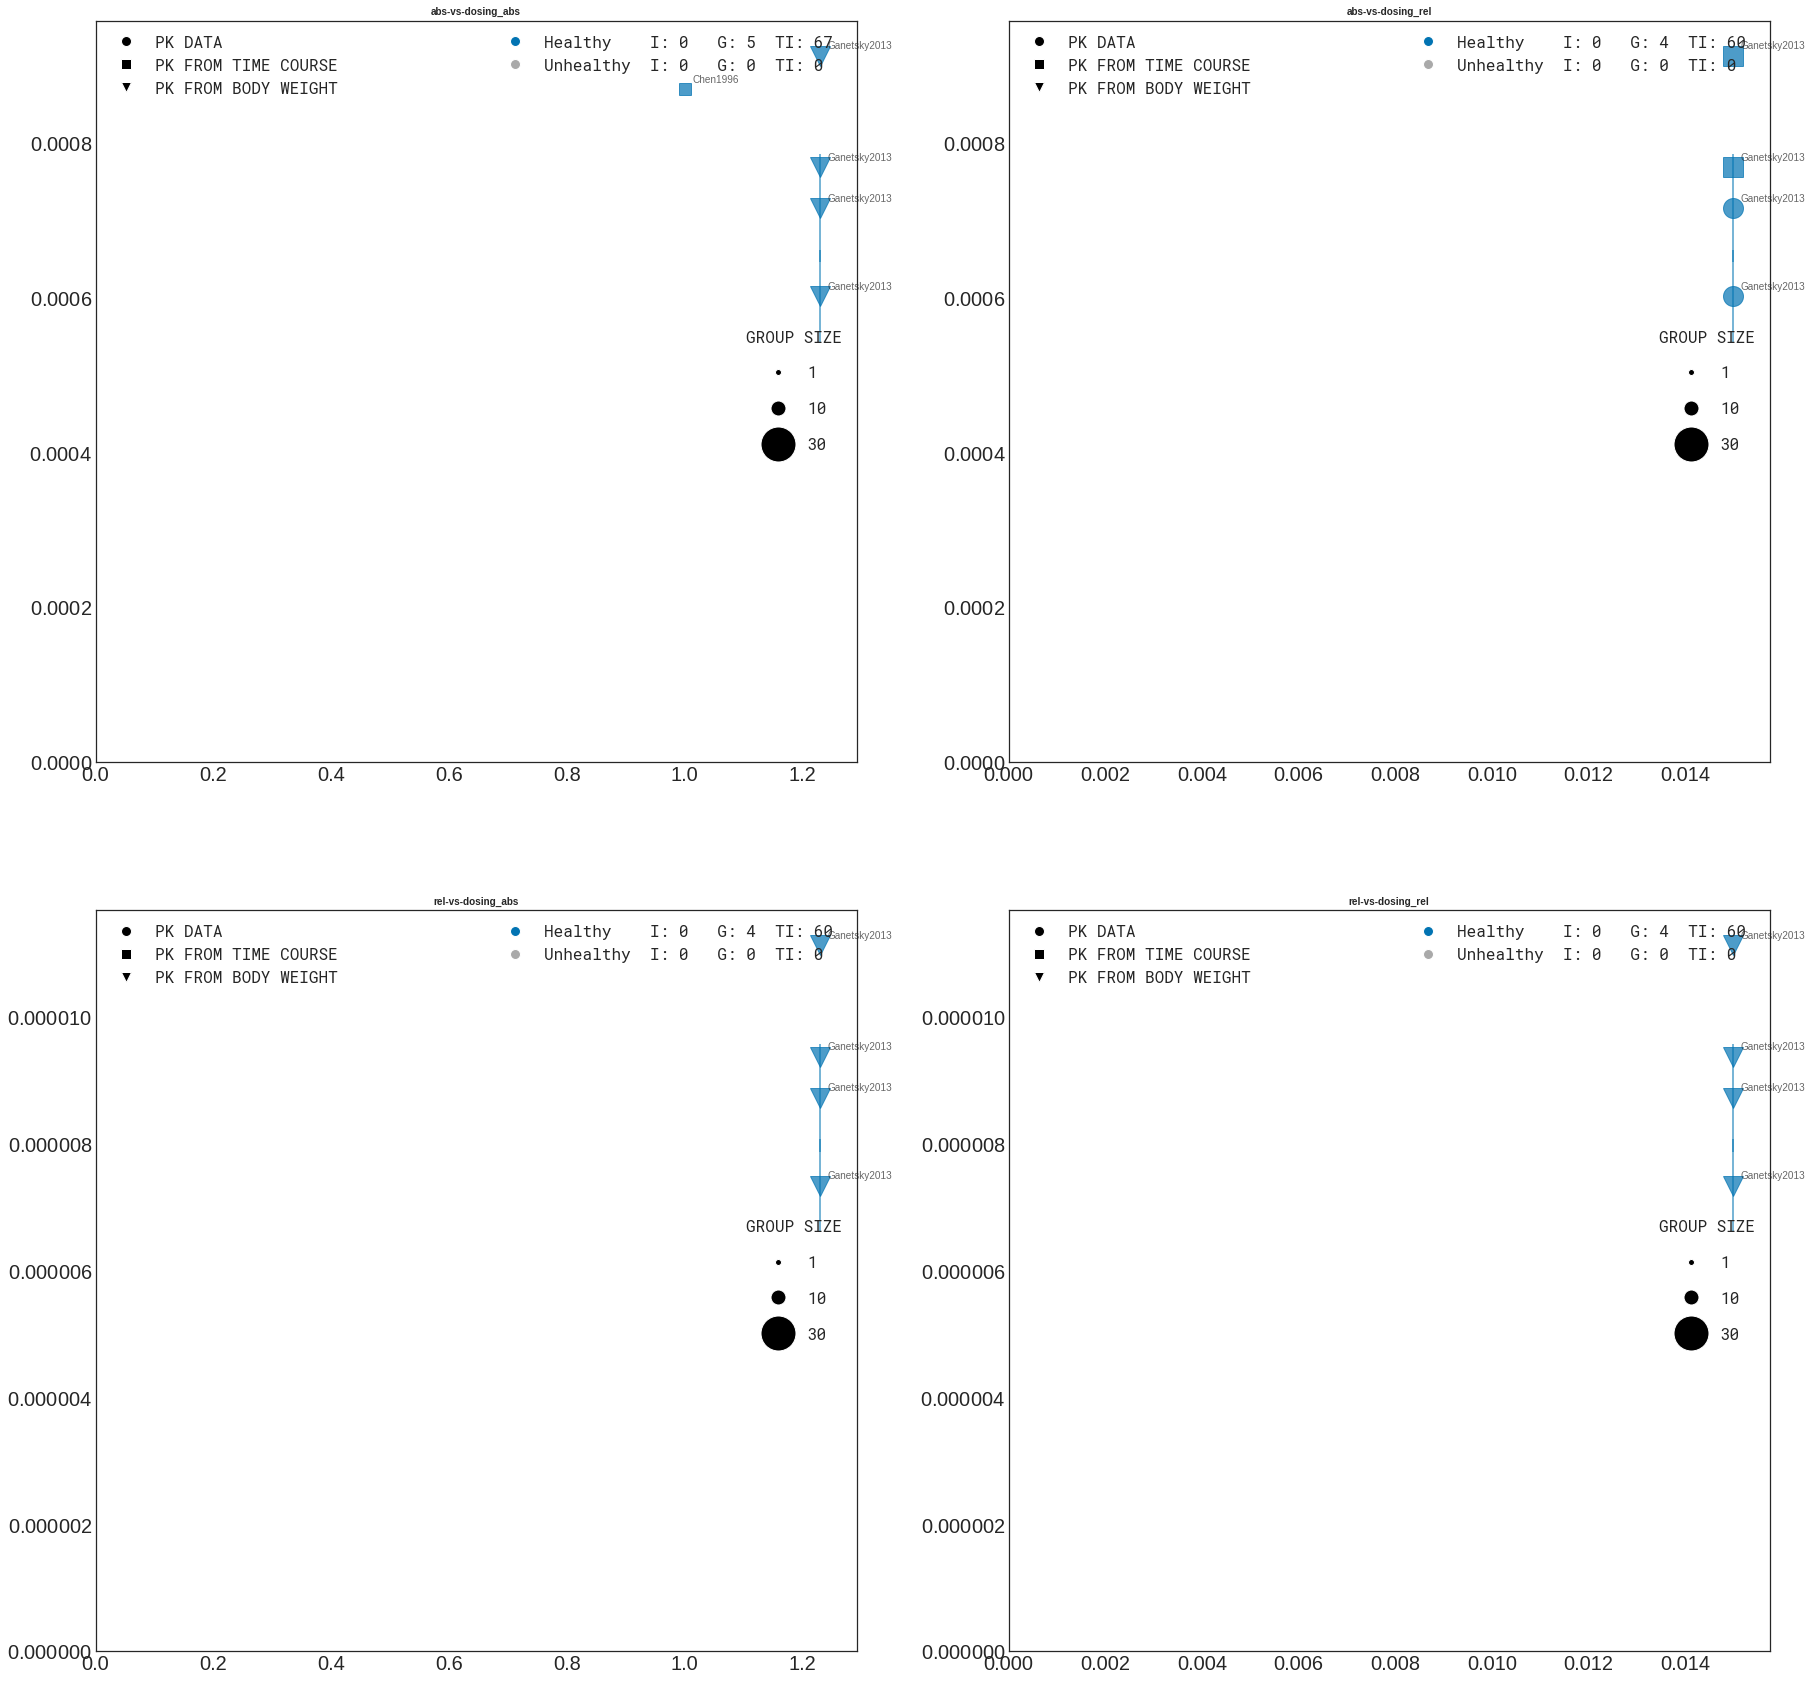

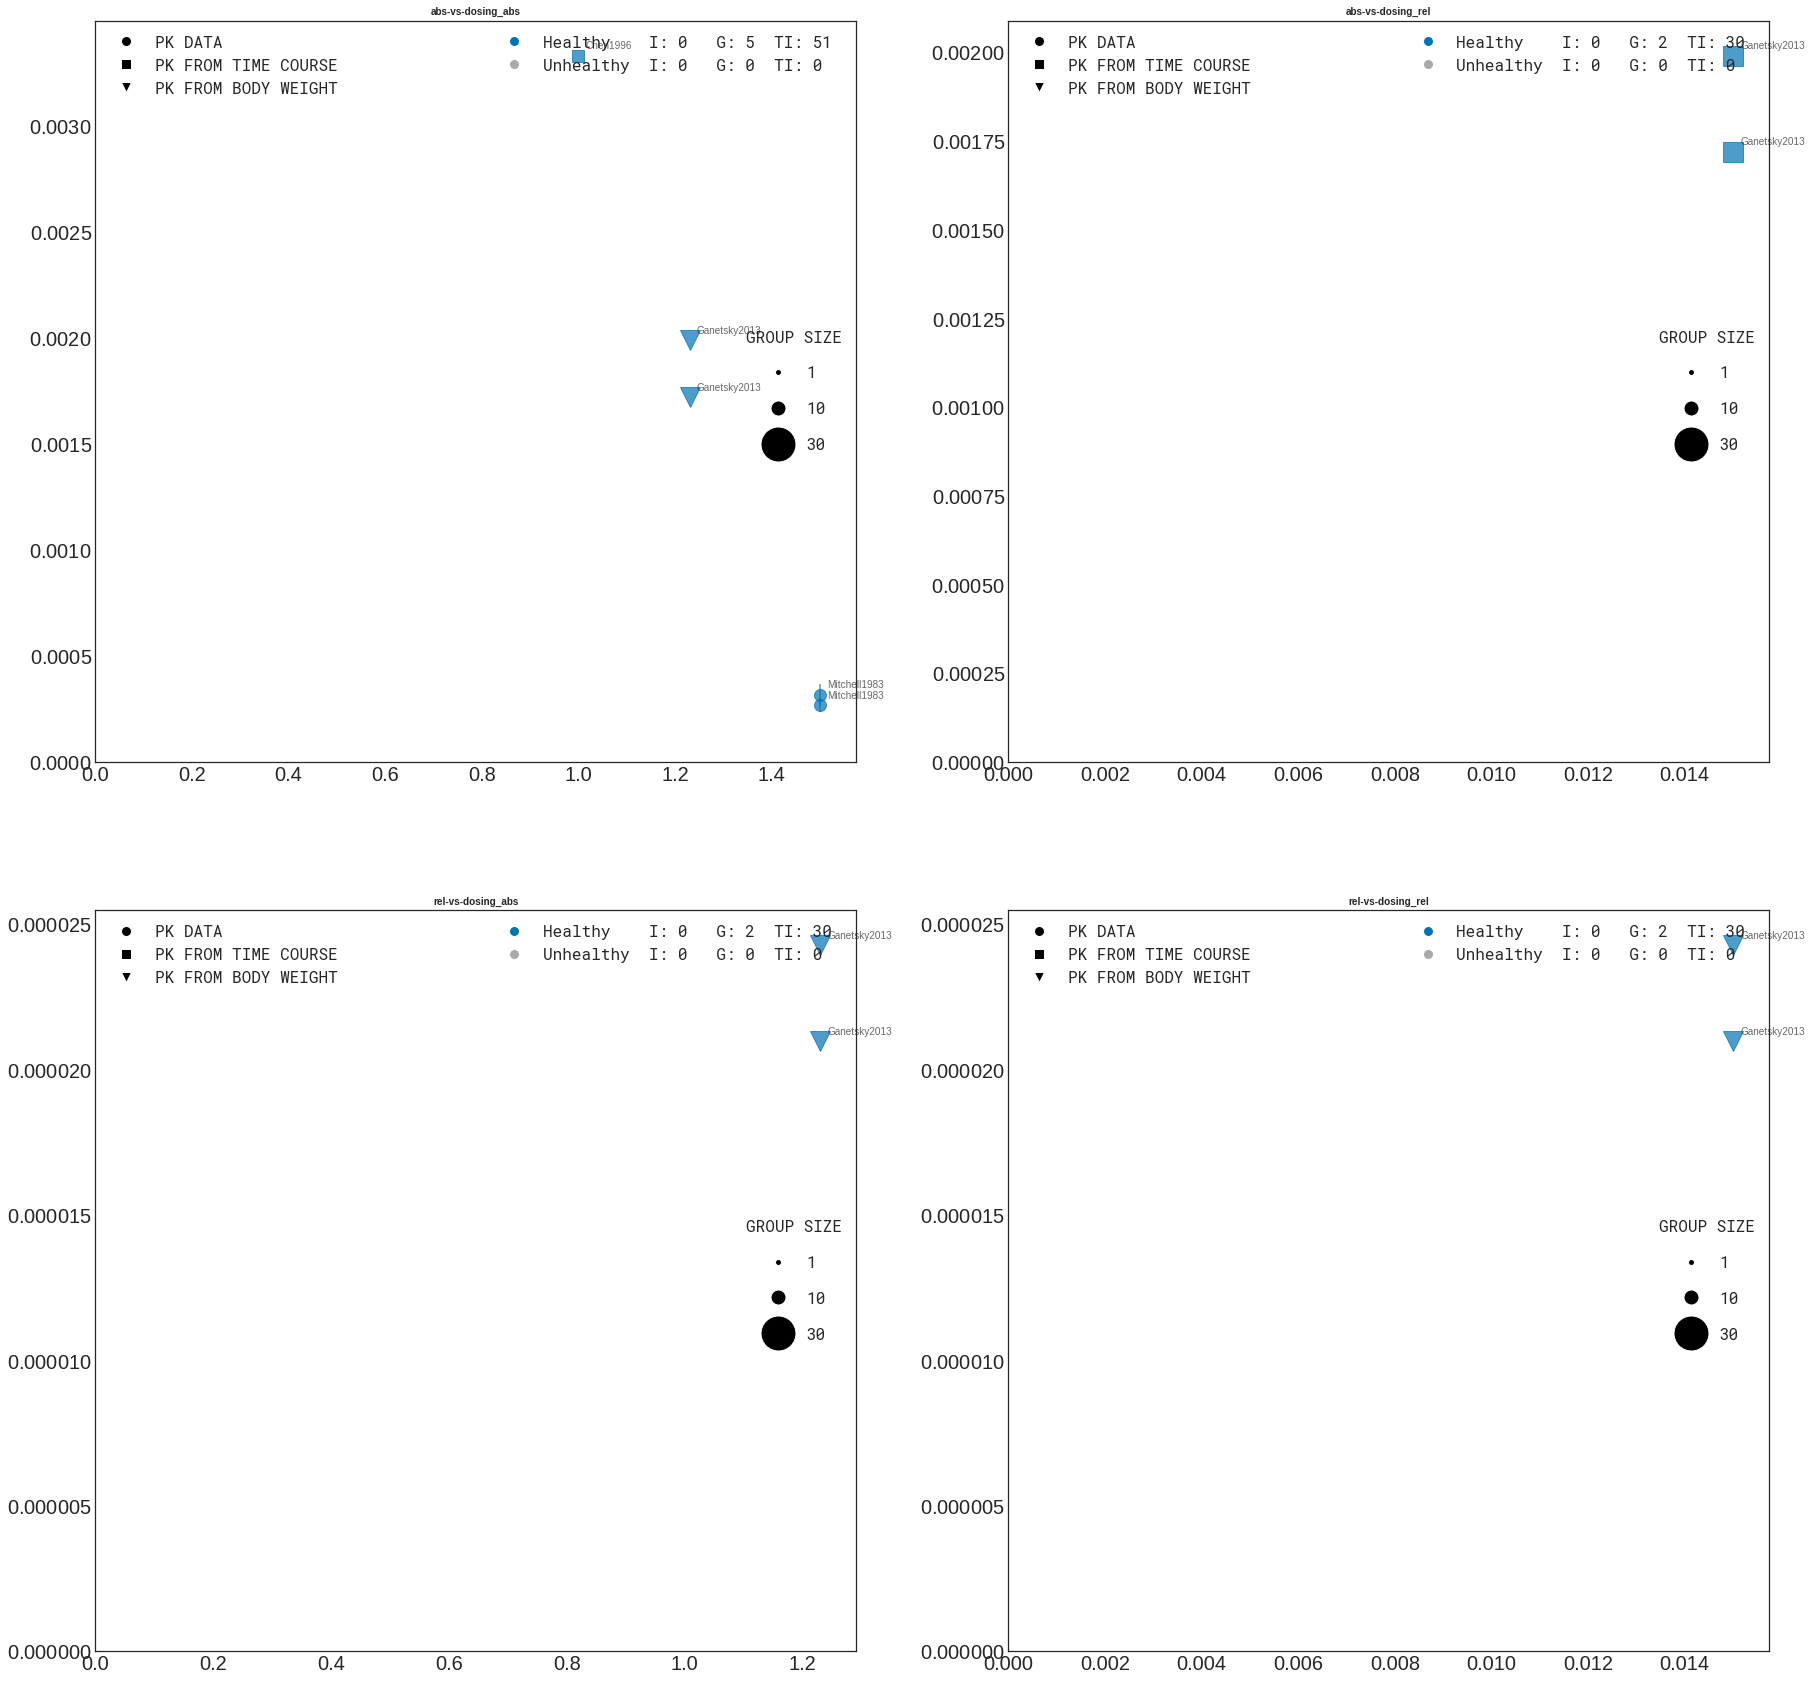

In [27]:
def analyses(substance):
    return [f"{substance}_clearance",
            f"{substance}_thalf",
            f"{substance}_tmax",
            f"{substance}_vd",
            f"{substance}_auc_inf",
            f"{substance}_auc_end",
            f"{substance}_kel"]

substances = ["paracetamol glucuronide","paracetamol sulfate","paracetamol cysteine","paracetamol mercapturate"]

for substance in substances:
    for analysis in analyses(substance):
        print(f"* {analysis} *")
        data_class = PkdbModel(analysis,destination="3-inferred")
        data_class.read()
        create_plots(data_class.data,categories_all,"reports/all")